In [1]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import collections

import numpy as np
import tensorflow as tf
import tensorflow_federated as tff
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import csv
import random 
import pickle
from numpy import random as rd
from tensorflow.keras import losses, metrics, optimizers
from tensorflow import reshape, nest, config
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

import copy


import matplotlib.pyplot as plt

In [3]:
# from datetime import datetime
# current_date = datetime.now().date()

# print(current_date)

In [4]:
current_date = '2022-11-10'
print(current_date)

2022-10-33


# Init

In [22]:
NUM_CLIENTS = 100
NUM_CLUSTERS = 5

In [23]:
# cluster_list = ['cluster_0', 'cluster_1', 'cluster_2']
cluster_list = ['cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4']
# model_list = ['model_0', 'model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7', 'model_8', 'model_7']

In [24]:
model_list = []
for user in range(NUM_CLIENTS):
    model_list.append(f'model_{user}')

In [25]:
centralized_model_list = []
for user in range(NUM_CLIENTS):
    centralized_model_list.append(f'model_{user}')
centralized_model_list.append('Aggregator')

In [26]:
NUM_FILES = 3

# Random datasets

# TargentEnc

In [300]:
acc_file = open("random/random_TargetEnc_14102022_rounds.pkl", "rb")
random_target_result1 = pickle.load(acc_file)
acc_file.close()

In [301]:
bcc_file = open("random/random_TargetEnc_01112022_rounds.pkl", "rb")
random_target_result2 = pickle.load(bcc_file)
bcc_file.close()

In [302]:
ccc_file = open("random/random_TargetEnc_01112022_rounds.pkl", "rb")
random_target_result3 = pickle.load(ccc_file)
ccc_file.close()

In [303]:
t_values = np.array(random_target_result1['Number of rounds']).tolist()

In [304]:
random_target_result1_accuracy = random_target_result1['Accuracy'].to_numpy()
random_target_result2_accuracy = random_target_result2['Accuracy'].to_numpy()
random_target_result3_accuracy = random_target_result3['Accuracy'].to_numpy()

In [305]:
random_target_result1_f1_score = random_target_result1['F1_score'].to_numpy()
random_target_result2_f1_score = random_target_result2['F1_score'].to_numpy()
random_target_result3_f1_score = random_target_result3['F1_score'].to_numpy()

In [306]:
random_target_result1_precision = random_target_result1['Precision'].to_numpy()
random_target_result2_precision = random_target_result2['Precision'].to_numpy()
random_target_result3_precision = random_target_result3['Precision'].to_numpy()

In [307]:
random_target_result1_recall = random_target_result1['Recall'].to_numpy()
random_target_result2_recall = random_target_result2['Recall'].to_numpy()
random_target_result3_recall = random_target_result3['Recall'].to_numpy()

In [308]:
random_target_accuracy = random_target_result1_accuracy + random_target_result2_accuracy + random_target_result3_accuracy
random_target_accuracy = random_target_accuracy/NUM_FILES

In [309]:
random_target_f1_score = random_target_result1_f1_score + random_target_result2_f1_score + random_target_result3_f1_score
random_target_f1_score = random_target_f1_score/NUM_FILES

In [310]:
random_target_precision = random_target_result1_precision + random_target_result2_precision + random_target_result3_precision
random_target_precision = random_target_precision/NUM_FILES

In [311]:
random_target_recall = random_target_result1_recall + random_target_result2_recall + random_target_result3_recall
random_target_recall = random_target_recall/NUM_FILES

In [312]:
random_target_comm = {}

random_target_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_target_comm[model_name] = list()
    for row in range(len(random_target_result1)):
        random_target_comm[model_name].append(random_target_result1['Number of communications'][row][model_name])

        
for row in range(len(t_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += random_target_comm[model_name][row]
    random_target_avg_communications.append(sum_communications/NUM_CLIENTS)  

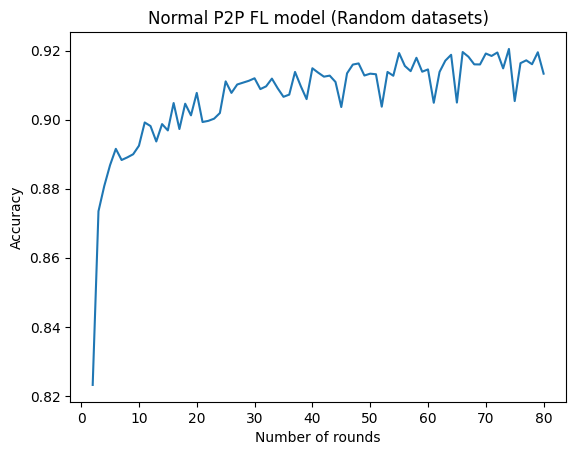

In [313]:
fig = plt.figure()


plt.plot(t_values, random_target_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Normal P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_targetEnc_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

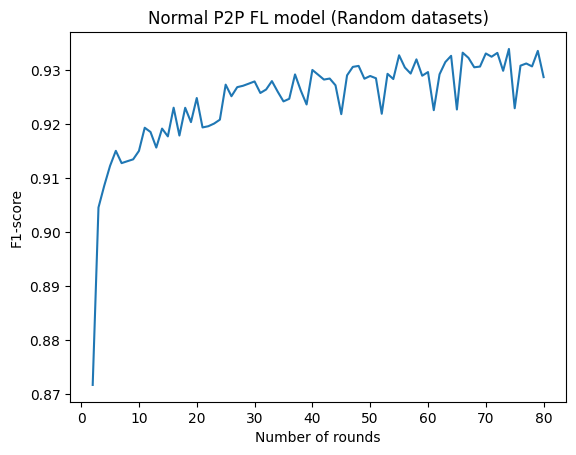

In [314]:
fig = plt.figure()


plt.plot(t_values, random_target_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Normal P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_targetEnc_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

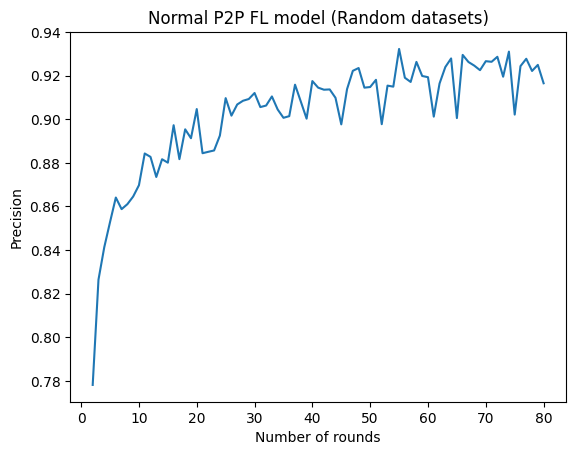

In [315]:
fig = plt.figure()


plt.plot(t_values, random_target_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Normal P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_targetEnc_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

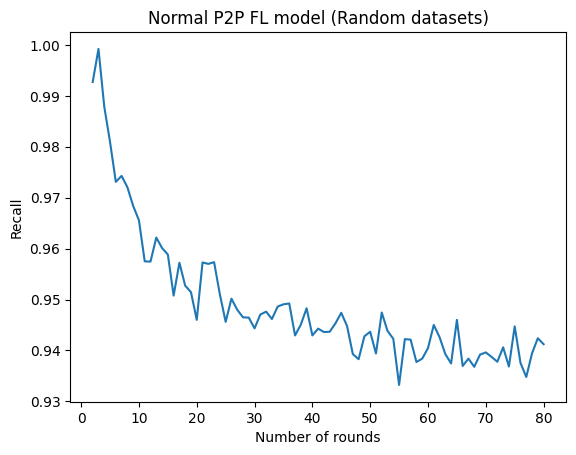

In [316]:
fig = plt.figure()


plt.plot(t_values, random_target_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Normal P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_targetEnc_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

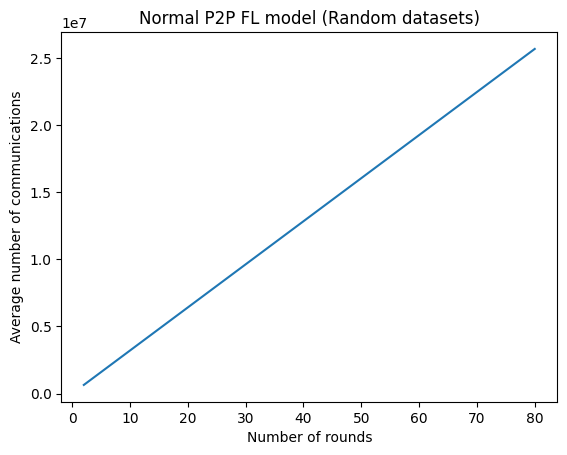

In [317]:
fig = plt.figure()

plt.plot(t_values, random_target_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Normal P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_targetEnc_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Clustered

In [318]:
acc_file = open("random/random_Clustered_14102022_rounds.pkl", "rb")
random_clustered_result1 = pickle.load(acc_file)
acc_file.close()

In [319]:
bcc_file = open("random/random_Clustered_01112022_rounds.pkl", "rb")
random_clustered_result2 = pickle.load(bcc_file)
bcc_file.close()

In [320]:
ccc_file = open("random/random_Clustered_01112022_rounds.pkl", "rb")
random_clustered_result3 = pickle.load(ccc_file)
ccc_file.close()

In [321]:
c_values = np.array(random_clustered_result1['Number of rounds']).tolist()

In [322]:
############################### Accuracy #################################

In [323]:
# random_clustered_result1_accuracy = random_clustered_result1['Accuracy'].to_numpy()
# random_clustered_result2_accuracy = random_clustered_result2['Accuracy'].to_numpy()
# random_clustered_result3_accuracy = random_clustered_result3['Accuracy'].to_numpy()

In [324]:


random_clustered_result1_accuracy = {}
random_clustered_result1_AVG_accuracy = []

for cluster in cluster_list:
    random_clustered_result1_accuracy[cluster] = list()
    for index in range(len(random_clustered_result1)):
        random_clustered_result1_accuracy[cluster].append(random_clustered_result1['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += random_clustered_result1_accuracy[cluster_name][row]
    random_clustered_result1_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)   


In [325]:
random_clustered_result2_accuracy = {}
random_clustered_result2_AVG_accuracy = []

for cluster in cluster_list:
    random_clustered_result2_accuracy[cluster] = list()
    for index in range(len(random_clustered_result2)):
        random_clustered_result2_accuracy[cluster].append(random_clustered_result2['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += random_clustered_result2_accuracy[cluster_name][row]
    random_clustered_result2_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [326]:
random_clustered_result3_accuracy = {}
random_clustered_result3_AVG_accuracy = []

for cluster in cluster_list:
    random_clustered_result3_accuracy[cluster] = list()
    for index in range(len(random_clustered_result3)):
        random_clustered_result3_accuracy[cluster].append(random_clustered_result3['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += random_clustered_result3_accuracy[cluster_name][row]
    random_clustered_result3_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [327]:
random_clustered_separate_accuracy = {}
for cluster in cluster_list:
    random_clustered_separate_accuracy[cluster] = np.zeros(len(c_values))
    random_clustered_separate_accuracy[cluster] = np.asarray(random_clustered_result1_accuracy[cluster]) + np.asarray(random_clustered_result2_accuracy[cluster]) + np.asarray(random_clustered_result3_accuracy[cluster])
    random_clustered_separate_accuracy[cluster] = random_clustered_separate_accuracy[cluster]/NUM_FILES

In [328]:
random_clustered_result1_AVG_accuracy = np.asarray(random_clustered_result1_AVG_accuracy)
random_clustered_result2_AVG_accuracy = np.asarray(random_clustered_result2_AVG_accuracy)
random_clustered_result3_AVG_accuracy = np.asarray(random_clustered_result3_AVG_accuracy)


random_clustered_accuracy = random_clustered_result1_AVG_accuracy + random_clustered_result2_AVG_accuracy + random_clustered_result3_AVG_accuracy
random_clustered_accuracy = random_clustered_accuracy/NUM_FILES

In [329]:
############################### F1-score #################################

In [330]:
# random_clustered_result1_f1_score = random_clustered_result1['F1_score'].to_numpy()
# random_clustered_result2_f1_score = random_clustered_result2['F1_score'].to_numpy()
# random_clustered_result3_f1_score = random_clustered_result3['F1_score'].to_numpy()

In [331]:

random_clustered_result1_f1_score = {}
random_clustered_result1_AVG_f1_score = []

for cluster in cluster_list:
    random_clustered_result1_f1_score[cluster] = list()
    for index in range(len(random_clustered_result1)):
        random_clustered_result1_f1_score[cluster].append(random_clustered_result1['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += random_clustered_result1_f1_score[cluster_name][row]
    random_clustered_result1_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)   


In [332]:
random_clustered_result2_f1_score = {}
random_clustered_result2_AVG_f1_score = []

for cluster in cluster_list:
    random_clustered_result2_f1_score[cluster] = list()
    for index in range(len(random_clustered_result2)):
        random_clustered_result2_f1_score[cluster].append(random_clustered_result2['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += random_clustered_result2_f1_score[cluster_name][row]
    random_clustered_result2_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [333]:
random_clustered_result3_f1_score = {}
random_clustered_result3_AVG_f1_score = []

for cluster in cluster_list:
    random_clustered_result3_f1_score[cluster] = list()
    for index in range(len(random_clustered_result3)):
        random_clustered_result3_f1_score[cluster].append(random_clustered_result3['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += random_clustered_result3_f1_score[cluster_name][row]
    random_clustered_result3_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [334]:
random_clustered_separate_f1_score = {}
for cluster in cluster_list:
    random_clustered_separate_f1_score[cluster] = np.zeros(len(c_values))
    random_clustered_separate_f1_score[cluster] = np.asarray(random_clustered_result1_f1_score[cluster]) + np.asarray(random_clustered_result2_f1_score[cluster]) + np.asarray(random_clustered_result3_f1_score[cluster])
    random_clustered_separate_f1_score[cluster] = random_clustered_separate_f1_score[cluster]/NUM_FILES

In [335]:
random_clustered_result1_AVG_f1_score = np.asarray(random_clustered_result1_AVG_f1_score)
random_clustered_result2_AVG_f1_score = np.asarray(random_clustered_result2_AVG_f1_score)
random_clustered_result3_AVG_f1_score = np.asarray(random_clustered_result3_AVG_f1_score)


random_clustered_f1_score = random_clustered_result1_AVG_f1_score + random_clustered_result2_AVG_f1_score + random_clustered_result3_AVG_f1_score
random_clustered_f1_score = random_clustered_f1_score/NUM_FILES

In [336]:
############################### Precision #################################

In [337]:
# random_clustered_result1_precision = random_clustered_result1['Precision'].to_numpy()
# random_clustered_result2_precision = random_clustered_result2['Precision'].to_numpy()
# random_clustered_result3_precision = random_clustered_result3['Precision'].to_numpy()

In [338]:

random_clustered_result1_precision = {}
random_clustered_result1_AVG_precision = []

for cluster in cluster_list:
    random_clustered_result1_precision[cluster] = list()
    for index in range(len(random_clustered_result1)):
        random_clustered_result1_precision[cluster].append(random_clustered_result1['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += random_clustered_result1_precision[cluster_name][row]
    random_clustered_result1_AVG_precision.append(sum_precision/NUM_CLUSTERS)   


In [339]:
random_clustered_result2_precision = {}
random_clustered_result2_AVG_precision = []

for cluster in cluster_list:
    random_clustered_result2_precision[cluster] = list()
    for index in range(len(random_clustered_result2)):
        random_clustered_result2_precision[cluster].append(random_clustered_result2['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += random_clustered_result2_precision[cluster_name][row]
    random_clustered_result2_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [340]:
random_clustered_result3_precision = {}
random_clustered_result3_AVG_precision = []

for cluster in cluster_list:
    random_clustered_result3_precision[cluster] = list()
    for index in range(len(random_clustered_result3)):
        random_clustered_result3_precision[cluster].append(random_clustered_result3['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += random_clustered_result3_precision[cluster_name][row]
    random_clustered_result3_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [341]:
random_clustered_separate_precision = {}
for cluster in cluster_list:
    random_clustered_separate_precision[cluster] = np.zeros(len(c_values))
    random_clustered_separate_precision[cluster] = np.asarray(random_clustered_result1_precision[cluster]) + np.asarray(random_clustered_result2_precision[cluster]) + np.asarray(random_clustered_result3_precision[cluster])
    random_clustered_separate_precision[cluster] = random_clustered_separate_precision[cluster]/NUM_FILES

In [342]:
random_clustered_result1_AVG_precision = np.asarray(random_clustered_result1_AVG_precision)
random_clustered_result2_AVG_precision = np.asarray(random_clustered_result2_AVG_precision)
random_clustered_result3_AVG_precision = np.asarray(random_clustered_result3_AVG_precision)


random_clustered_precision = random_clustered_result1_AVG_precision + random_clustered_result2_AVG_precision + random_clustered_result3_AVG_precision
random_clustered_precision = random_clustered_precision/NUM_FILES

In [343]:
############################### Recall #################################

In [344]:
# random_clustered_result1_recall = random_clustered_result1['Recall'].to_numpy()
# random_clustered_result2_recall = random_clustered_result2['Recall'].to_numpy()
# random_clustered_result3_recall = random_clustered_result3['Recall'].to_numpy()

In [345]:

random_clustered_result1_recall = {}
random_clustered_result1_AVG_recall = []

for cluster in cluster_list:
    random_clustered_result1_recall[cluster] = list()
    for index in range(len(random_clustered_result1)):
        random_clustered_result1_recall[cluster].append(random_clustered_result1['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += random_clustered_result1_recall[cluster_name][row]
    random_clustered_result1_AVG_recall.append(sum_recall/NUM_CLUSTERS)   


In [346]:
random_clustered_result2_recall = {}
random_clustered_result2_AVG_recall = []

for cluster in cluster_list:
    random_clustered_result2_recall[cluster] = list()
    for index in range(len(random_clustered_result2)):
        random_clustered_result2_recall[cluster].append(random_clustered_result2['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += random_clustered_result2_recall[cluster_name][row]
    random_clustered_result2_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [347]:
random_clustered_result3_recall = {}
random_clustered_result3_AVG_recall = []

for cluster in cluster_list:
    random_clustered_result3_recall[cluster] = list()
    for index in range(len(random_clustered_result3)):
        random_clustered_result3_recall[cluster].append(random_clustered_result3['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += random_clustered_result3_recall[cluster_name][row]
    random_clustered_result3_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [348]:
random_clustered_separate_recall = {}
for cluster in cluster_list:
    random_clustered_separate_recall[cluster] = np.zeros(len(c_values))
    random_clustered_separate_recall[cluster] = np.asarray(random_clustered_result1_recall[cluster]) + np.asarray(random_clustered_result2_recall[cluster]) + np.asarray(random_clustered_result3_recall[cluster])
    random_clustered_separate_recall[cluster] = random_clustered_separate_recall[cluster]/NUM_FILES

In [349]:
random_clustered_result1_AVG_recall = np.asarray(random_clustered_result1_AVG_recall)
random_clustered_result2_AVG_recall = np.asarray(random_clustered_result2_AVG_recall)
random_clustered_result3_AVG_recall = np.asarray(random_clustered_result3_AVG_recall)


random_clustered_recall = random_clustered_result1_AVG_recall + random_clustered_result2_AVG_recall + random_clustered_result3_AVG_recall
random_clustered_recall = random_clustered_recall/NUM_FILES

In [350]:
############################### Communication #################################

In [351]:
random_clustered_comm = {}

random_clustered_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_clustered_comm[model_name] = list()
    for row in range(len(random_clustered_result1)):
        random_clustered_comm[model_name].append(random_clustered_result1['Number of communications'][row][model_name])

        
for row in range(len(c_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += random_clustered_comm[model_name][row]
    random_clustered_avg_communications.append(sum_communications/NUM_CLIENTS)  

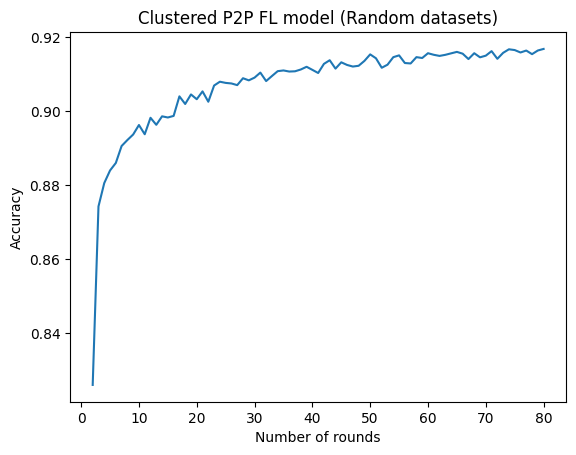

In [352]:
fig = plt.figure()


plt.plot(c_values, random_clustered_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_clustered_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

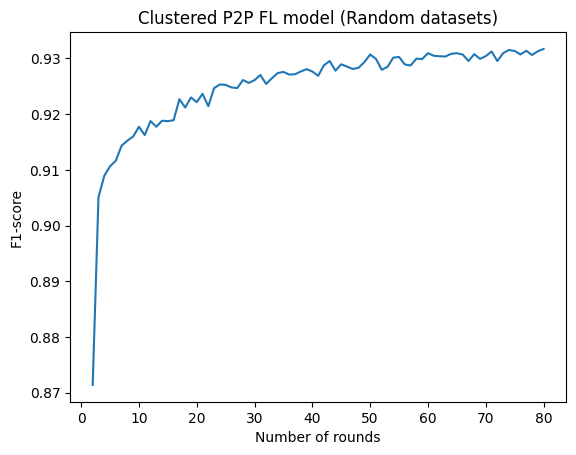

In [353]:
fig = plt.figure()


plt.plot(c_values, random_clustered_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_clustered_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

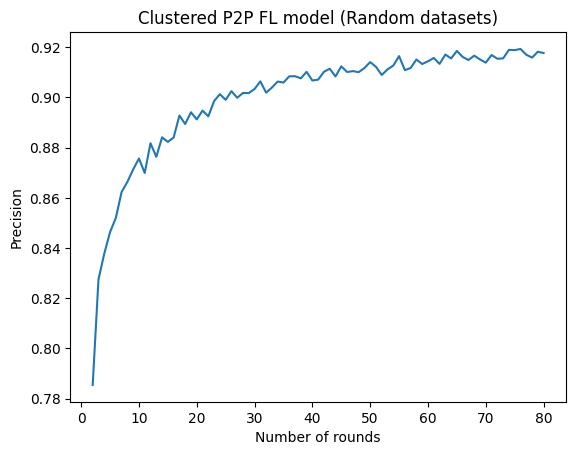

In [354]:
fig = plt.figure()


plt.plot(c_values, random_clustered_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_clustered_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

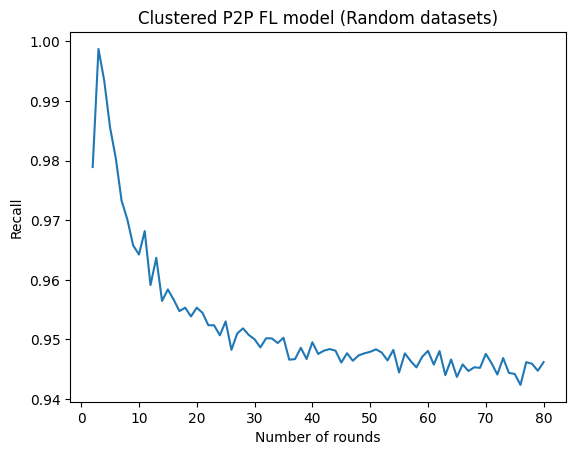

In [355]:
fig = plt.figure()


plt.plot(c_values, random_clustered_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_clustered_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

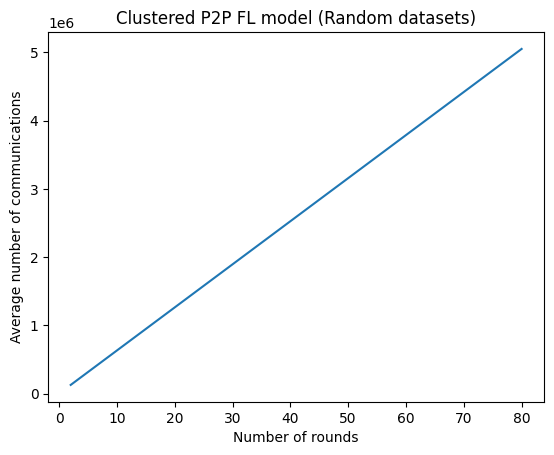

In [356]:
fig = plt.figure()

plt.plot(c_values, random_clustered_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_clustered_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

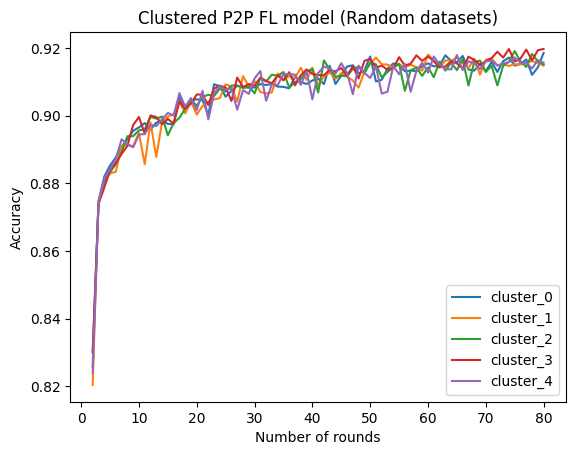

In [357]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, random_clustered_separate_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_clustered_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

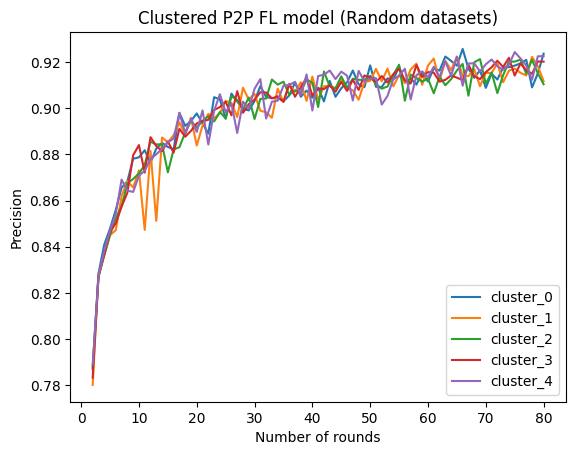

In [358]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, random_clustered_separate_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_clustered_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

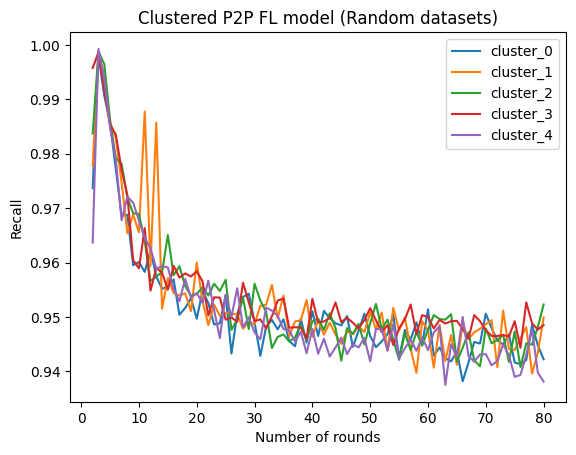

In [359]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, random_clustered_separate_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_clustered_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

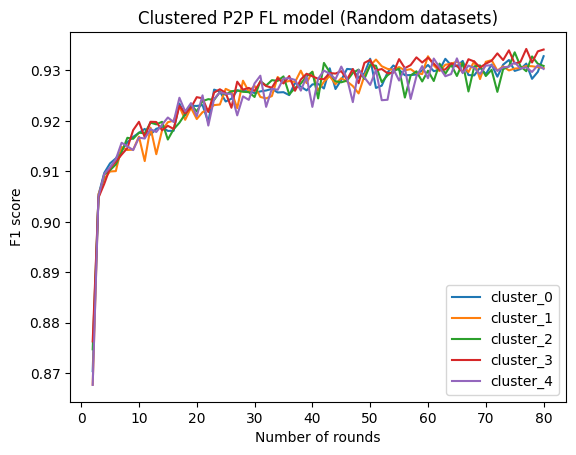

In [360]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, random_clustered_separate_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("Clustered P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_clustered_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Hierarchical

In [361]:
acc_file = open("random/random_Hierarchical_14102022_rounds.pkl", "rb")
random_hierarchical_result1 = pickle.load(acc_file)
acc_file.close()

In [362]:
bcc_file = open("random/random_Hierarchical_01112022_rounds.pkl", "rb")
random_hierarchical_result2 = pickle.load(bcc_file)
bcc_file.close()

In [363]:
ccc_file = open("random/random_Hierarchical_01112022_rounds.pkl", "rb")
random_hierarchical_result3 = pickle.load(ccc_file)
ccc_file.close()

In [364]:
h_values = np.array(random_hierarchical_result1['Number of rounds']).tolist()

In [365]:
############################### Accuracy #################################

In [366]:
# random_hierarchical_result1_accuracy = random_hierarchical_result1['Accuracy'].to_numpy()
# random_hierarchical_result2_accuracy = random_hierarchical_result2['Accuracy'].to_numpy()
# random_hierarchical_result3_accuracy = random_hierarchical_result3['Accuracy'].to_numpy()

In [367]:


random_hierarchical_result1_accuracy = {}
random_hierarchical_result1_AVG_accuracy = []

for cluster in cluster_list:
    random_hierarchical_result1_accuracy[cluster] = list()
    for index in range(len(random_hierarchical_result1)):
        random_hierarchical_result1_accuracy[cluster].append(random_hierarchical_result1['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += random_hierarchical_result1_accuracy[cluster_name][row]
    random_hierarchical_result1_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)   


In [368]:
random_hierarchical_result2_accuracy = {}
random_hierarchical_result2_AVG_accuracy = []

for cluster in cluster_list:
    random_hierarchical_result2_accuracy[cluster] = list()
    for index in range(len(random_hierarchical_result2)):
        random_hierarchical_result2_accuracy[cluster].append(random_hierarchical_result2['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += random_hierarchical_result2_accuracy[cluster_name][row]
    random_hierarchical_result2_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [369]:
random_hierarchical_result3_accuracy = {}
random_hierarchical_result3_AVG_accuracy = []

for cluster in cluster_list:
    random_hierarchical_result3_accuracy[cluster] = list()
    for index in range(len(random_hierarchical_result3)):
        random_hierarchical_result3_accuracy[cluster].append(random_hierarchical_result3['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += random_hierarchical_result3_accuracy[cluster_name][row]
    random_hierarchical_result3_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [370]:
random_hierarchical_separate_accuracy = {}
for cluster in cluster_list:
    random_hierarchical_separate_accuracy[cluster] = np.zeros(len(h_values))
    random_hierarchical_separate_accuracy[cluster] = np.asarray(random_hierarchical_result1_accuracy[cluster]) + np.asarray(random_hierarchical_result2_accuracy[cluster]) + np.asarray(random_hierarchical_result3_accuracy[cluster])
    random_hierarchical_separate_accuracy[cluster] = random_hierarchical_separate_accuracy[cluster]/NUM_FILES

In [371]:
random_hierarchical_result1_AVG_accuracy = np.asarray(random_hierarchical_result1_AVG_accuracy)
random_hierarchical_result2_AVG_accuracy = np.asarray(random_hierarchical_result2_AVG_accuracy)
random_hierarchical_result3_AVG_accuracy = np.asarray(random_hierarchical_result3_AVG_accuracy)


random_hierarchical_accuracy = random_hierarchical_result1_AVG_accuracy + random_hierarchical_result2_AVG_accuracy + random_hierarchical_result3_AVG_accuracy
random_hierarchical_accuracy = random_hierarchical_accuracy/NUM_FILES

In [372]:
############################### F1-score #################################

In [373]:
# random_hierarchical_result1_f1_score = random_hierarchical_result1['F1_score'].to_numpy()
# random_hierarchical_result2_f1_score = random_hierarchical_result2['F1_score'].to_numpy()
# random_hierarchical_result3_f1_score = random_hierarchical_result3['F1_score'].to_numpy()

In [374]:

random_hierarchical_result1_f1_score = {}
random_hierarchical_result1_AVG_f1_score = []

for cluster in cluster_list:
    random_hierarchical_result1_f1_score[cluster] = list()
    for index in range(len(random_hierarchical_result1)):
        random_hierarchical_result1_f1_score[cluster].append(random_hierarchical_result1['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += random_hierarchical_result1_f1_score[cluster_name][row]
    random_hierarchical_result1_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)   


In [375]:
random_hierarchical_result2_f1_score = {}
random_hierarchical_result2_AVG_f1_score = []

for cluster in cluster_list:
    random_hierarchical_result2_f1_score[cluster] = list()
    for index in range(len(random_hierarchical_result2)):
        random_hierarchical_result2_f1_score[cluster].append(random_hierarchical_result2['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += random_hierarchical_result2_f1_score[cluster_name][row]
    random_hierarchical_result2_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [376]:
random_hierarchical_result3_f1_score = {}
random_hierarchical_result3_AVG_f1_score = []

for cluster in cluster_list:
    random_hierarchical_result3_f1_score[cluster] = list()
    for index in range(len(random_hierarchical_result3)):
        random_hierarchical_result3_f1_score[cluster].append(random_hierarchical_result3['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += random_hierarchical_result3_f1_score[cluster_name][row]
    random_hierarchical_result3_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [377]:
random_hierarchical_separate_f1_score = {}
for cluster in cluster_list:
    random_hierarchical_separate_f1_score[cluster] = np.zeros(len(h_values))
    random_hierarchical_separate_f1_score[cluster] = np.asarray(random_hierarchical_result1_f1_score[cluster]) + np.asarray(random_hierarchical_result2_f1_score[cluster]) + np.asarray(random_hierarchical_result3_f1_score[cluster])
    random_hierarchical_separate_f1_score[cluster] = random_hierarchical_separate_f1_score[cluster]/NUM_FILES

In [378]:
random_hierarchical_result1_AVG_f1_score = np.asarray(random_hierarchical_result1_AVG_f1_score)
random_hierarchical_result2_AVG_f1_score = np.asarray(random_hierarchical_result2_AVG_f1_score)
random_hierarchical_result3_AVG_f1_score = np.asarray(random_hierarchical_result3_AVG_f1_score)


random_hierarchical_f1_score = random_hierarchical_result1_AVG_f1_score + random_hierarchical_result2_AVG_f1_score + random_hierarchical_result3_AVG_f1_score
random_hierarchical_f1_score = random_hierarchical_f1_score/NUM_FILES

In [379]:
############################### Precision #################################

In [380]:
# random_hierarchical_result1_precision = random_hierarchical_result1['Precision'].to_numpy()
# random_hierarchical_result2_precision = random_hierarchical_result2['Precision'].to_numpy()
# random_hierarchical_result3_precision = random_hierarchical_result3['Precision'].to_numpy()

In [381]:

random_hierarchical_result1_precision = {}
random_hierarchical_result1_AVG_precision = []

for cluster in cluster_list:
    random_hierarchical_result1_precision[cluster] = list()
    for index in range(len(random_hierarchical_result1)):
        random_hierarchical_result1_precision[cluster].append(random_hierarchical_result1['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += random_hierarchical_result1_precision[cluster_name][row]
    random_hierarchical_result1_AVG_precision.append(sum_precision/NUM_CLUSTERS)   


In [382]:
random_hierarchical_result2_precision = {}
random_hierarchical_result2_AVG_precision = []

for cluster in cluster_list:
    random_hierarchical_result2_precision[cluster] = list()
    for index in range(len(random_hierarchical_result2)):
        random_hierarchical_result2_precision[cluster].append(random_hierarchical_result2['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += random_hierarchical_result2_precision[cluster_name][row]
    random_hierarchical_result2_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [383]:
random_hierarchical_result3_precision = {}
random_hierarchical_result3_AVG_precision = []

for cluster in cluster_list:
    random_hierarchical_result3_precision[cluster] = list()
    for index in range(len(random_hierarchical_result3)):
        random_hierarchical_result3_precision[cluster].append(random_hierarchical_result3['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += random_hierarchical_result3_precision[cluster_name][row]
    random_hierarchical_result3_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [384]:
random_hierarchical_separate_precision = {}
for cluster in cluster_list:
    random_hierarchical_separate_precision[cluster] = np.zeros(len(h_values))
    random_hierarchical_separate_precision[cluster] = np.asarray(random_hierarchical_result1_precision[cluster]) + np.asarray(random_hierarchical_result2_precision[cluster]) + np.asarray(random_hierarchical_result3_precision[cluster])
    random_hierarchical_separate_precision[cluster] = random_hierarchical_separate_precision[cluster]/NUM_FILES

In [385]:
random_hierarchical_result1_AVG_precision = np.asarray(random_hierarchical_result1_AVG_precision)
random_hierarchical_result2_AVG_precision = np.asarray(random_hierarchical_result2_AVG_precision)
random_hierarchical_result3_AVG_precision = np.asarray(random_hierarchical_result3_AVG_precision)


random_hierarchical_precision = random_hierarchical_result1_AVG_precision + random_hierarchical_result2_AVG_precision + random_hierarchical_result3_AVG_precision
random_hierarchical_precision = random_hierarchical_precision/NUM_FILES

In [386]:
############################### Recall #################################

In [387]:
# random_hierarchical_result1_recall = random_hierarchical_result1['Recall'].to_numpy()
# random_hierarchical_result2_recall = random_hierarchical_result2['Recall'].to_numpy()
# random_hierarchical_result3_recall = random_hierarchical_result3['Recall'].to_numpy()

In [388]:

random_hierarchical_result1_recall = {}
random_hierarchical_result1_AVG_recall = []

for cluster in cluster_list:
    random_hierarchical_result1_recall[cluster] = list()
    for index in range(len(random_hierarchical_result1)):
        random_hierarchical_result1_recall[cluster].append(random_hierarchical_result1['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += random_hierarchical_result1_recall[cluster_name][row]
    random_hierarchical_result1_AVG_recall.append(sum_recall/NUM_CLUSTERS)   


In [389]:
random_hierarchical_result2_recall = {}
random_hierarchical_result2_AVG_recall = []

for cluster in cluster_list:
    random_hierarchical_result2_recall[cluster] = list()
    for index in range(len(random_hierarchical_result2)):
        random_hierarchical_result2_recall[cluster].append(random_hierarchical_result2['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += random_hierarchical_result2_recall[cluster_name][row]
    random_hierarchical_result2_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [390]:
random_hierarchical_result3_recall = {}
random_hierarchical_result3_AVG_recall = []

for cluster in cluster_list:
    random_hierarchical_result3_recall[cluster] = list()
    for index in range(len(random_hierarchical_result3)):
        random_hierarchical_result3_recall[cluster].append(random_hierarchical_result3['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += random_hierarchical_result3_recall[cluster_name][row]
    random_hierarchical_result3_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [391]:
random_hierarchical_separate_recall = {}
for cluster in cluster_list:
    random_hierarchical_separate_recall[cluster] = np.zeros(len(h_values))
    random_hierarchical_separate_recall[cluster] = np.asarray(random_hierarchical_result1_recall[cluster]) + np.asarray(random_hierarchical_result2_recall[cluster]) + np.asarray(random_hierarchical_result3_recall[cluster])
    random_hierarchical_separate_recall[cluster] = random_hierarchical_separate_recall[cluster]/NUM_FILES

In [392]:
random_hierarchical_result1_AVG_recall = np.asarray(random_hierarchical_result1_AVG_recall)
random_hierarchical_result2_AVG_recall = np.asarray(random_hierarchical_result2_AVG_recall)
random_hierarchical_result3_AVG_recall = np.asarray(random_hierarchical_result3_AVG_recall)


random_hierarchical_recall = random_hierarchical_result1_AVG_recall + random_hierarchical_result2_AVG_recall + random_hierarchical_result3_AVG_recall
random_hierarchical_recall = random_hierarchical_recall/NUM_FILES

In [393]:
############################### Communication #################################

In [394]:
random_hierarchical_comm = {}

random_hierarchical_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_hierarchical_comm[model_name] = list()
    for row in range(len(random_hierarchical_result1)):
        random_hierarchical_comm[model_name].append(random_hierarchical_result1['Number of communications'][row][model_name])

        
for row in range(len(h_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += random_hierarchical_comm[model_name][row]
    random_hierarchical_avg_communications.append(sum_communications/NUM_CLIENTS)  

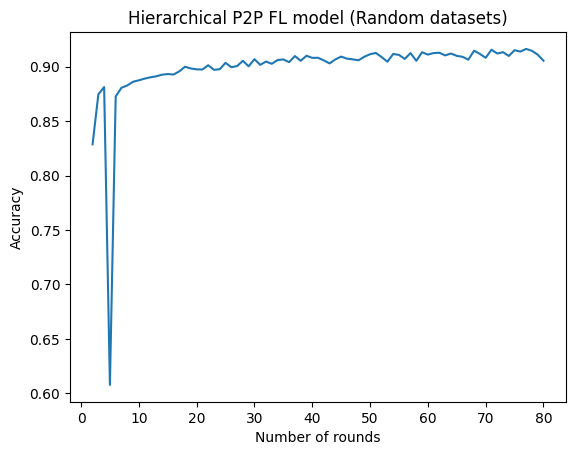

In [395]:
fig = plt.figure()


plt.plot(h_values, random_hierarchical_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_hierarchical_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

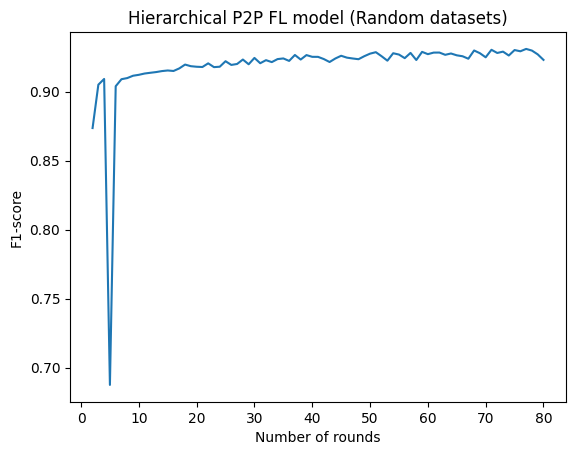

In [396]:
fig = plt.figure()


plt.plot(h_values, random_hierarchical_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_hierarchical_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

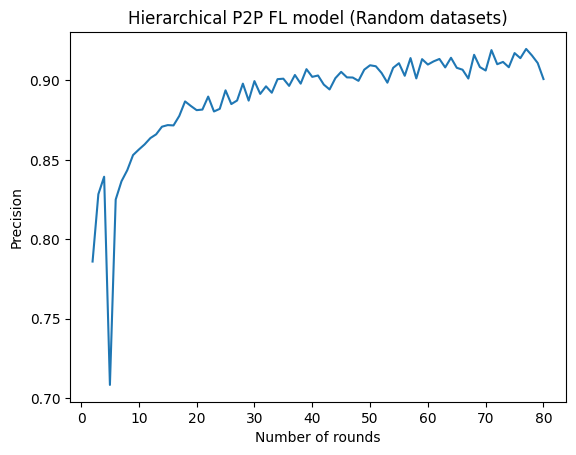

In [397]:
fig = plt.figure()


plt.plot(h_values, random_hierarchical_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_hierarchical_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

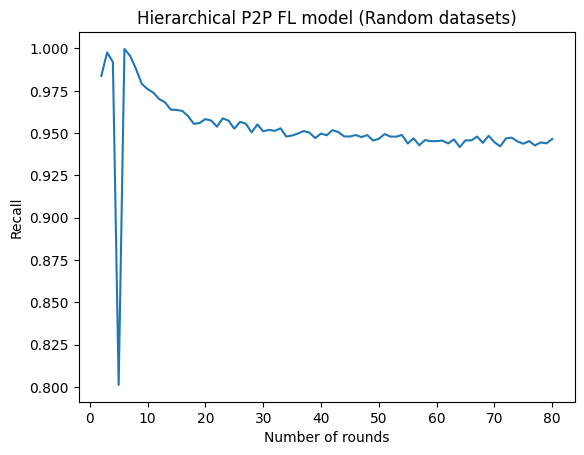

In [398]:
fig = plt.figure()


plt.plot(h_values, random_hierarchical_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_hierarchical_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

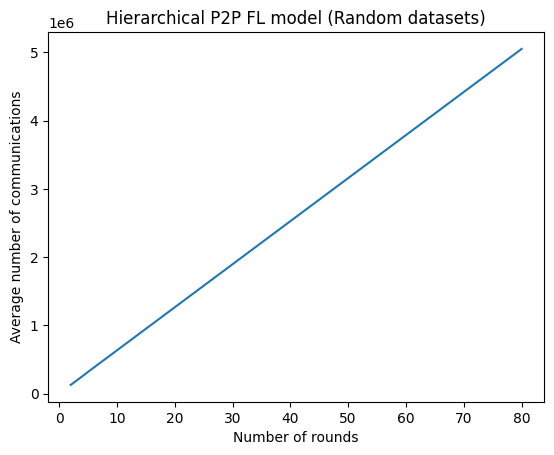

In [399]:
fig = plt.figure()

plt.plot(h_values, random_hierarchical_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_hierarchical_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

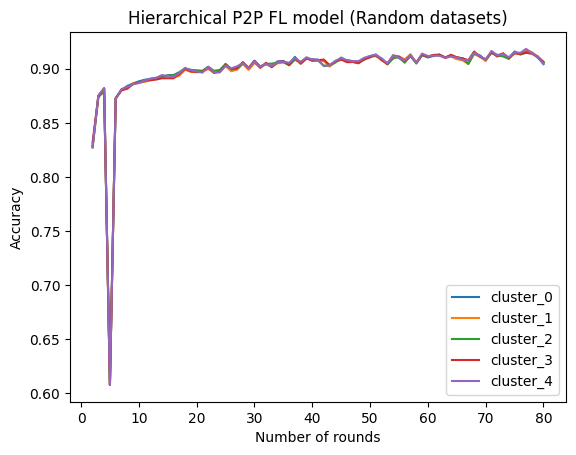

In [400]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, random_hierarchical_separate_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_hierarchical_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

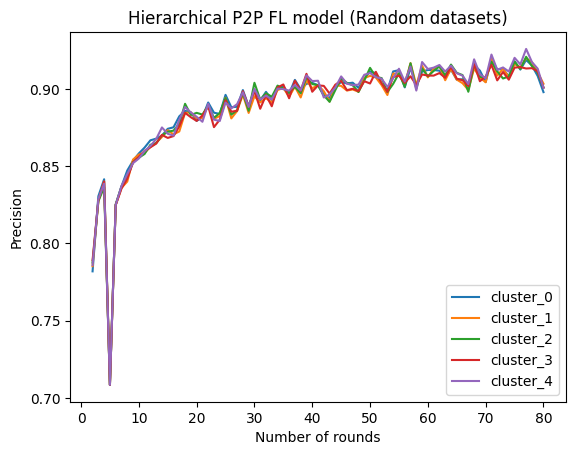

In [401]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, random_hierarchical_separate_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_hierarchical_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

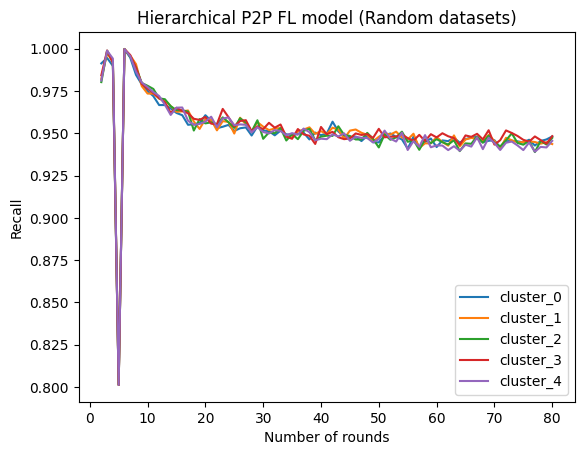

In [402]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, random_hierarchical_separate_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_hierarchical_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

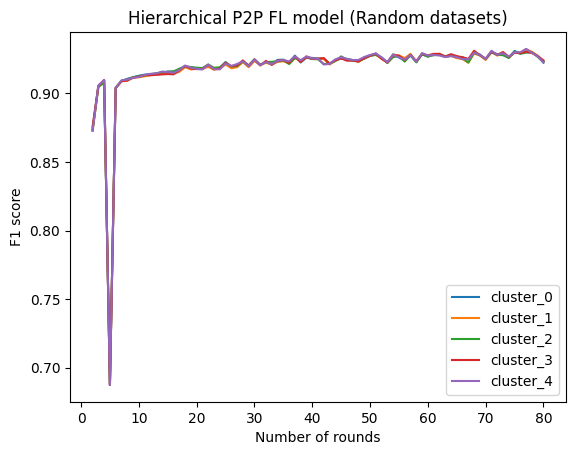

In [403]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, random_hierarchical_separate_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("Hierarchical P2P FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_hierarchical_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# General

In [777]:
acc_file = open("random/random_General_14102022_rounds.pkl", "rb")
random_general_result1 = pickle.load(acc_file)
acc_file.close()

In [778]:
bcc_file = open("random/random_General_01112022_rounds.pkl", "rb")
random_general_result2 = pickle.load(bcc_file)
bcc_file.close()

In [779]:
ccc_file = open("random/random_General_01112022_rounds.pkl", "rb")
random_general_result3 = pickle.load(ccc_file)
ccc_file.close()

In [780]:
g_values = np.array(random_general_result1['Number of rounds']).tolist()

In [781]:
############################### Accuracy #################################

In [782]:
# random_general_result1_accuracy = random_general_result1['Accuracy'].to_numpy()
# random_general_result2_accuracy = random_general_result2['Accuracy'].to_numpy()
# random_general_result3_accuracy = random_general_result3['Accuracy'].to_numpy()

In [783]:
random_general_result1_accuracy = {}
random_general_result1_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result1_accuracy[model_name] = list()
    for index in range(len(random_general_result1)):
        random_general_result1_accuracy[model_name].append(random_general_result1['Accuracy'][index][model_name])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += random_general_result1_accuracy[model_name][row]
    random_general_result1_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [784]:
random_general_result2_accuracy = {}
random_general_result2_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result2_accuracy[model_name] = list()
    for index in range(len(random_general_result2)):
        random_general_result2_accuracy[model_name].append(random_general_result2['Accuracy'][index][model_name])        

        
for row in range(len(g_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += random_general_result2_accuracy[model_name][row]
    random_general_result2_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [785]:
random_general_result3_accuracy = {}
random_general_result3_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result3_accuracy[model_name] = list()
    for index in range(len(random_general_result3)):
        random_general_result3_accuracy[model_name].append(random_general_result3['Accuracy'][index][model_name])        

        
for row in range(len(g_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += random_general_result3_accuracy[model_name][row]
    random_general_result3_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [786]:
random_general_result1_AVG_accuracy = np.asarray(random_general_result1_AVG_accuracy)
random_general_result2_AVG_accuracy = np.asarray(random_general_result2_AVG_accuracy)
random_general_result3_AVG_accuracy = np.asarray(random_general_result3_AVG_accuracy)


random_general_accuracy = random_general_result1_AVG_accuracy + random_general_result2_AVG_accuracy + random_general_result3_AVG_accuracy
random_general_accuracy = random_general_accuracy/NUM_FILES

In [414]:
############################### F1-score #################################

In [415]:
# random_general_result1_f1_score = random_general_result1['F1_score'].to_numpy()
# random_general_result2_f1_score = random_general_result2['F1_score'].to_numpy()
# random_general_result3_f1_score = random_general_result3['F1_score'].to_numpy()

In [787]:
random_general_result1_f1_score = {}
random_general_result1_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result1_f1_score[model_name] = list()
    for index in range(len(random_general_result1)):
        random_general_result1_f1_score[model_name].append(random_general_result1['F1_score'][index][model_name])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += random_general_result1_f1_score[model_name][row]
    random_general_result1_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [788]:
random_general_result2_f1_score = {}
random_general_result2_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result2_f1_score[model_name] = list()
    for index in range(len(random_general_result2)):
        random_general_result2_f1_score[model_name].append(random_general_result2['F1_score'][index][model_name])        

        
for row in range(len(g_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += random_general_result2_f1_score[model_name][row]
    random_general_result2_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [789]:
random_general_result3_f1_score = {}
random_general_result3_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result3_f1_score[model_name] = list()
    for index in range(len(random_general_result3)):
        random_general_result3_f1_score[model_name].append(random_general_result3['F1_score'][index][model_name])        

        
for row in range(len(g_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += random_general_result3_f1_score[model_name][row]
    random_general_result3_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [790]:
random_general_result1_AVG_f1_score = np.asarray(random_general_result1_AVG_f1_score)
random_general_result2_AVG_f1_score = np.asarray(random_general_result2_AVG_f1_score)
random_general_result3_AVG_f1_score = np.asarray(random_general_result3_AVG_f1_score)


random_general_f1_score = random_general_result1_AVG_f1_score + random_general_result2_AVG_f1_score + random_general_result3_AVG_f1_score
random_general_f1_score = random_general_f1_score/NUM_FILES

In [420]:
############################### Precision #################################

In [421]:
# random_general_result1_precision = random_general_result1['Precision'].to_numpy()
# random_general_result2_precision = random_general_result2['Precision'].to_numpy()
# random_general_result3_precision = random_general_result3['Precision'].to_numpy()

In [791]:
random_general_result1_precision = {}
random_general_result1_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result1_precision[model_name] = list()
    for index in range(len(random_general_result1)):
        random_general_result1_precision[model_name].append(random_general_result1['Precision'][index][model_name])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += random_general_result1_precision[model_name][row]
    random_general_result1_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [792]:
random_general_result2_precision = {}
random_general_result2_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result2_precision[model_name] = list()
    for index in range(len(random_general_result2)):
        random_general_result2_precision[model_name].append(random_general_result2['Precision'][index][model_name])        

        
for row in range(len(g_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += random_general_result2_precision[model_name][row]
    random_general_result2_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [793]:
random_general_result3_precision = {}
random_general_result3_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result3_precision[model_name] = list()
    for index in range(len(random_general_result3)):
        random_general_result3_precision[model_name].append(random_general_result3['Precision'][index][model_name])        

        
for row in range(len(g_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += random_general_result3_precision[model_name][row]
    random_general_result3_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [794]:
random_general_result1_AVG_precision = np.asarray(random_general_result1_AVG_precision)
random_general_result2_AVG_precision = np.asarray(random_general_result2_AVG_precision)
random_general_result3_AVG_precision = np.asarray(random_general_result3_AVG_precision)


random_general_precision = random_general_result1_AVG_precision + random_general_result2_AVG_precision + random_general_result3_AVG_precision
random_general_precision = random_general_precision/NUM_FILES

In [426]:
############################### Recall #################################

In [427]:
# random_general_result1_recall = random_general_result1['Recall'].to_numpy()
# random_general_result2_recall = random_general_result2['Recall'].to_numpy()
# random_general_result3_recall = random_general_result3['Recall'].to_numpy()

In [795]:
random_general_result1_recall = {}
random_general_result1_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result1_recall[model_name] = list()
    for index in range(len(random_general_result1)):
        random_general_result1_recall[model_name].append(random_general_result1['Recall'][index][model_name])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += random_general_result1_recall[model_name][row]
    random_general_result1_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [796]:
random_general_result2_recall = {}
random_general_result2_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result2_recall[model_name] = list()
    for index in range(len(random_general_result2)):
        random_general_result2_recall[model_name].append(random_general_result2['Recall'][index][model_name])        

        
for row in range(len(g_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += random_general_result2_recall[model_name][row]
    random_general_result2_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [797]:
random_general_result3_recall = {}
random_general_result3_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_result3_recall[model_name] = list()
    for index in range(len(random_general_result3)):
        random_general_result3_recall[model_name].append(random_general_result3['Recall'][index][model_name])        

        
for row in range(len(g_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += random_general_result3_recall[model_name][row]
    random_general_result3_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [798]:
random_general_result1_AVG_recall = np.asarray(random_general_result1_AVG_recall)
random_general_result2_AVG_recall = np.asarray(random_general_result2_AVG_recall)
random_general_result3_AVG_recall = np.asarray(random_general_result3_AVG_recall)


random_general_recall = random_general_result1_AVG_recall + random_general_result2_AVG_recall + random_general_result3_AVG_recall
random_general_recall = random_general_recall/NUM_FILES

In [799]:
############################### Communication #################################

In [800]:
random_general_comm = {}

random_general_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    random_general_comm[model_name] = list()
    for row in range(len(random_general_result1)):
        random_general_comm[model_name].append(random_general_result1['Number of communications'][row][model_name])

        
for row in range(len(g_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += random_general_comm[model_name][row]
    random_general_avg_communications.append(sum_communications/NUM_CLIENTS)  

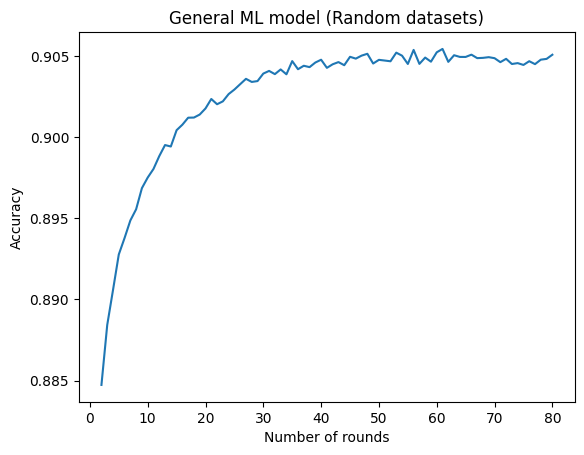

In [801]:
fig = plt.figure()


plt.plot(g_values, random_general_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("General ML model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_general_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

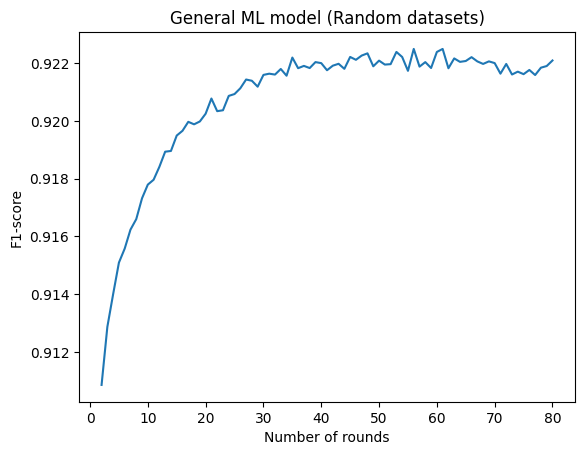

In [802]:
fig = plt.figure()


plt.plot(g_values, random_general_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("General ML model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_general_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

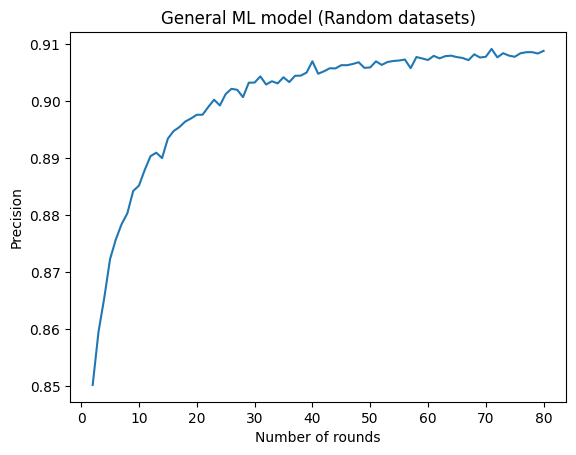

In [803]:
fig = plt.figure()


plt.plot(g_values, random_general_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("General ML model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_general_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

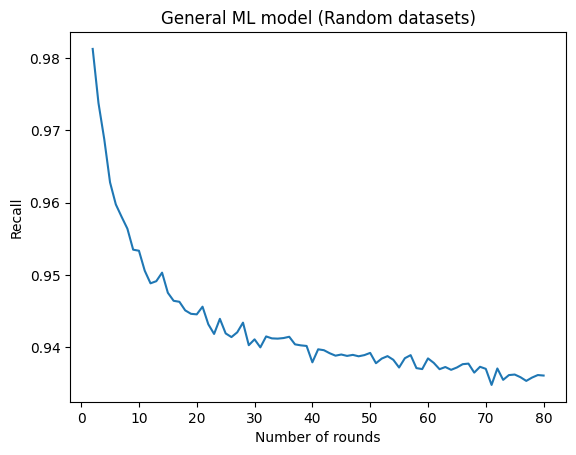

In [804]:
fig = plt.figure()


plt.plot(g_values, random_general_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("General ML model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_general_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

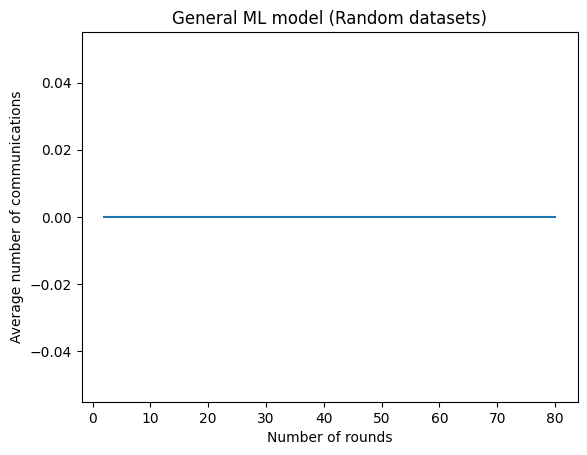

In [805]:
fig = plt.figure()

plt.plot(g_values, random_general_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("General ML model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_general_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Centralized

In [439]:
acc_file = open("random/random_Centralized_14102022_rounds.pkl", "rb")
random_centralized_result1 = pickle.load(acc_file)
acc_file.close()

In [440]:
bcc_file = open("random/random_Centralized_01112022_rounds.pkl", "rb")
random_centralized_result2 = pickle.load(bcc_file)
bcc_file.close()

In [441]:
ccc_file = open("random/random_Centralized_01112022_rounds.pkl", "rb")
random_centralized_result3 = pickle.load(ccc_file)
ccc_file.close()

In [442]:
m_values = np.array(random_centralized_result1['Number of rounds']).tolist()

In [443]:
random_centralized_result1_accuracy = random_centralized_result1['Accuracy'].to_numpy()
random_centralized_result2_accuracy = random_centralized_result2['Accuracy'].to_numpy()
random_centralized_result3_accuracy = random_centralized_result3['Accuracy'].to_numpy()

In [444]:
random_centralized_result1_f1_score = random_centralized_result1['F1_score'].to_numpy()
random_centralized_result2_f1_score = random_centralized_result2['F1_score'].to_numpy()
random_centralized_result3_f1_score = random_centralized_result3['F1_score'].to_numpy()

In [445]:
random_centralized_result1_precision = random_centralized_result1['Precision'].to_numpy()
random_centralized_result2_precision = random_centralized_result2['Precision'].to_numpy()
random_centralized_result3_precision = random_centralized_result3['Precision'].to_numpy()

In [446]:
random_centralized_result1_recall = random_centralized_result1['Recall'].to_numpy()
random_centralized_result2_recall = random_centralized_result2['Recall'].to_numpy()
random_centralized_result3_recall = random_centralized_result3['Recall'].to_numpy()

In [447]:
random_centralized_accuracy = random_centralized_result1_accuracy + random_centralized_result2_accuracy + random_centralized_result3_accuracy
random_centralized_accuracy = random_centralized_accuracy/NUM_FILES

In [448]:
random_centralized_f1_score = random_centralized_result1_f1_score + random_centralized_result2_f1_score + random_centralized_result3_f1_score
random_centralized_f1_score = random_centralized_f1_score/NUM_FILES

In [449]:
random_centralized_precision = random_centralized_result1_precision + random_centralized_result2_precision + random_centralized_result3_precision
random_centralized_precision = random_centralized_precision/NUM_FILES

In [450]:
random_centralized_recall = random_centralized_result1_recall + random_centralized_result2_recall + random_centralized_result3_recall
random_centralized_recall = random_centralized_recall/NUM_FILES

In [451]:
random_centralized_comm = {}

random_centralized_avg_communications = []


for index in range(len(centralized_model_list)):
    model_name = centralized_model_list[index]
    random_centralized_comm[model_name] = list()
    for row in range(len(random_centralized_result1)):
        random_centralized_comm[model_name].append(random_centralized_result1['Number of communications'][row][model_name])

        
for row in range(len(m_values)):
    sum_communications = 0
    for index in range(len(centralized_model_list)):
        model_name = centralized_model_list[index]
        sum_communications += random_centralized_comm[model_name][row]
    random_centralized_avg_communications.append(sum_communications/NUM_CLIENTS)  

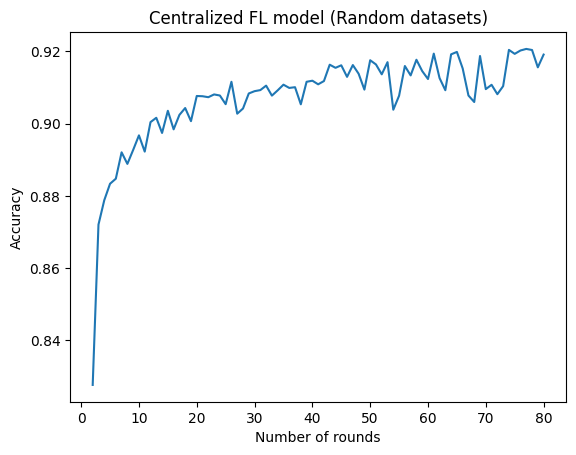

In [452]:
fig = plt.figure()


plt.plot(m_values, random_centralized_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_centralized_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

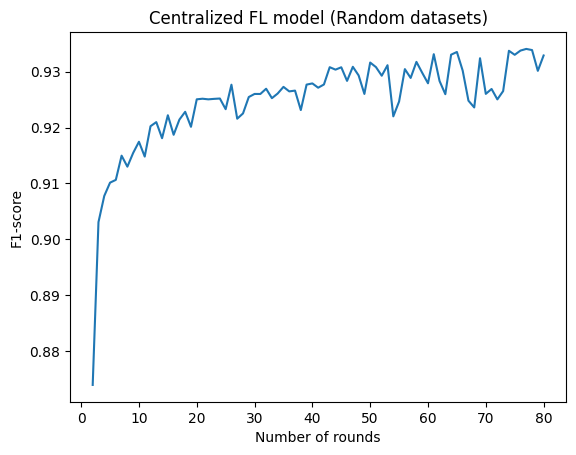

In [453]:
fig = plt.figure()


plt.plot(m_values, random_centralized_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_centralized_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

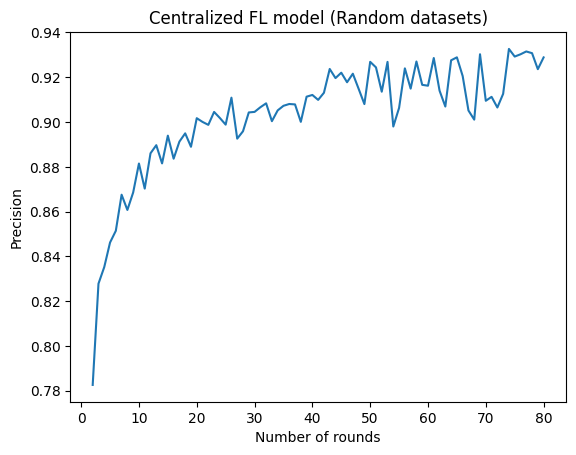

In [454]:
fig = plt.figure()


plt.plot(m_values, random_centralized_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_centralized_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

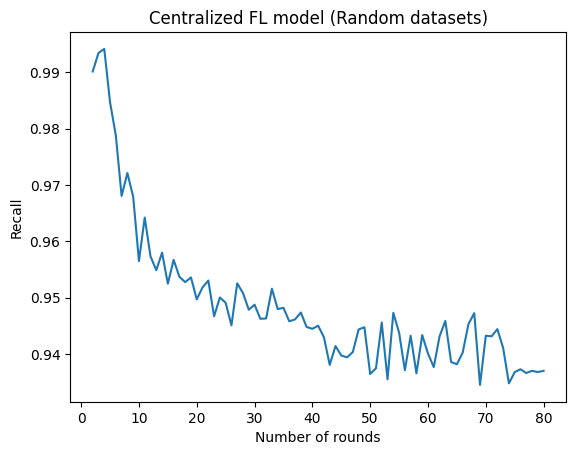

In [455]:
fig = plt.figure()


plt.plot(m_values, random_centralized_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "random/plots/random_centralized_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

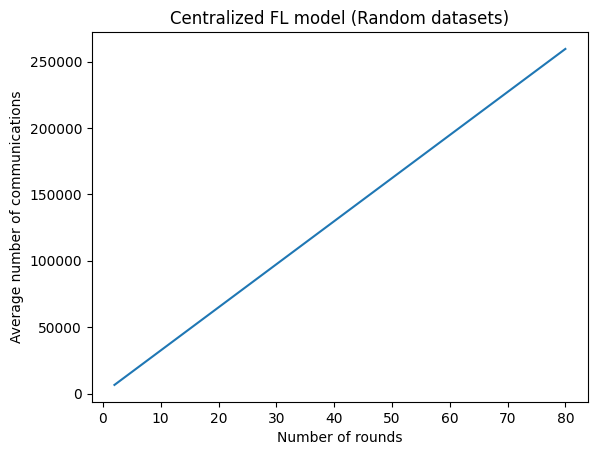

In [456]:
fig = plt.figure()

plt.plot(m_values, random_centralized_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Centralized FL model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "random/plots/random_centralized_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Homomorphic encryption

In [ ]:
acc_file = open("random/random_Homomorphic_33102022_rounds.pkl", "rb")
homomorphic_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
homomorphic_result

In [ ]:
homomorphic_result['Number of communications'][0]

In [ ]:
e_rounds = np.array(homomorphic_result['Number of rounds']).tolist()
# print(e_rounds)

In [ ]:
## For combine plotting
random_homomorphic_accuracy = np.array(homomorphic_result['Accuracy']).tolist()

In [ ]:
homomorphic_accuracy_fig = homomorphic_result.plot(x='Number of rounds', y='Accuracy', title='P2P Homomorphic model (Random datasets)').get_figure()

# acc_fig.set(xlabel='Number of rounds', ylabel='Accuracy')

# saving the figure
fig_name = "random/plots/random_Homomorphic_accuracy_vs_total_rounds_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

homomorphic_accuracy_fig.patch.set_facecolor('xkcd:white')
homomorphic_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_precision_fig = homomorphic_result.plot(x='Number of rounds', y='Precision', title='P2P Homomorphic model (Random datasets)').get_figure()


# saving the figure
fig_name = "random/plots/random_Homomorphic_precision_vs_total_rounds_" + str(current_date) + ".png"


homomorphic_precision_fig.patch.set_facecolor('xkcd:white')
homomorphic_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_recall_fig = homomorphic_result.plot(x='Number of rounds', y='Recall', title='P2P Homomorphic model (Random datasets)').get_figure()



# saving the figure
fig_name = "random/plots/random_Homomorphic_recall_vs_total_rounds_" + str(current_date) + ".png"



homomorphic_recall_fig.patch.set_facecolor('xkcd:white')
homomorphic_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_f1_fig = homomorphic_result.plot(x='Number of rounds', y="F1 score", title='P2P Homomorphic model (Random datasets)').get_figure()

# # saving the figure
# fig_name = "random/plots/Homomorphic_f1_score_vs_total_rounds_" + str(current_date) + ".png"



# homomorphic_f1_fig.patch.set_facecolor('xkcd:white')
# homomorphic_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result.iloc[:,11]

In [ ]:
homomorphic_f1_score = homomorphic_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(e_rounds, homomorphic_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("P2P Homomorphic model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "random/plots/random_Homomorphic_f1_score_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
random_homomorphic_f1_score = copy.deepcopy(homomorphic_f1_score)

In [ ]:
homomorphic_time_fig = homomorphic_result.plot(x='Number of rounds', y='Training Time', title='P2P Homomorphic model (Random datasets)').get_figure()

# saving the figure
fig_name = "random/plots/random_Homomorphic_training_time_vs_total_rounds_" + str(current_date) + ".png"

homomorphic_time_fig.patch.set_facecolor('xkcd:white')
homomorphic_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result['Number of communications']

In [ ]:
e_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    e_comm[model_name] = list()
    for row in range(len(homomorphic_result)):
        e_comm[model_name].append(homomorphic_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Number of rounds")
# plt.ylabel("Number of communications")
# plt.title("P2P Homomorphic model (Random datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "random/plots/random_Homomorphic_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(e_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += e_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(e_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("P2P Homomorphic model (Random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_Homomorphic_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# IID datasets

# TargentEnc

In [457]:
acc_file = open("IID/IID_TargetEnc_14102022_rounds.pkl", "rb")
IID_target_result1 = pickle.load(acc_file)
acc_file.close()

In [458]:
bcc_file = open("IID/IID_TargetEnc_01112022_rounds.pkl", "rb")
IID_target_result2 = pickle.load(bcc_file)
bcc_file.close()

In [459]:
ccc_file = open("IID/IID_TargetEnc_01112022_rounds.pkl", "rb")
IID_target_result3 = pickle.load(ccc_file)
ccc_file.close()

In [460]:
t_values = np.array(IID_target_result1['Number of rounds']).tolist()

In [461]:
IID_target_result1_accuracy = IID_target_result1['Accuracy'].to_numpy()
IID_target_result2_accuracy = IID_target_result2['Accuracy'].to_numpy()
IID_target_result3_accuracy = IID_target_result3['Accuracy'].to_numpy()

In [462]:
IID_target_result1_f1_score = IID_target_result1['F1_score'].to_numpy()
IID_target_result2_f1_score = IID_target_result2['F1_score'].to_numpy()
IID_target_result3_f1_score = IID_target_result3['F1_score'].to_numpy()

In [463]:
IID_target_result1_precision = IID_target_result1['Precision'].to_numpy()
IID_target_result2_precision = IID_target_result2['Precision'].to_numpy()
IID_target_result3_precision = IID_target_result3['Precision'].to_numpy()

In [464]:
IID_target_result1_recall = IID_target_result1['Recall'].to_numpy()
IID_target_result2_recall = IID_target_result2['Recall'].to_numpy()
IID_target_result3_recall = IID_target_result3['Recall'].to_numpy()

In [465]:
IID_target_accuracy = IID_target_result1_accuracy + IID_target_result2_accuracy + IID_target_result3_accuracy
IID_target_accuracy = IID_target_accuracy/NUM_FILES

In [466]:
IID_target_f1_score = IID_target_result1_f1_score + IID_target_result2_f1_score + IID_target_result3_f1_score
IID_target_f1_score = IID_target_f1_score/NUM_FILES

In [467]:
IID_target_precision = IID_target_result1_precision + IID_target_result2_precision + IID_target_result3_precision
IID_target_precision = IID_target_precision/NUM_FILES

In [468]:
IID_target_recall = IID_target_result1_recall + IID_target_result2_recall + IID_target_result3_recall
IID_target_recall = IID_target_recall/NUM_FILES

In [469]:
IID_target_comm = {}

IID_target_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_target_comm[model_name] = list()
    for row in range(len(IID_target_result1)):
        IID_target_comm[model_name].append(IID_target_result1['Number of communications'][row][model_name])

        
for row in range(len(t_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += IID_target_comm[model_name][row]
    IID_target_avg_communications.append(sum_communications/NUM_CLIENTS)  

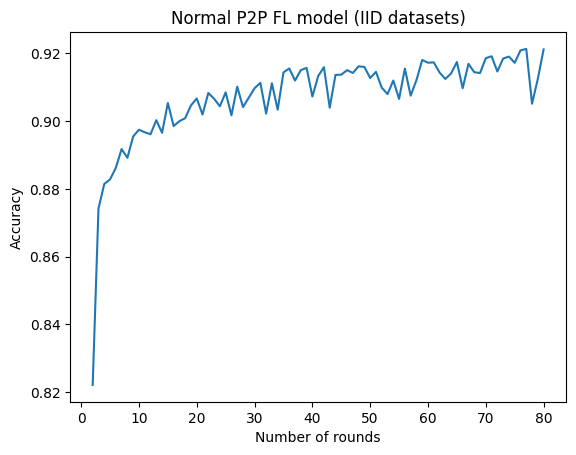

In [470]:
fig = plt.figure()


plt.plot(t_values, IID_target_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Normal P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_targetEnc_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

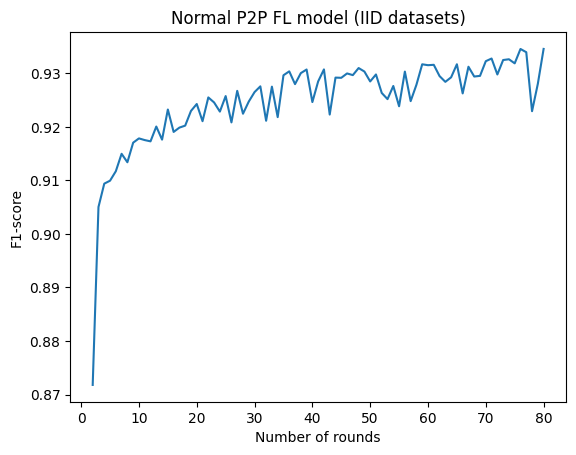

In [471]:
fig = plt.figure()


plt.plot(t_values, IID_target_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Normal P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_targetEnc_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

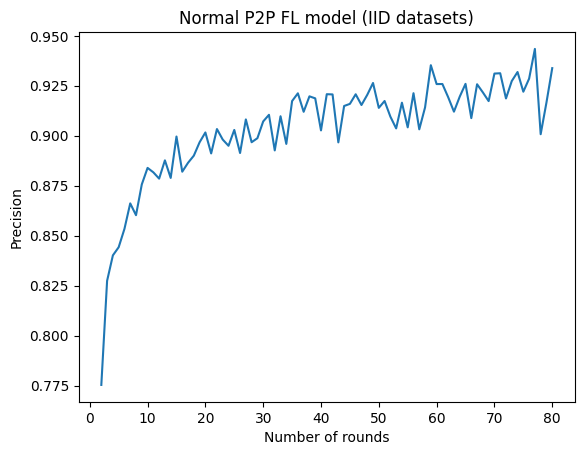

In [472]:
fig = plt.figure()


plt.plot(t_values, IID_target_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Normal P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_targetEnc_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

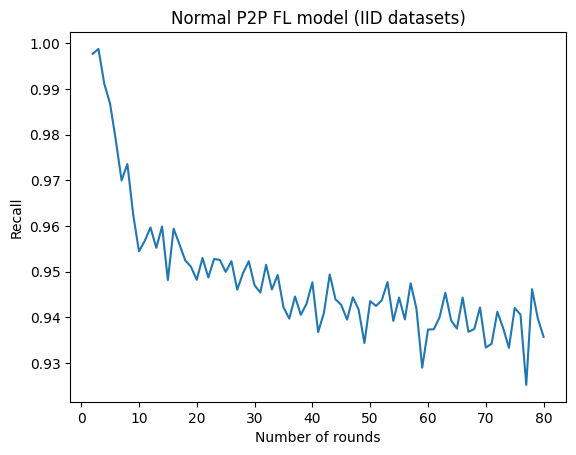

In [473]:
fig = plt.figure()


plt.plot(t_values, IID_target_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Normal P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_trgetEnc_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

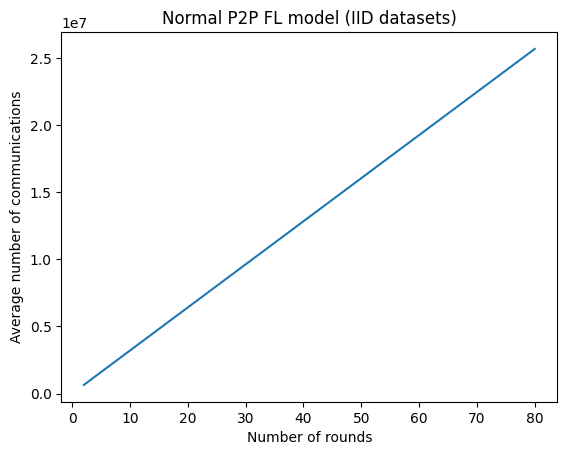

In [474]:
fig = plt.figure()

plt.plot(t_values, IID_target_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Normal P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_targetEnc_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Clustered

In [475]:
acc_file = open("IID/IID_Clustered_14102022_rounds.pkl", "rb")
IID_clustered_result1 = pickle.load(acc_file)
acc_file.close()

In [476]:
bcc_file = open("IID/IID_Clustered_01112022_rounds.pkl", "rb")
IID_clustered_result2 = pickle.load(bcc_file)
bcc_file.close()

In [477]:
ccc_file = open("IID/IID_Clustered_01112022_rounds.pkl", "rb")
IID_clustered_result3 = pickle.load(ccc_file)
ccc_file.close()

In [479]:
c_values = np.array(IID_clustered_result1['Number of rounds']).tolist()

In [480]:
############################### Accuracy #################################

In [481]:
# IID_clustered_result1_accuracy = IID_clustered_result1['Accuracy'].to_numpy()
# IID_clustered_result2_accuracy = IID_clustered_result2['Accuracy'].to_numpy()
# IID_clustered_result3_accuracy = IID_clustered_result3['Accuracy'].to_numpy()

In [482]:


IID_clustered_result1_accuracy = {}
IID_clustered_result1_AVG_accuracy = []

for cluster in cluster_list:
    IID_clustered_result1_accuracy[cluster] = list()
    for index in range(len(IID_clustered_result1)):
        IID_clustered_result1_accuracy[cluster].append(IID_clustered_result1['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += IID_clustered_result1_accuracy[cluster_name][row]
    IID_clustered_result1_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)   


In [483]:
IID_clustered_result2_accuracy = {}
IID_clustered_result2_AVG_accuracy = []

for cluster in cluster_list:
    IID_clustered_result2_accuracy[cluster] = list()
    for index in range(len(IID_clustered_result2)):
        IID_clustered_result2_accuracy[cluster].append(IID_clustered_result2['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += IID_clustered_result2_accuracy[cluster_name][row]
    IID_clustered_result2_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [484]:
IID_clustered_result3_accuracy = {}
IID_clustered_result3_AVG_accuracy = []

for cluster in cluster_list:
    IID_clustered_result3_accuracy[cluster] = list()
    for index in range(len(IID_clustered_result3)):
        IID_clustered_result3_accuracy[cluster].append(IID_clustered_result3['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += IID_clustered_result3_accuracy[cluster_name][row]
    IID_clustered_result3_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [485]:
IID_clustered_separate_accuracy = {}
for cluster in cluster_list:
    IID_clustered_separate_accuracy[cluster] = np.zeros(len(c_values))
    IID_clustered_separate_accuracy[cluster] = np.asarray(IID_clustered_result1_accuracy[cluster]) + np.asarray(IID_clustered_result2_accuracy[cluster]) + np.asarray(IID_clustered_result3_accuracy[cluster])
    IID_clustered_separate_accuracy[cluster] = IID_clustered_separate_accuracy[cluster]/NUM_FILES

In [486]:
IID_clustered_result1_AVG_accuracy = np.asarray(IID_clustered_result1_AVG_accuracy)
IID_clustered_result2_AVG_accuracy = np.asarray(IID_clustered_result2_AVG_accuracy)
IID_clustered_result3_AVG_accuracy = np.asarray(IID_clustered_result3_AVG_accuracy)


IID_clustered_accuracy = IID_clustered_result1_AVG_accuracy + IID_clustered_result2_AVG_accuracy + IID_clustered_result3_AVG_accuracy
IID_clustered_accuracy = IID_clustered_accuracy/NUM_FILES

In [487]:
############################### F1-score #################################

In [488]:
# IID_clustered_result1_f1_score = IID_clustered_result1['F1_score'].to_numpy()
# IID_clustered_result2_f1_score = IID_clustered_result2['F1_score'].to_numpy()
# IID_clustered_result3_f1_score = IID_clustered_result3['F1_score'].to_numpy()

In [489]:

IID_clustered_result1_f1_score = {}
IID_clustered_result1_AVG_f1_score = []

for cluster in cluster_list:
    IID_clustered_result1_f1_score[cluster] = list()
    for index in range(len(IID_clustered_result1)):
        IID_clustered_result1_f1_score[cluster].append(IID_clustered_result1['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += IID_clustered_result1_f1_score[cluster_name][row]
    IID_clustered_result1_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)   


In [490]:
IID_clustered_result2_f1_score = {}
IID_clustered_result2_AVG_f1_score = []

for cluster in cluster_list:
    IID_clustered_result2_f1_score[cluster] = list()
    for index in range(len(IID_clustered_result2)):
        IID_clustered_result2_f1_score[cluster].append(IID_clustered_result2['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += IID_clustered_result2_f1_score[cluster_name][row]
    IID_clustered_result2_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [491]:
IID_clustered_result3_f1_score = {}
IID_clustered_result3_AVG_f1_score = []

for cluster in cluster_list:
    IID_clustered_result3_f1_score[cluster] = list()
    for index in range(len(IID_clustered_result3)):
        IID_clustered_result3_f1_score[cluster].append(IID_clustered_result3['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += IID_clustered_result3_f1_score[cluster_name][row]
    IID_clustered_result3_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [492]:
IID_clustered_separate_f1_score = {}
for cluster in cluster_list:
    IID_clustered_separate_f1_score[cluster] = np.zeros(len(c_values))
    IID_clustered_separate_f1_score[cluster] = np.asarray(IID_clustered_result1_f1_score[cluster]) + np.asarray(IID_clustered_result2_f1_score[cluster]) + np.asarray(IID_clustered_result3_f1_score[cluster])
    IID_clustered_separate_f1_score[cluster] = IID_clustered_separate_f1_score[cluster]/NUM_FILES

In [493]:
IID_clustered_result1_AVG_f1_score = np.asarray(IID_clustered_result1_AVG_f1_score)
IID_clustered_result2_AVG_f1_score = np.asarray(IID_clustered_result2_AVG_f1_score)
IID_clustered_result3_AVG_f1_score = np.asarray(IID_clustered_result3_AVG_f1_score)


IID_clustered_f1_score = IID_clustered_result1_AVG_f1_score + IID_clustered_result2_AVG_f1_score + IID_clustered_result3_AVG_f1_score
IID_clustered_f1_score = IID_clustered_f1_score/NUM_FILES

In [494]:
############################### Precision #################################

In [495]:
# IID_clustered_result1_precision = IID_clustered_result1['Precision'].to_numpy()
# IID_clustered_result2_precision = IID_clustered_result2['Precision'].to_numpy()
# IID_clustered_result3_precision = IID_clustered_result3['Precision'].to_numpy()

In [496]:

IID_clustered_result1_precision = {}
IID_clustered_result1_AVG_precision = []

for cluster in cluster_list:
    IID_clustered_result1_precision[cluster] = list()
    for index in range(len(IID_clustered_result1)):
        IID_clustered_result1_precision[cluster].append(IID_clustered_result1['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += IID_clustered_result1_precision[cluster_name][row]
    IID_clustered_result1_AVG_precision.append(sum_precision/NUM_CLUSTERS)   


In [497]:
IID_clustered_result2_precision = {}
IID_clustered_result2_AVG_precision = []

for cluster in cluster_list:
    IID_clustered_result2_precision[cluster] = list()
    for index in range(len(IID_clustered_result2)):
        IID_clustered_result2_precision[cluster].append(IID_clustered_result2['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += IID_clustered_result2_precision[cluster_name][row]
    IID_clustered_result2_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [498]:
IID_clustered_result3_precision = {}
IID_clustered_result3_AVG_precision = []

for cluster in cluster_list:
    IID_clustered_result3_precision[cluster] = list()
    for index in range(len(IID_clustered_result3)):
        IID_clustered_result3_precision[cluster].append(IID_clustered_result3['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += IID_clustered_result3_precision[cluster_name][row]
    IID_clustered_result3_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [499]:
IID_clustered_separate_precision = {}
for cluster in cluster_list:
    IID_clustered_separate_precision[cluster] = np.zeros(len(c_values))
    IID_clustered_separate_precision[cluster] = np.asarray(IID_clustered_result1_precision[cluster]) + np.asarray(IID_clustered_result2_precision[cluster]) + np.asarray(IID_clustered_result3_precision[cluster])
    IID_clustered_separate_precision[cluster] = IID_clustered_separate_precision[cluster]/NUM_FILES

In [500]:
IID_clustered_result1_AVG_precision = np.asarray(IID_clustered_result1_AVG_precision)
IID_clustered_result2_AVG_precision = np.asarray(IID_clustered_result2_AVG_precision)
IID_clustered_result3_AVG_precision = np.asarray(IID_clustered_result3_AVG_precision)


IID_clustered_precision = IID_clustered_result1_AVG_precision + IID_clustered_result2_AVG_precision + IID_clustered_result3_AVG_precision
IID_clustered_precision = IID_clustered_precision/NUM_FILES

In [501]:
############################### Recall #################################

In [502]:
# IID_clustered_result1_recall = IID_clustered_result1['Recall'].to_numpy()
# IID_clustered_result2_recall = IID_clustered_result2['Recall'].to_numpy()
# IID_clustered_result3_recall = IID_clustered_result3['Recall'].to_numpy()

In [503]:

IID_clustered_result1_recall = {}
IID_clustered_result1_AVG_recall = []

for cluster in cluster_list:
    IID_clustered_result1_recall[cluster] = list()
    for index in range(len(IID_clustered_result1)):
        IID_clustered_result1_recall[cluster].append(IID_clustered_result1['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += IID_clustered_result1_recall[cluster_name][row]
    IID_clustered_result1_AVG_recall.append(sum_recall/NUM_CLUSTERS)   


In [504]:
IID_clustered_result2_recall = {}
IID_clustered_result2_AVG_recall = []

for cluster in cluster_list:
    IID_clustered_result2_recall[cluster] = list()
    for index in range(len(IID_clustered_result2)):
        IID_clustered_result2_recall[cluster].append(IID_clustered_result2['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += IID_clustered_result2_recall[cluster_name][row]
    IID_clustered_result2_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [505]:
IID_clustered_result3_recall = {}
IID_clustered_result3_AVG_recall = []

for cluster in cluster_list:
    IID_clustered_result3_recall[cluster] = list()
    for index in range(len(IID_clustered_result3)):
        IID_clustered_result3_recall[cluster].append(IID_clustered_result3['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += IID_clustered_result3_recall[cluster_name][row]
    IID_clustered_result3_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [506]:
IID_clustered_separate_recall = {}
for cluster in cluster_list:
    IID_clustered_separate_recall[cluster] = np.zeros(len(c_values))
    IID_clustered_separate_recall[cluster] = np.asarray(IID_clustered_result1_recall[cluster]) + np.asarray(IID_clustered_result2_recall[cluster]) + np.asarray(IID_clustered_result3_recall[cluster])
    IID_clustered_separate_recall[cluster] = IID_clustered_separate_recall[cluster]/NUM_FILES

In [507]:
IID_clustered_result1_AVG_recall = np.asarray(IID_clustered_result1_AVG_recall)
IID_clustered_result2_AVG_recall = np.asarray(IID_clustered_result2_AVG_recall)
IID_clustered_result3_AVG_recall = np.asarray(IID_clustered_result3_AVG_recall)


IID_clustered_recall = IID_clustered_result1_AVG_recall + IID_clustered_result2_AVG_recall + IID_clustered_result3_AVG_recall
IID_clustered_recall = IID_clustered_recall/NUM_FILES

In [508]:
############################### Communication #################################

In [509]:
IID_clustered_comm = {}

IID_clustered_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_clustered_comm[model_name] = list()
    for row in range(len(IID_clustered_result1)):
        IID_clustered_comm[model_name].append(IID_clustered_result1['Number of communications'][row][model_name])

        
for row in range(len(c_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += IID_clustered_comm[model_name][row]
    IID_clustered_avg_communications.append(sum_communications/NUM_CLIENTS)  

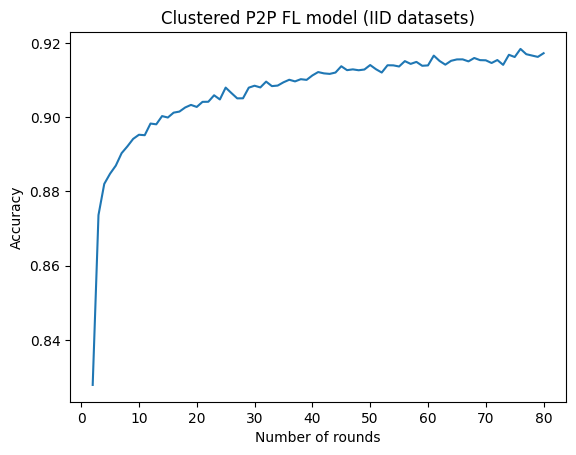

In [510]:
fig = plt.figure()


plt.plot(c_values, IID_clustered_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_clustered_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

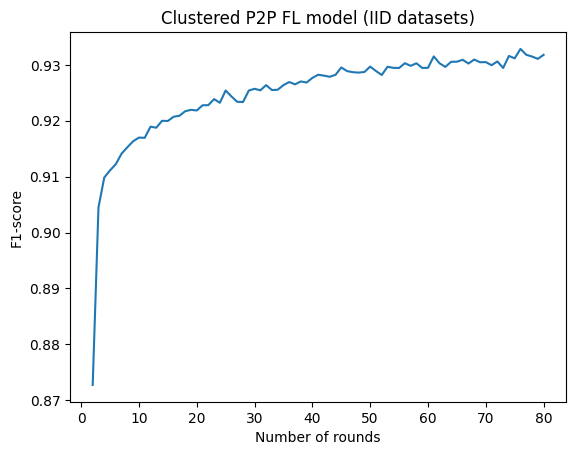

In [511]:
fig = plt.figure()


plt.plot(c_values, IID_clustered_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_clustered_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

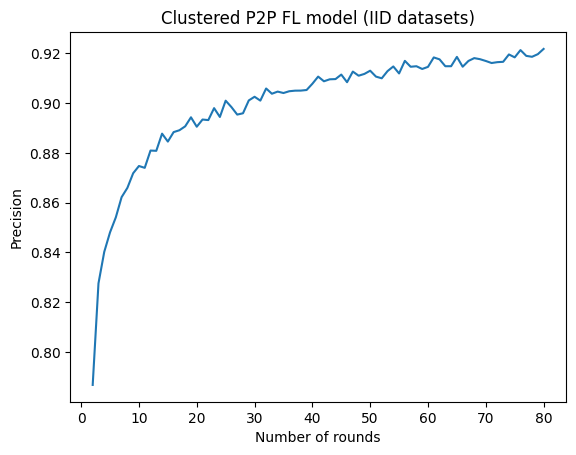

In [512]:
fig = plt.figure()


plt.plot(c_values, IID_clustered_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_clustered_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

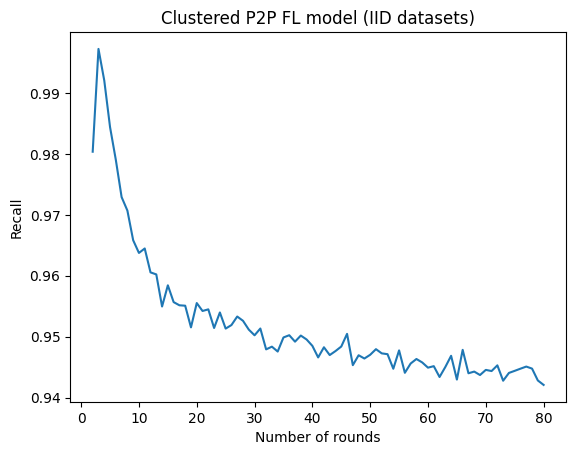

In [513]:
fig = plt.figure()


plt.plot(c_values, IID_clustered_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_clustered_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

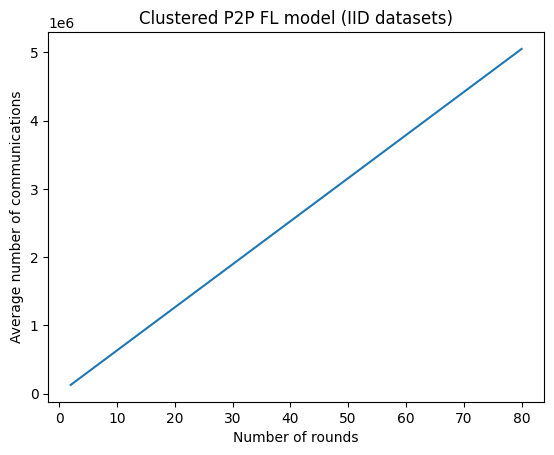

In [514]:
fig = plt.figure()

plt.plot(c_values, IID_clustered_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_clustered_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

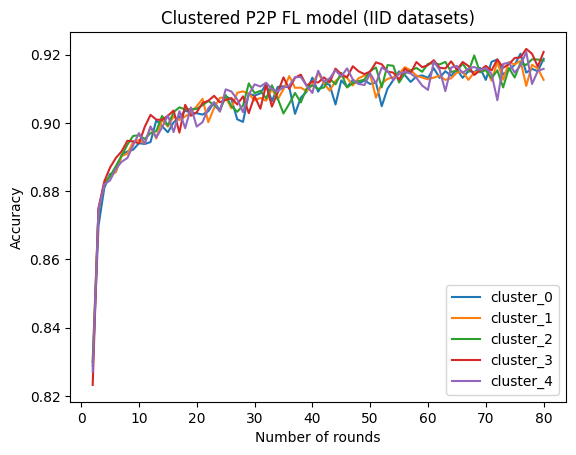

In [515]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, IID_clustered_separate_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_clustered_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

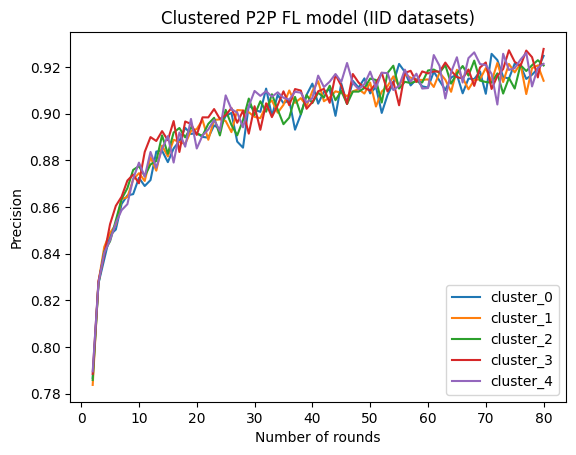

In [516]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, IID_clustered_separate_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_clustered_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

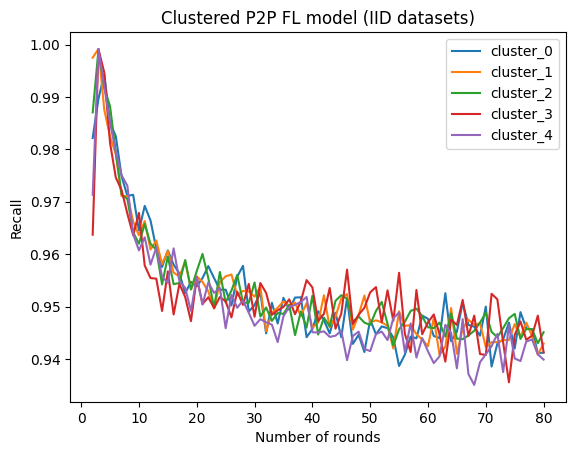

In [517]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, IID_clustered_separate_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_clustered_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

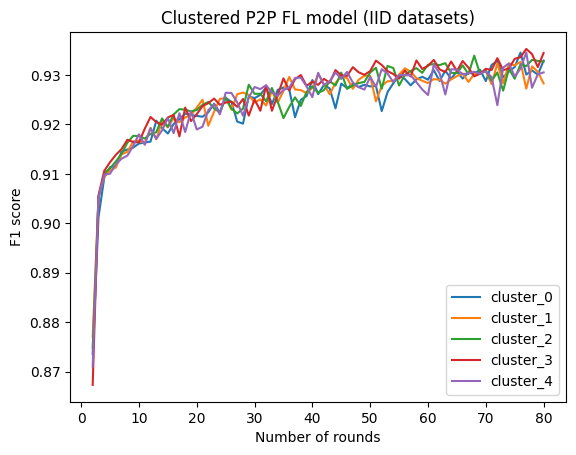

In [518]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, IID_clustered_separate_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("Clustered P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_clustered_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Hierarchical

In [519]:
acc_file = open("IID/IID_Hierarchical_14102022_rounds.pkl", "rb")
IID_hierarchical_result1 = pickle.load(acc_file)
acc_file.close()

In [520]:
bcc_file = open("IID/IID_Hierarchical_01112022_rounds.pkl", "rb")
IID_hierarchical_result2 = pickle.load(bcc_file)
bcc_file.close()

In [521]:
ccc_file = open("IID/IID_Hierarchical_01112022_rounds.pkl", "rb")
IID_hierarchical_result3 = pickle.load(ccc_file)
ccc_file.close()

In [522]:
h_values = np.array(IID_hierarchical_result1['Number of rounds']).tolist()

In [523]:
############################### Accuracy #################################

In [524]:
# IID_hierarchical_result1_accuracy = IID_hierarchical_result1['Accuracy'].to_numpy()
# IID_hierarchical_result2_accuracy = IID_hierarchical_result2['Accuracy'].to_numpy()
# IID_hierarchical_result3_accuracy = IID_hierarchical_result3['Accuracy'].to_numpy()

In [525]:


IID_hierarchical_result1_accuracy = {}
IID_hierarchical_result1_AVG_accuracy = []

for cluster in cluster_list:
    IID_hierarchical_result1_accuracy[cluster] = list()
    for index in range(len(IID_hierarchical_result1)):
        IID_hierarchical_result1_accuracy[cluster].append(IID_hierarchical_result1['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += IID_hierarchical_result1_accuracy[cluster_name][row]
    IID_hierarchical_result1_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)   


In [526]:
IID_hierarchical_result2_accuracy = {}
IID_hierarchical_result2_AVG_accuracy = []

for cluster in cluster_list:
    IID_hierarchical_result2_accuracy[cluster] = list()
    for index in range(len(IID_hierarchical_result2)):
        IID_hierarchical_result2_accuracy[cluster].append(IID_hierarchical_result2['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += IID_hierarchical_result2_accuracy[cluster_name][row]
    IID_hierarchical_result2_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [527]:
IID_hierarchical_result3_accuracy = {}
IID_hierarchical_result3_AVG_accuracy = []

for cluster in cluster_list:
    IID_hierarchical_result3_accuracy[cluster] = list()
    for index in range(len(IID_hierarchical_result3)):
        IID_hierarchical_result3_accuracy[cluster].append(IID_hierarchical_result3['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += IID_hierarchical_result3_accuracy[cluster_name][row]
    IID_hierarchical_result3_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [528]:
IID_hierarchical_separate_accuracy = {}
for cluster in cluster_list:
    IID_hierarchical_separate_accuracy[cluster] = np.zeros(len(h_values))
    IID_hierarchical_separate_accuracy[cluster] = np.asarray(IID_hierarchical_result1_accuracy[cluster]) + np.asarray(IID_hierarchical_result2_accuracy[cluster]) + np.asarray(IID_hierarchical_result3_accuracy[cluster])
    IID_hierarchical_separate_accuracy[cluster] = IID_hierarchical_separate_accuracy[cluster]/NUM_FILES

In [529]:
IID_hierarchical_result1_AVG_accuracy = np.asarray(IID_hierarchical_result1_AVG_accuracy)
IID_hierarchical_result2_AVG_accuracy = np.asarray(IID_hierarchical_result2_AVG_accuracy)
IID_hierarchical_result3_AVG_accuracy = np.asarray(IID_hierarchical_result3_AVG_accuracy)


IID_hierarchical_accuracy = IID_hierarchical_result1_AVG_accuracy + IID_hierarchical_result2_AVG_accuracy + IID_hierarchical_result3_AVG_accuracy
IID_hierarchical_accuracy = IID_hierarchical_accuracy/NUM_FILES

In [530]:
############################### F1-score #################################

In [531]:
# IID_hierarchical_result1_f1_score = IID_hierarchical_result1['F1_score'].to_numpy()
# IID_hierarchical_result2_f1_score = IID_hierarchical_result2['F1_score'].to_numpy()
# IID_hierarchical_result3_f1_score = IID_hierarchical_result3['F1_score'].to_numpy()

In [532]:

IID_hierarchical_result1_f1_score = {}
IID_hierarchical_result1_AVG_f1_score = []

for cluster in cluster_list:
    IID_hierarchical_result1_f1_score[cluster] = list()
    for index in range(len(IID_hierarchical_result1)):
        IID_hierarchical_result1_f1_score[cluster].append(IID_hierarchical_result1['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += IID_hierarchical_result1_f1_score[cluster_name][row]
    IID_hierarchical_result1_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)   


In [533]:
IID_hierarchical_result2_f1_score = {}
IID_hierarchical_result2_AVG_f1_score = []

for cluster in cluster_list:
    IID_hierarchical_result2_f1_score[cluster] = list()
    for index in range(len(IID_hierarchical_result2)):
        IID_hierarchical_result2_f1_score[cluster].append(IID_hierarchical_result2['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += IID_hierarchical_result2_f1_score[cluster_name][row]
    IID_hierarchical_result2_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [534]:
IID_hierarchical_result3_f1_score = {}
IID_hierarchical_result3_AVG_f1_score = []

for cluster in cluster_list:
    IID_hierarchical_result3_f1_score[cluster] = list()
    for index in range(len(IID_hierarchical_result3)):
        IID_hierarchical_result3_f1_score[cluster].append(IID_hierarchical_result3['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += IID_hierarchical_result3_f1_score[cluster_name][row]
    IID_hierarchical_result3_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [535]:
IID_hierarchical_separate_f1_score = {}
for cluster in cluster_list:
    IID_hierarchical_separate_f1_score[cluster] = np.zeros(len(h_values))
    IID_hierarchical_separate_f1_score[cluster] = np.asarray(IID_hierarchical_result1_f1_score[cluster]) + np.asarray(IID_hierarchical_result2_f1_score[cluster]) + np.asarray(IID_hierarchical_result3_f1_score[cluster])
    IID_hierarchical_separate_f1_score[cluster] = IID_hierarchical_separate_f1_score[cluster]/NUM_FILES

In [536]:
IID_hierarchical_result1_AVG_f1_score = np.asarray(IID_hierarchical_result1_AVG_f1_score)
IID_hierarchical_result2_AVG_f1_score = np.asarray(IID_hierarchical_result2_AVG_f1_score)
IID_hierarchical_result3_AVG_f1_score = np.asarray(IID_hierarchical_result3_AVG_f1_score)


IID_hierarchical_f1_score = IID_hierarchical_result1_AVG_f1_score + IID_hierarchical_result2_AVG_f1_score + IID_hierarchical_result3_AVG_f1_score
IID_hierarchical_f1_score = IID_hierarchical_f1_score/NUM_FILES

In [537]:
############################### Precision #################################

In [538]:
# IID_hierarchical_result1_precision = IID_hierarchical_result1['Precision'].to_numpy()
# IID_hierarchical_result2_precision = IID_hierarchical_result2['Precision'].to_numpy()
# IID_hierarchical_result3_precision = IID_hierarchical_result3['Precision'].to_numpy()

In [539]:

IID_hierarchical_result1_precision = {}
IID_hierarchical_result1_AVG_precision = []

for cluster in cluster_list:
    IID_hierarchical_result1_precision[cluster] = list()
    for index in range(len(IID_hierarchical_result1)):
        IID_hierarchical_result1_precision[cluster].append(IID_hierarchical_result1['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += IID_hierarchical_result1_precision[cluster_name][row]
    IID_hierarchical_result1_AVG_precision.append(sum_precision/NUM_CLUSTERS)   


In [540]:
IID_hierarchical_result2_precision = {}
IID_hierarchical_result2_AVG_precision = []

for cluster in cluster_list:
    IID_hierarchical_result2_precision[cluster] = list()
    for index in range(len(IID_hierarchical_result2)):
        IID_hierarchical_result2_precision[cluster].append(IID_hierarchical_result2['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += IID_hierarchical_result2_precision[cluster_name][row]
    IID_hierarchical_result2_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [541]:
IID_hierarchical_result3_precision = {}
IID_hierarchical_result3_AVG_precision = []

for cluster in cluster_list:
    IID_hierarchical_result3_precision[cluster] = list()
    for index in range(len(IID_hierarchical_result3)):
        IID_hierarchical_result3_precision[cluster].append(IID_hierarchical_result3['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += IID_hierarchical_result3_precision[cluster_name][row]
    IID_hierarchical_result3_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [542]:
IID_hierarchical_separate_precision = {}
for cluster in cluster_list:
    IID_hierarchical_separate_precision[cluster] = np.zeros(len(h_values))
    IID_hierarchical_separate_precision[cluster] = np.asarray(IID_hierarchical_result1_precision[cluster]) + np.asarray(IID_hierarchical_result2_precision[cluster]) + np.asarray(IID_hierarchical_result3_precision[cluster])
    IID_hierarchical_separate_precision[cluster] = IID_hierarchical_separate_precision[cluster]/NUM_FILES

In [543]:
IID_hierarchical_result1_AVG_precision = np.asarray(IID_hierarchical_result1_AVG_precision)
IID_hierarchical_result2_AVG_precision = np.asarray(IID_hierarchical_result2_AVG_precision)
IID_hierarchical_result3_AVG_precision = np.asarray(IID_hierarchical_result3_AVG_precision)


IID_hierarchical_precision = IID_hierarchical_result1_AVG_precision + IID_hierarchical_result2_AVG_precision + IID_hierarchical_result3_AVG_precision
IID_hierarchical_precision = IID_hierarchical_precision/NUM_FILES

In [544]:
############################### Recall #################################

In [545]:
# IID_hierarchical_result1_recall = IID_hierarchical_result1['Recall'].to_numpy()
# IID_hierarchical_result2_recall = IID_hierarchical_result2['Recall'].to_numpy()
# IID_hierarchical_result3_recall = IID_hierarchical_result3['Recall'].to_numpy()

In [546]:

IID_hierarchical_result1_recall = {}
IID_hierarchical_result1_AVG_recall = []

for cluster in cluster_list:
    IID_hierarchical_result1_recall[cluster] = list()
    for index in range(len(IID_hierarchical_result1)):
        IID_hierarchical_result1_recall[cluster].append(IID_hierarchical_result1['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += IID_hierarchical_result1_recall[cluster_name][row]
    IID_hierarchical_result1_AVG_recall.append(sum_recall/NUM_CLUSTERS)   


In [547]:
IID_hierarchical_result2_recall = {}
IID_hierarchical_result2_AVG_recall = []

for cluster in cluster_list:
    IID_hierarchical_result2_recall[cluster] = list()
    for index in range(len(IID_hierarchical_result2)):
        IID_hierarchical_result2_recall[cluster].append(IID_hierarchical_result2['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += IID_hierarchical_result2_recall[cluster_name][row]
    IID_hierarchical_result2_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [548]:
IID_hierarchical_result3_recall = {}
IID_hierarchical_result3_AVG_recall = []

for cluster in cluster_list:
    IID_hierarchical_result3_recall[cluster] = list()
    for index in range(len(IID_hierarchical_result3)):
        IID_hierarchical_result3_recall[cluster].append(IID_hierarchical_result3['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += IID_hierarchical_result3_recall[cluster_name][row]
    IID_hierarchical_result3_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [549]:
IID_hierarchical_separate_recall = {}
for cluster in cluster_list:
    IID_hierarchical_separate_recall[cluster] = np.zeros(len(h_values))
    IID_hierarchical_separate_recall[cluster] = np.asarray(IID_hierarchical_result1_recall[cluster]) + np.asarray(IID_hierarchical_result2_recall[cluster]) + np.asarray(IID_hierarchical_result3_recall[cluster])
    IID_hierarchical_separate_recall[cluster] = IID_hierarchical_separate_recall[cluster]/NUM_FILES

In [550]:
IID_hierarchical_result1_AVG_recall = np.asarray(IID_hierarchical_result1_AVG_recall)
IID_hierarchical_result2_AVG_recall = np.asarray(IID_hierarchical_result2_AVG_recall)
IID_hierarchical_result3_AVG_recall = np.asarray(IID_hierarchical_result3_AVG_recall)


IID_hierarchical_recall = IID_hierarchical_result1_AVG_recall + IID_hierarchical_result2_AVG_recall + IID_hierarchical_result3_AVG_recall
IID_hierarchical_recall = IID_hierarchical_recall/NUM_FILES

In [551]:
############################### Communication #################################

In [552]:
IID_hierarchical_comm = {}

IID_hierarchical_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_hierarchical_comm[model_name] = list()
    for row in range(len(IID_hierarchical_result1)):
        IID_hierarchical_comm[model_name].append(IID_hierarchical_result1['Number of communications'][row][model_name])

        
for row in range(len(h_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += IID_hierarchical_comm[model_name][row]
    IID_hierarchical_avg_communications.append(sum_communications/NUM_CLIENTS)  

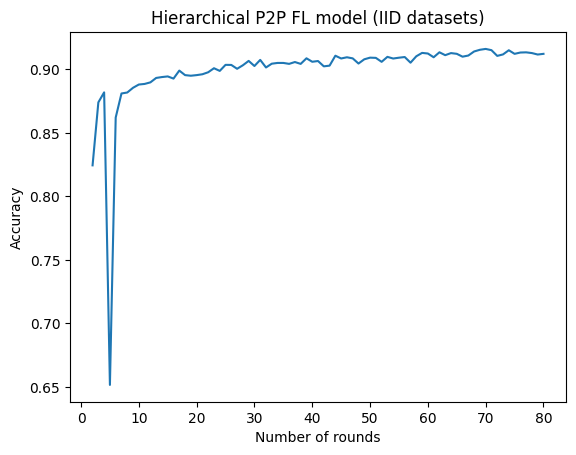

In [553]:
fig = plt.figure()


plt.plot(h_values, IID_hierarchical_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

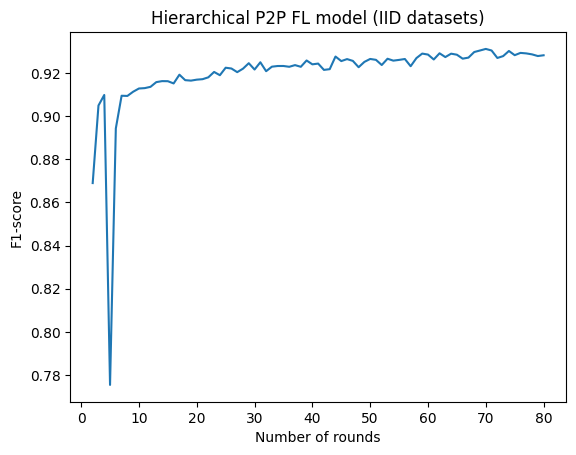

In [554]:
fig = plt.figure()


plt.plot(h_values, IID_hierarchical_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

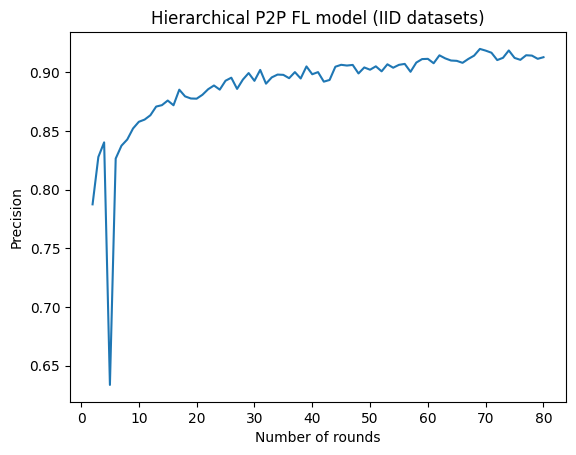

In [555]:
fig = plt.figure()


plt.plot(h_values, IID_hierarchical_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

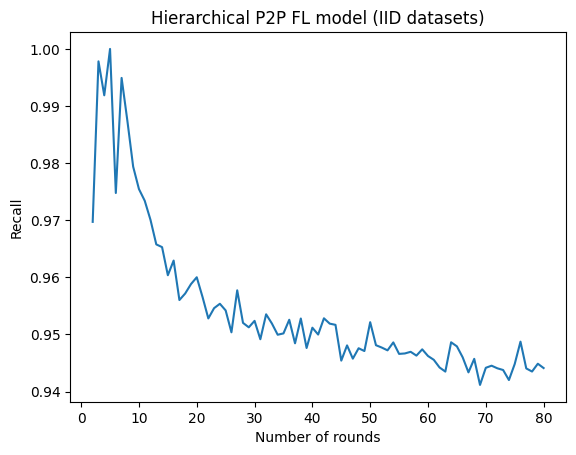

In [556]:
fig = plt.figure()


plt.plot(h_values, IID_hierarchical_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

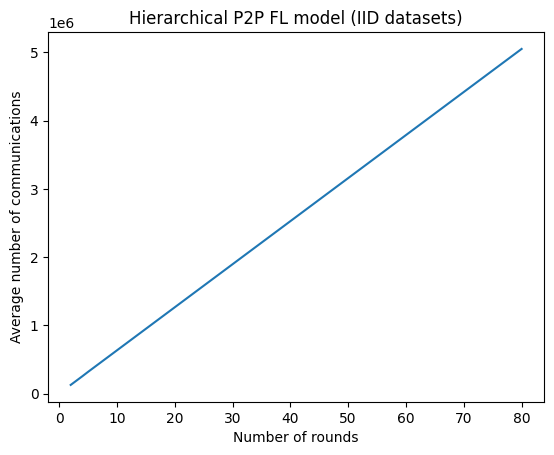

In [557]:
fig = plt.figure()

plt.plot(h_values, IID_hierarchical_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

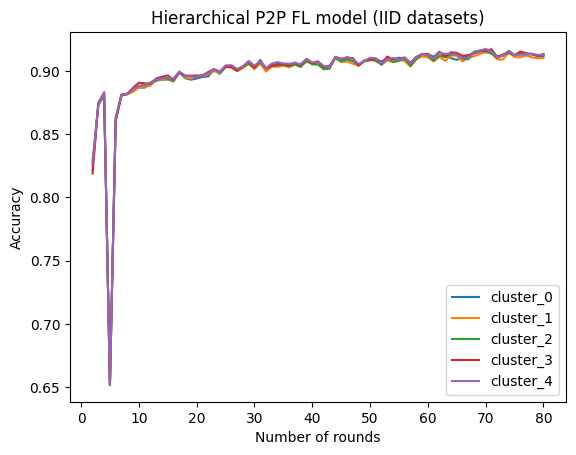

In [558]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, IID_hierarchical_separate_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

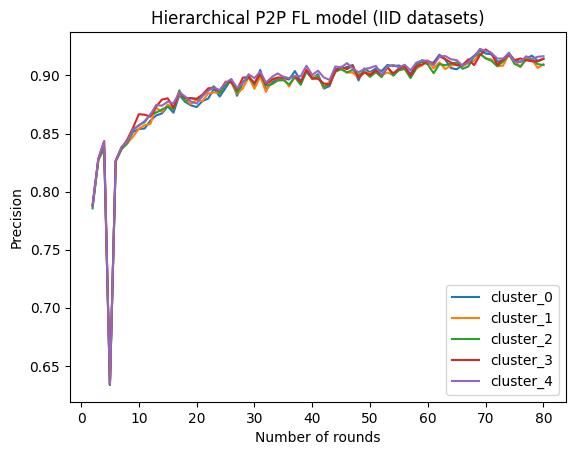

In [559]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, IID_hierarchical_separate_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

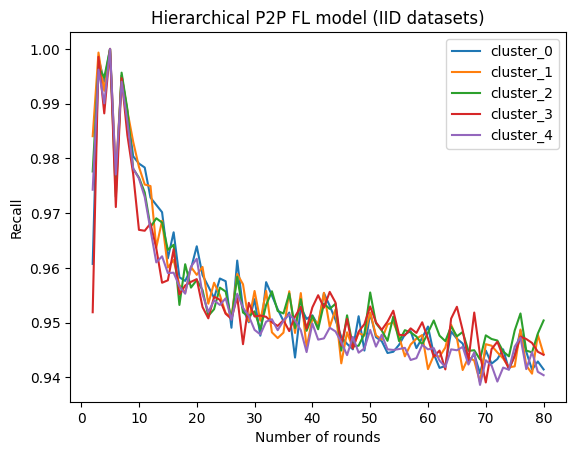

In [560]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, IID_hierarchical_separate_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

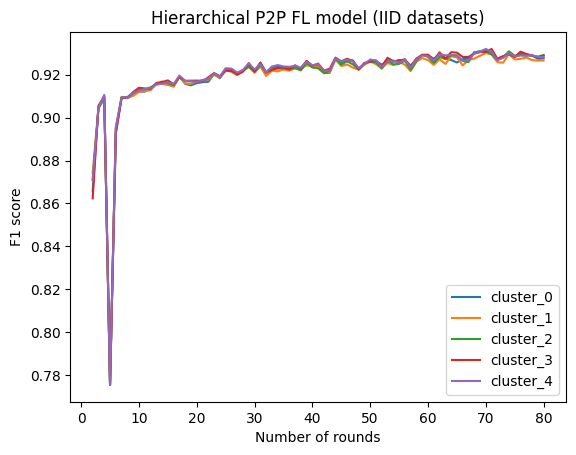

In [561]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, IID_hierarchical_separate_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("Hierarchical P2P FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_hierarchical_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# General

In [806]:
acc_file = open("IID/IID_General_14102022_rounds.pkl", "rb")
IID_general_result1 = pickle.load(acc_file)
acc_file.close()

In [807]:
bcc_file = open("IID/IID_General_01112022_rounds.pkl", "rb")
IID_general_result2 = pickle.load(bcc_file)
bcc_file.close()

In [808]:
ccc_file = open("IID/IID_General_01112022_rounds.pkl", "rb")
IID_general_result3 = pickle.load(ccc_file)
ccc_file.close()

In [809]:
g_values = np.array(IID_general_result1['Number of rounds']).tolist()

In [810]:
############################### Accuracy #################################

In [811]:
# IID_general_result1_accuracy = IID_general_result1['Accuracy'].to_numpy()
# IID_general_result2_accuracy = IID_general_result2['Accuracy'].to_numpy()
# IID_general_result3_accuracy = IID_general_result3['Accuracy'].to_numpy()

In [812]:
IID_general_result1_accuracy = {}
IID_general_result1_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result1_accuracy[model_name] = list()
    for index in range(len(IID_general_result1)):
        IID_general_result1_accuracy[model_name].append(IID_general_result1['Accuracy'][index][model_name])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += IID_general_result1_accuracy[model_name][row]
    IID_general_result1_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [813]:
IID_general_result2_accuracy = {}
IID_general_result2_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result2_accuracy[model_name] = list()
    for index in range(len(IID_general_result2)):
        IID_general_result2_accuracy[model_name].append(IID_general_result2['Accuracy'][index][model_name])        

        
for row in range(len(g_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += IID_general_result2_accuracy[model_name][row]
    IID_general_result2_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [814]:
IID_general_result3_accuracy = {}
IID_general_result3_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result3_accuracy[model_name] = list()
    for index in range(len(IID_general_result3)):
        IID_general_result3_accuracy[model_name].append(IID_general_result3['Accuracy'][index][model_name])        

        
for row in range(len(g_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += IID_general_result3_accuracy[model_name][row]
    IID_general_result3_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [815]:
IID_general_result1_AVG_accuracy = np.asarray(IID_general_result1_AVG_accuracy)
IID_general_result2_AVG_accuracy = np.asarray(IID_general_result2_AVG_accuracy)
IID_general_result3_AVG_accuracy = np.asarray(IID_general_result3_AVG_accuracy)


IID_general_accuracy = IID_general_result1_AVG_accuracy + IID_general_result2_AVG_accuracy + IID_general_result3_AVG_accuracy
IID_general_accuracy = IID_general_accuracy/NUM_FILES

In [816]:
############################### F1-score #################################

In [817]:
# IID_general_result1_f1_score = IID_general_result1['F1_score'].to_numpy()
# IID_general_result2_f1_score = IID_general_result2['F1_score'].to_numpy()
# IID_general_result3_f1_score = IID_general_result3['F1_score'].to_numpy()

In [818]:
IID_general_result1_f1_score = {}
IID_general_result1_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result1_f1_score[model_name] = list()
    for index in range(len(IID_general_result1)):
        IID_general_result1_f1_score[model_name].append(IID_general_result1['F1_score'][index][model_name])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += IID_general_result1_f1_score[model_name][row]
    IID_general_result1_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [819]:
IID_general_result2_f1_score = {}
IID_general_result2_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result2_f1_score[model_name] = list()
    for index in range(len(IID_general_result2)):
        IID_general_result2_f1_score[model_name].append(IID_general_result2['F1_score'][index][model_name])        

        
for row in range(len(g_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += IID_general_result2_f1_score[model_name][row]
    IID_general_result2_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [820]:
IID_general_result3_f1_score = {}
IID_general_result3_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result3_f1_score[model_name] = list()
    for index in range(len(IID_general_result3)):
        IID_general_result3_f1_score[model_name].append(IID_general_result3['F1_score'][index][model_name])        

        
for row in range(len(g_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += IID_general_result3_f1_score[model_name][row]
    IID_general_result3_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [821]:
IID_general_result1_AVG_f1_score = np.asarray(IID_general_result1_AVG_f1_score)
IID_general_result2_AVG_f1_score = np.asarray(IID_general_result2_AVG_f1_score)
IID_general_result3_AVG_f1_score = np.asarray(IID_general_result3_AVG_f1_score)


IID_general_f1_score = IID_general_result1_AVG_f1_score + IID_general_result2_AVG_f1_score + IID_general_result3_AVG_f1_score
IID_general_f1_score = IID_general_f1_score/NUM_FILES

In [822]:
############################### Precision #################################

In [823]:
# IID_general_result1_precision = IID_general_result1['Precision'].to_numpy()
# IID_general_result2_precision = IID_general_result2['Precision'].to_numpy()
# IID_general_result3_precision = IID_general_result3['Precision'].to_numpy()

In [824]:
IID_general_result1_precision = {}
IID_general_result1_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result1_precision[model_name] = list()
    for index in range(len(IID_general_result1)):
        IID_general_result1_precision[model_name].append(IID_general_result1['Precision'][index][model_name])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += IID_general_result1_precision[model_name][row]
    IID_general_result1_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [825]:
IID_general_result2_precision = {}
IID_general_result2_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result2_precision[model_name] = list()
    for index in range(len(IID_general_result2)):
        IID_general_result2_precision[model_name].append(IID_general_result2['Precision'][index][model_name])        

        
for row in range(len(g_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += IID_general_result2_precision[model_name][row]
    IID_general_result2_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [826]:
IID_general_result3_precision = {}
IID_general_result3_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result3_precision[model_name] = list()
    for index in range(len(IID_general_result3)):
        IID_general_result3_precision[model_name].append(IID_general_result3['Precision'][index][model_name])        

        
for row in range(len(g_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += IID_general_result3_precision[model_name][row]
    IID_general_result3_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [827]:
IID_general_result1_AVG_precision = np.asarray(IID_general_result1_AVG_precision)
IID_general_result2_AVG_precision = np.asarray(IID_general_result2_AVG_precision)
IID_general_result3_AVG_precision = np.asarray(IID_general_result3_AVG_precision)


IID_general_precision = IID_general_result1_AVG_precision + IID_general_result2_AVG_precision + IID_general_result3_AVG_precision
IID_general_precision = IID_general_precision/NUM_FILES

In [828]:
############################### Recall #################################

In [829]:
# IID_general_result1_recall = IID_general_result1['Recall'].to_numpy()
# IID_general_result2_recall = IID_general_result2['Recall'].to_numpy()
# IID_general_result3_recall = IID_general_result3['Recall'].to_numpy()

In [830]:
IID_general_result1_recall = {}
IID_general_result1_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result1_recall[model_name] = list()
    for index in range(len(IID_general_result1)):
        IID_general_result1_recall[model_name].append(IID_general_result1['Recall'][index][model_name])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += IID_general_result1_recall[model_name][row]
    IID_general_result1_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [831]:
IID_general_result2_recall = {}
IID_general_result2_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result2_recall[model_name] = list()
    for index in range(len(IID_general_result2)):
        IID_general_result2_recall[model_name].append(IID_general_result2['Recall'][index][model_name])        

        
for row in range(len(g_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += IID_general_result2_recall[model_name][row]
    IID_general_result2_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [832]:
IID_general_result3_recall = {}
IID_general_result3_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_result3_recall[model_name] = list()
    for index in range(len(IID_general_result3)):
        IID_general_result3_recall[model_name].append(IID_general_result3['Recall'][index][model_name])        

        
for row in range(len(g_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += IID_general_result3_recall[model_name][row]
    IID_general_result3_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [833]:
IID_general_result1_AVG_recall = np.asarray(IID_general_result1_AVG_recall)
IID_general_result2_AVG_recall = np.asarray(IID_general_result2_AVG_recall)
IID_general_result3_AVG_recall = np.asarray(IID_general_result3_AVG_recall)


IID_general_recall = IID_general_result1_AVG_recall + IID_general_result2_AVG_recall + IID_general_result3_AVG_recall
IID_general_recall = IID_general_recall/NUM_FILES

In [834]:
############################### Communication #################################

In [835]:
IID_general_comm = {}

IID_general_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    IID_general_comm[model_name] = list()
    for row in range(len(IID_general_result1)):
        IID_general_comm[model_name].append(IID_general_result1['Number of communications'][row][model_name])

        
for row in range(len(g_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += IID_general_comm[model_name][row]
    IID_general_avg_communications.append(sum_communications/NUM_CLIENTS)  

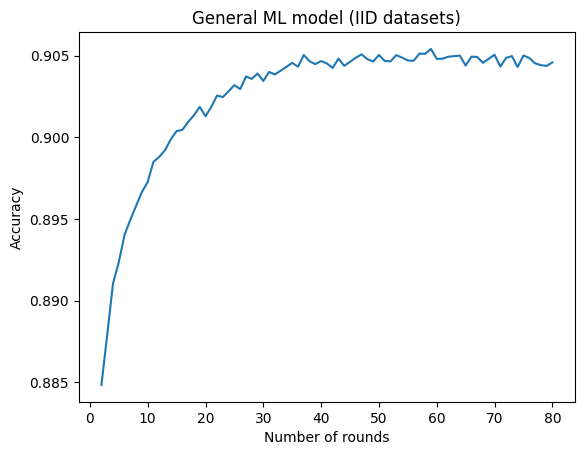

In [836]:
fig = plt.figure()


plt.plot(g_values, IID_general_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("General ML model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_general_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

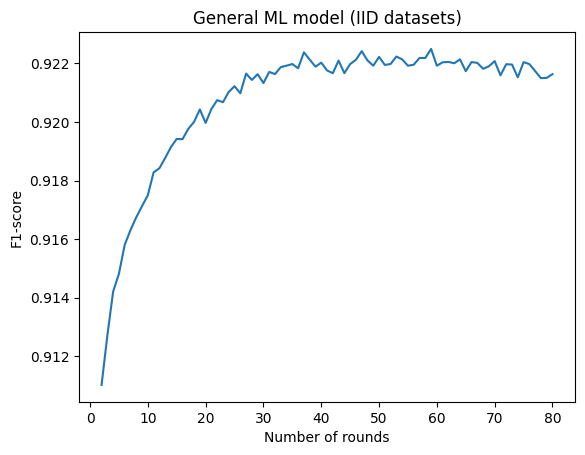

In [837]:
fig = plt.figure()


plt.plot(g_values, IID_general_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("General ML model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_general_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

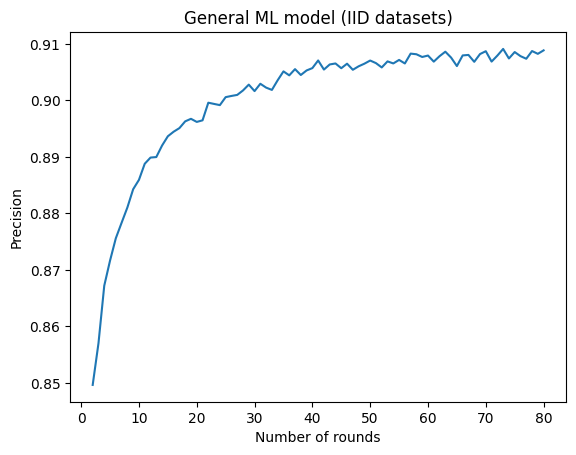

In [838]:
fig = plt.figure()


plt.plot(g_values, IID_general_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("General ML model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_general_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

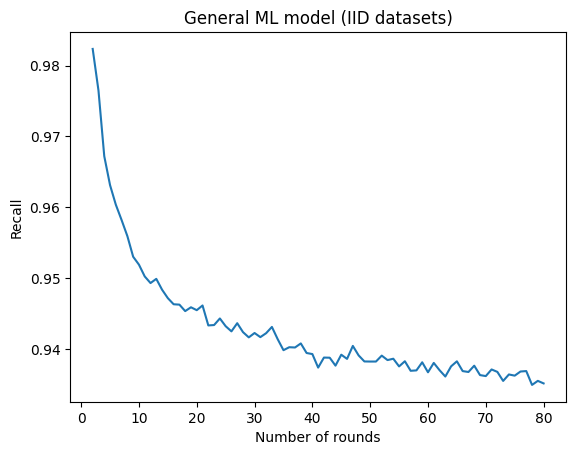

In [839]:
fig = plt.figure()


plt.plot(g_values, IID_general_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("General ML model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_general_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

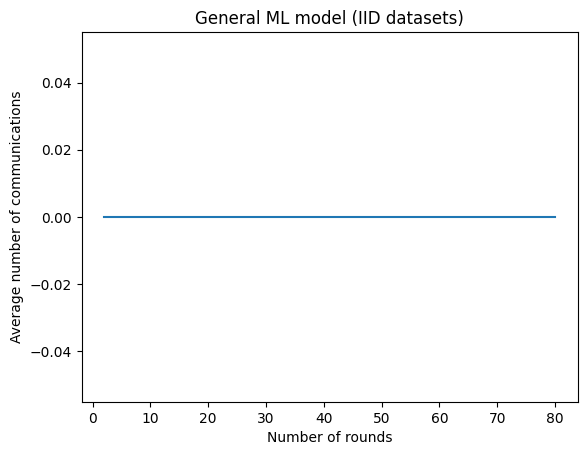

In [840]:
fig = plt.figure()

plt.plot(g_values, IID_general_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("General ML model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_general_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Centralized

In [597]:
acc_file = open("IID/IID_Centralized_14102022_rounds.pkl", "rb")
IID_centralized_result1 = pickle.load(acc_file)
acc_file.close()

In [598]:
bcc_file = open("IID/IID_Centralized_01112022_rounds.pkl", "rb")
IID_centralized_result2 = pickle.load(bcc_file)
bcc_file.close()

In [599]:
ccc_file = open("IID/IID_Centralized_01112022_rounds.pkl", "rb")
IID_centralized_result3 = pickle.load(ccc_file)
ccc_file.close()

In [600]:
m_values = np.array(IID_centralized_result1['Number of rounds']).tolist()

In [601]:
IID_centralized_result1_accuracy = IID_centralized_result1['Accuracy'].to_numpy()
IID_centralized_result2_accuracy = IID_centralized_result2['Accuracy'].to_numpy()
IID_centralized_result3_accuracy = IID_centralized_result3['Accuracy'].to_numpy()

In [602]:
IID_centralized_result1_f1_score = IID_centralized_result1['F1_score'].to_numpy()
IID_centralized_result2_f1_score = IID_centralized_result2['F1_score'].to_numpy()
IID_centralized_result3_f1_score = IID_centralized_result3['F1_score'].to_numpy()

In [603]:
IID_centralized_result1_precision = IID_centralized_result1['Precision'].to_numpy()
IID_centralized_result2_precision = IID_centralized_result2['Precision'].to_numpy()
IID_centralized_result3_precision = IID_centralized_result3['Precision'].to_numpy()

In [604]:
IID_centralized_result1_recall = IID_centralized_result1['Recall'].to_numpy()
IID_centralized_result2_recall = IID_centralized_result2['Recall'].to_numpy()
IID_centralized_result3_recall = IID_centralized_result3['Recall'].to_numpy()

In [605]:
IID_centralized_accuracy = IID_centralized_result1_accuracy + IID_centralized_result2_accuracy + IID_centralized_result3_accuracy
IID_centralized_accuracy = IID_centralized_accuracy/NUM_FILES

In [606]:
IID_centralized_f1_score = IID_centralized_result1_f1_score + IID_centralized_result2_f1_score + IID_centralized_result3_f1_score
IID_centralized_f1_score = IID_centralized_f1_score/NUM_FILES

In [607]:
IID_centralized_precision = IID_centralized_result1_precision + IID_centralized_result2_precision + IID_centralized_result3_precision
IID_centralized_precision = IID_centralized_precision/NUM_FILES

In [608]:
IID_centralized_recall = IID_centralized_result1_recall + IID_centralized_result2_recall + IID_centralized_result3_recall
IID_centralized_recall = IID_centralized_recall/NUM_FILES

In [609]:
IID_centralized_comm = {}

IID_centralized_avg_communications = []


for index in range(len(centralized_model_list)):
    model_name = centralized_model_list[index]
    IID_centralized_comm[model_name] = list()
    for row in range(len(IID_centralized_result1)):
        IID_centralized_comm[model_name].append(IID_centralized_result1['Number of communications'][row][model_name])

        
for row in range(len(m_values)):
    sum_communications = 0
    for index in range(len(centralized_model_list)):
        model_name = centralized_model_list[index]
        sum_communications += IID_centralized_comm[model_name][row]
    IID_centralized_avg_communications.append(sum_communications/NUM_CLIENTS)  

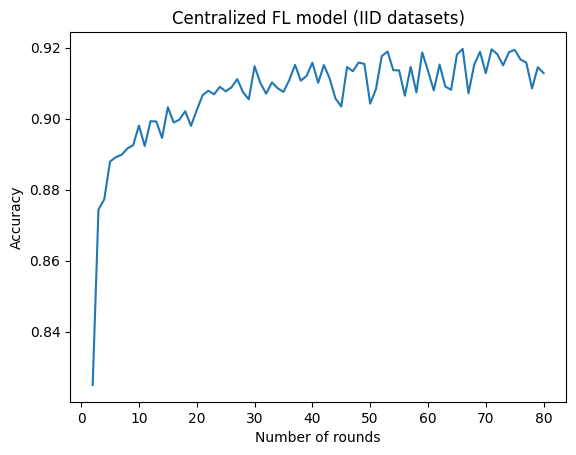

In [610]:
fig = plt.figure()


plt.plot(m_values, IID_centralized_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_centralized_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

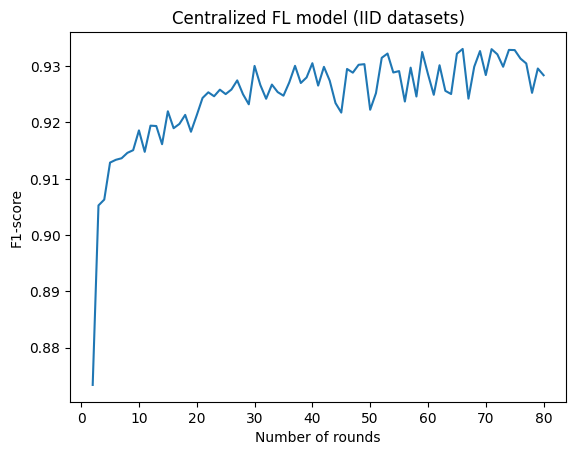

In [611]:
fig = plt.figure()


plt.plot(m_values, IID_centralized_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_centralized_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

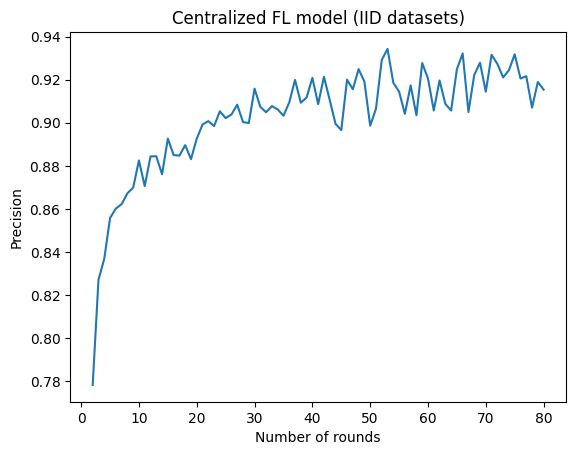

In [612]:
fig = plt.figure()


plt.plot(m_values, IID_centralized_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_centralized_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

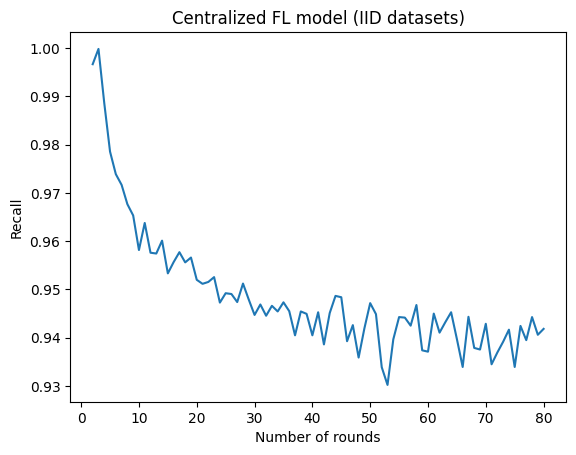

In [613]:
fig = plt.figure()


plt.plot(m_values, IID_centralized_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "IID/plots/IID_centralized_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

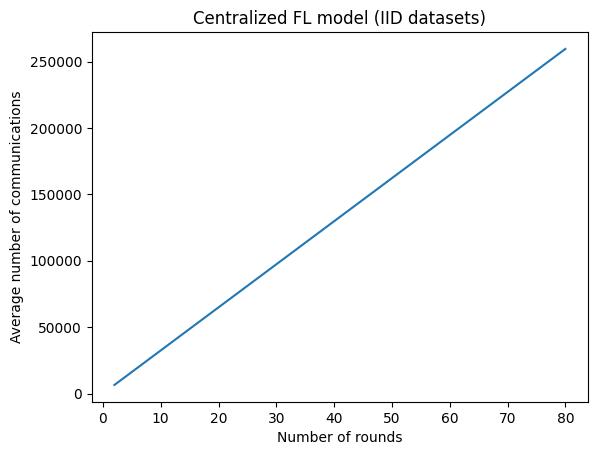

In [614]:
fig = plt.figure()

plt.plot(m_values, IID_centralized_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Centralized FL model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_centralized_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Homomorphic encryption

In [ ]:
acc_file = open("IID/IID_Homomorphic_33102022_rounds.pkl", "rb")
homomorphic_result = pickle.load(acc_file)
acc_file.close()

In [ ]:
homomorphic_result

In [ ]:
# homomorphic_result['Number of communications'][0]

In [ ]:
e_rounds = np.array(homomorphic_result['Number of rounds']).tolist()
# print(e_rounds)

In [ ]:
## For combine plotting
IID_homomorphic_accuracy = np.array(homomorphic_result['Accuracy']).tolist()

In [ ]:
homomorphic_accuracy_fig = homomorphic_result.plot(x='Number of rounds', y='Accuracy', title='P2P Homomorphic model (IID datasets)').get_figure()

# acc_fig.set(xlabel='Number of rounds', ylabel='Accuracy')

# saving the figure
fig_name = "IID/plots/IID_Homomorphic_accuracy_vs_total_rounds_" + str(current_date) + ".png"



# acc_fig.ylabel("Accuracy")
# acc_fig.title("Accuracy of the Model")

homomorphic_accuracy_fig.patch.set_facecolor('xkcd:white')
homomorphic_accuracy_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_precision_fig = homomorphic_result.plot(x='Number of rounds', y='Precision', title='P2P Homomorphic model (IID datasets)').get_figure()


# saving the figure
fig_name = "IID/plots/IID_Homomorphic_precision_vs_total_rounds_" + str(current_date) + ".png"


homomorphic_precision_fig.patch.set_facecolor('xkcd:white')
homomorphic_precision_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
homomorphic_recall_fig = homomorphic_result.plot(x='Number of rounds', y='Recall', title='P2P Homomorphic model (IID datasets)').get_figure()



# saving the figure
fig_name = "IID/plots/IID_Homomorphic_recall_vs_total_rounds_" + str(current_date) + ".png"



homomorphic_recall_fig.patch.set_facecolor('xkcd:white')
homomorphic_recall_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_f1_fig = homomorphic_result.plot(x='Number of rounds', y="F1 score", title='P2P Homomorphic model (IID datasets)').get_figure()

# # saving the figure
# fig_name = "IID/plots/Homomorphic_f1_score_vs_total_rounds_" + str(current_date) + ".png"



# homomorphic_f1_fig.patch.set_facecolor('xkcd:white')
# homomorphic_f1_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result.iloc[:,11]

In [ ]:
homomorphic_f1_score = homomorphic_result.iloc[:,11].to_list()

In [ ]:
fig = plt.figure()
plt.plot(e_rounds, homomorphic_f1_score)

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("P2P Homomorphic model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# saving the figure
fig_name = "IID/plots/IID_Homomorphic_f1_score_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
## For combine plotting
IID_homomorphic_f1_score = copy.deepcopy(homomorphic_f1_score)

In [ ]:
homomorphic_time_fig = homomorphic_result.plot(x='Number of rounds', y='Training Time', title='P2P Homomorphic model (IID datasets)').get_figure()

# saving the figure
fig_name = "IID/plots/IID_Homomorphic_training_time_vs_total_rounds_" + str(current_date) + ".png"

homomorphic_time_fig.patch.set_facecolor('xkcd:white')
homomorphic_time_fig.savefig(fig_name,dpi = 150, bbox_inches="tight")

In [ ]:
# homomorphic_result['Number of communications']

In [ ]:
e_comm = {}



for index in range(len(model_list)):
    model_name = "model_" + str(index)
    e_comm[model_name] = list()
    for row in range(len(homomorphic_result)):
        e_comm[model_name].append(homomorphic_result['Number of communications'][row][model_name])
    

In [ ]:
# #### loss_plt = {}

# fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)


# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Number of rounds")
# plt.ylabel("Number of communications")
# plt.title("P2P Homomorphic model (IID datasets)")
  
# # Adding legend, which helps us recognize the curve according to it's color
# # plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# # To load the display window
# plt.show()


# # saving the figure
# fig_name = "IID/plots/IID_Homomorphic_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:

fig = plt.figure()

# for index in range(len(model_list)):
#     model_name = "model_" + str(index)
#     plt.plot(e_rounds, e_comm[model_name], label=model_name)

avg_communications = []

for row in range(len(e_rounds)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += e_comm[model_name][row]
    avg_communications.append(sum_communications/NUM_CLIENTS)    

plt.plot(e_rounds, avg_communications)




# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("P2P Homomorphic model (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_Homomorphic_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
# avg_communications

# Non-IID datasets

# TargentEnc

In [615]:
acc_file = open("non_IID/non_IID_TargetEnc_14102022_rounds.pkl", "rb")
non_IID_target_result1 = pickle.load(acc_file)
acc_file.close()

In [616]:
bcc_file = open("non_IID/non_IID_TargetEnc_01112022_rounds.pkl", "rb")
non_IID_target_result2 = pickle.load(bcc_file)
bcc_file.close()

In [617]:
ccc_file = open("non_IID/non_IID_TargetEnc_01112022_rounds.pkl", "rb")
non_IID_target_result3 = pickle.load(ccc_file)
ccc_file.close()

In [618]:
t_values = np.array(non_IID_target_result1['Number of rounds']).tolist()

In [619]:
non_IID_target_result1_accuracy = non_IID_target_result1['Accuracy'].to_numpy()
non_IID_target_result2_accuracy = non_IID_target_result2['Accuracy'].to_numpy()
non_IID_target_result3_accuracy = non_IID_target_result3['Accuracy'].to_numpy()

In [620]:
non_IID_target_result1_f1_score = non_IID_target_result1['F1_score'].to_numpy()
non_IID_target_result2_f1_score = non_IID_target_result2['F1_score'].to_numpy()
non_IID_target_result3_f1_score = non_IID_target_result3['F1_score'].to_numpy()

In [621]:
non_IID_target_result1_precision = non_IID_target_result1['Precision'].to_numpy()
non_IID_target_result2_precision = non_IID_target_result2['Precision'].to_numpy()
non_IID_target_result3_precision = non_IID_target_result3['Precision'].to_numpy()

In [622]:
non_IID_target_result1_recall = non_IID_target_result1['Recall'].to_numpy()
non_IID_target_result2_recall = non_IID_target_result2['Recall'].to_numpy()
non_IID_target_result3_recall = non_IID_target_result3['Recall'].to_numpy()

In [623]:
non_IID_target_accuracy = non_IID_target_result1_accuracy + non_IID_target_result2_accuracy + non_IID_target_result3_accuracy
non_IID_target_accuracy = non_IID_target_accuracy/NUM_FILES

In [624]:
non_IID_target_f1_score = non_IID_target_result1_f1_score + non_IID_target_result2_f1_score + non_IID_target_result3_f1_score
non_IID_target_f1_score = non_IID_target_f1_score/NUM_FILES

In [625]:
non_IID_target_precision = non_IID_target_result1_precision + non_IID_target_result2_precision + non_IID_target_result3_precision
non_IID_target_precision = non_IID_target_precision/NUM_FILES

In [626]:
non_IID_target_recall = non_IID_target_result1_recall + non_IID_target_result2_recall + non_IID_target_result3_recall
non_IID_target_recall = non_IID_target_recall/NUM_FILES

In [627]:
non_IID_target_comm = {}

non_IID_target_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_target_comm[model_name] = list()
    for row in range(len(non_IID_target_result1)):
        non_IID_target_comm[model_name].append(non_IID_target_result1['Number of communications'][row][model_name])

        
for row in range(len(t_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += non_IID_target_comm[model_name][row]
    non_IID_target_avg_communications.append(sum_communications/NUM_CLIENTS)  

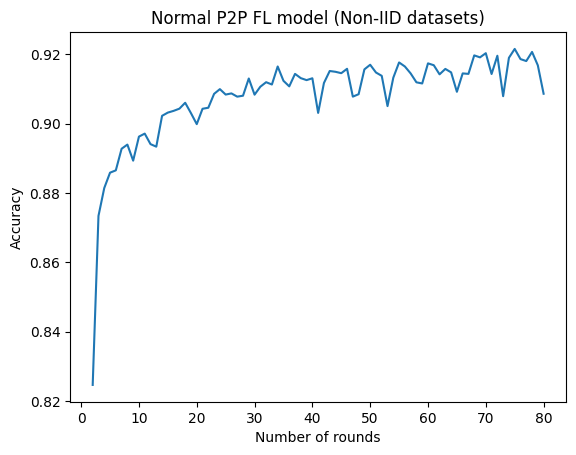

In [628]:
fig = plt.figure()


plt.plot(t_values, non_IID_target_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Normal P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_targetEnc_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

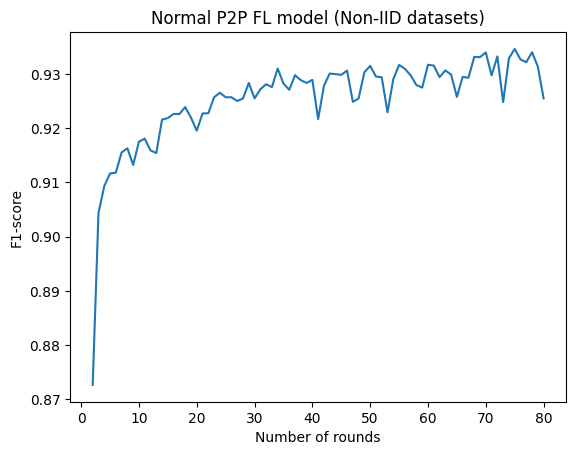

In [629]:
fig = plt.figure()


plt.plot(t_values, non_IID_target_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Normal P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_targetEnc_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

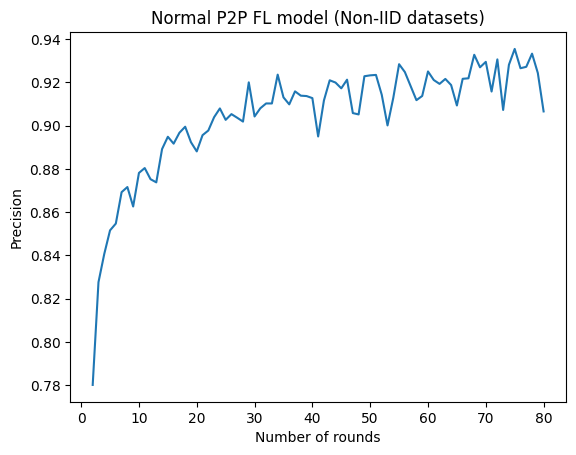

In [630]:
fig = plt.figure()


plt.plot(t_values, non_IID_target_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Normal P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_targetEnc_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

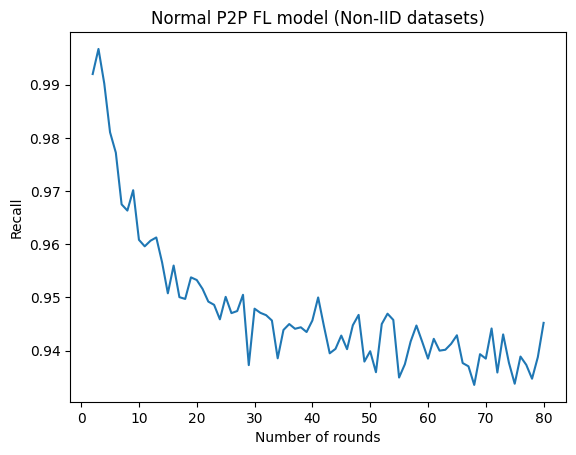

In [631]:
fig = plt.figure()


plt.plot(t_values, non_IID_target_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Normal P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_trgetEnc_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

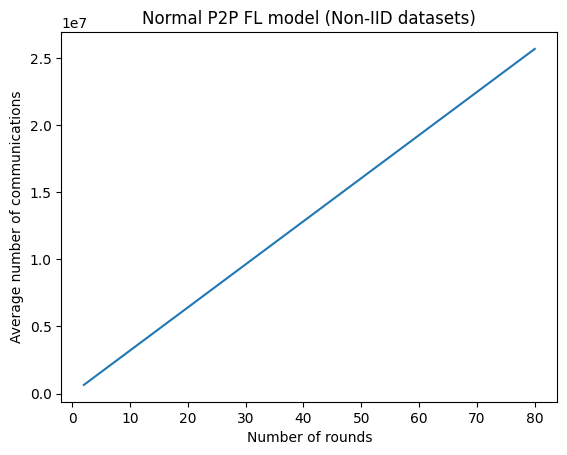

In [632]:
fig = plt.figure()

plt.plot(t_values, non_IID_target_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Normal P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_targetEnc_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Clustered

In [633]:
acc_file = open("non_IID/non_IID_Clustered_14102022_rounds.pkl", "rb")
non_IID_clustered_result1 = pickle.load(acc_file)
acc_file.close()

In [634]:
bcc_file = open("non_IID/non_IID_Clustered_01112022_rounds.pkl", "rb")
non_IID_clustered_result2 = pickle.load(bcc_file)
bcc_file.close()

In [635]:
ccc_file = open("non_IID/non_IID_Clustered_01112022_rounds.pkl", "rb")
non_IID_clustered_result3 = pickle.load(ccc_file)
ccc_file.close()

In [636]:
c_values = np.array(non_IID_clustered_result1['Number of rounds']).tolist()

In [637]:
############################### Accuracy #################################

In [638]:
# non_IID_clustered_result1_accuracy = non_IID_clustered_result1['Accuracy'].to_numpy()
# non_IID_clustered_result2_accuracy = non_IID_clustered_result2['Accuracy'].to_numpy()
# non_IID_clustered_result3_accuracy = non_IID_clustered_result3['Accuracy'].to_numpy()

In [639]:


non_IID_clustered_result1_accuracy = {}
non_IID_clustered_result1_AVG_accuracy = []

for cluster in cluster_list:
    non_IID_clustered_result1_accuracy[cluster] = list()
    for index in range(len(non_IID_clustered_result1)):
        non_IID_clustered_result1_accuracy[cluster].append(non_IID_clustered_result1['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += non_IID_clustered_result1_accuracy[cluster_name][row]
    non_IID_clustered_result1_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)   


In [640]:
non_IID_clustered_result2_accuracy = {}
non_IID_clustered_result2_AVG_accuracy = []

for cluster in cluster_list:
    non_IID_clustered_result2_accuracy[cluster] = list()
    for index in range(len(non_IID_clustered_result2)):
        non_IID_clustered_result2_accuracy[cluster].append(non_IID_clustered_result2['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += non_IID_clustered_result2_accuracy[cluster_name][row]
    non_IID_clustered_result2_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [641]:
non_IID_clustered_result3_accuracy = {}
non_IID_clustered_result3_AVG_accuracy = []

for cluster in cluster_list:
    non_IID_clustered_result3_accuracy[cluster] = list()
    for index in range(len(non_IID_clustered_result3)):
        non_IID_clustered_result3_accuracy[cluster].append(non_IID_clustered_result3['Accuracy'][index][cluster])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += non_IID_clustered_result3_accuracy[cluster_name][row]
    non_IID_clustered_result3_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [642]:
non_IID_clustered_separate_accuracy = {}
for cluster in cluster_list:
    non_IID_clustered_separate_accuracy[cluster] = np.zeros(len(c_values))
    non_IID_clustered_separate_accuracy[cluster] = np.asarray(non_IID_clustered_result1_accuracy[cluster]) + np.asarray(non_IID_clustered_result2_accuracy[cluster]) + np.asarray(non_IID_clustered_result3_accuracy[cluster])
    non_IID_clustered_separate_accuracy[cluster] = non_IID_clustered_separate_accuracy[cluster]/NUM_FILES

In [643]:
non_IID_clustered_result1_AVG_accuracy = np.asarray(non_IID_clustered_result1_AVG_accuracy)
non_IID_clustered_result2_AVG_accuracy = np.asarray(non_IID_clustered_result2_AVG_accuracy)
non_IID_clustered_result3_AVG_accuracy = np.asarray(non_IID_clustered_result3_AVG_accuracy)


non_IID_clustered_accuracy = non_IID_clustered_result1_AVG_accuracy + non_IID_clustered_result2_AVG_accuracy + non_IID_clustered_result3_AVG_accuracy
non_IID_clustered_accuracy = non_IID_clustered_accuracy/NUM_FILES

In [644]:
############################### F1-score #################################

In [645]:
# non_IID_clustered_result1_f1_score = non_IID_clustered_result1['F1_score'].to_numpy()
# non_IID_clustered_result2_f1_score = non_IID_clustered_result2['F1_score'].to_numpy()
# non_IID_clustered_result3_f1_score = non_IID_clustered_result3['F1_score'].to_numpy()

In [646]:

non_IID_clustered_result1_f1_score = {}
non_IID_clustered_result1_AVG_f1_score = []

for cluster in cluster_list:
    non_IID_clustered_result1_f1_score[cluster] = list()
    for index in range(len(non_IID_clustered_result1)):
        non_IID_clustered_result1_f1_score[cluster].append(non_IID_clustered_result1['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += non_IID_clustered_result1_f1_score[cluster_name][row]
    non_IID_clustered_result1_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)   


In [647]:
non_IID_clustered_result2_f1_score = {}
non_IID_clustered_result2_AVG_f1_score = []

for cluster in cluster_list:
    non_IID_clustered_result2_f1_score[cluster] = list()
    for index in range(len(non_IID_clustered_result2)):
        non_IID_clustered_result2_f1_score[cluster].append(non_IID_clustered_result2['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += non_IID_clustered_result2_f1_score[cluster_name][row]
    non_IID_clustered_result2_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [648]:
non_IID_clustered_result3_f1_score = {}
non_IID_clustered_result3_AVG_f1_score = []

for cluster in cluster_list:
    non_IID_clustered_result3_f1_score[cluster] = list()
    for index in range(len(non_IID_clustered_result3)):
        non_IID_clustered_result3_f1_score[cluster].append(non_IID_clustered_result3['F1_score'][index][cluster])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += non_IID_clustered_result3_f1_score[cluster_name][row]
    non_IID_clustered_result3_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [649]:
non_IID_clustered_separate_f1_score = {}
for cluster in cluster_list:
    non_IID_clustered_separate_f1_score[cluster] = np.zeros(len(c_values))
    non_IID_clustered_separate_f1_score[cluster] = np.asarray(non_IID_clustered_result1_f1_score[cluster]) + np.asarray(non_IID_clustered_result2_f1_score[cluster]) + np.asarray(non_IID_clustered_result3_f1_score[cluster])
    non_IID_clustered_separate_f1_score[cluster] = non_IID_clustered_separate_f1_score[cluster]/NUM_FILES

In [650]:
non_IID_clustered_result1_AVG_f1_score = np.asarray(non_IID_clustered_result1_AVG_f1_score)
non_IID_clustered_result2_AVG_f1_score = np.asarray(non_IID_clustered_result2_AVG_f1_score)
non_IID_clustered_result3_AVG_f1_score = np.asarray(non_IID_clustered_result3_AVG_f1_score)


non_IID_clustered_f1_score = non_IID_clustered_result1_AVG_f1_score + non_IID_clustered_result2_AVG_f1_score + non_IID_clustered_result3_AVG_f1_score
non_IID_clustered_f1_score = non_IID_clustered_f1_score/NUM_FILES

In [651]:
############################### Precision #################################

In [652]:
# non_IID_clustered_result1_precision = non_IID_clustered_result1['Precision'].to_numpy()
# non_IID_clustered_result2_precision = non_IID_clustered_result2['Precision'].to_numpy()
# non_IID_clustered_result3_precision = non_IID_clustered_result3['Precision'].to_numpy()

In [653]:

non_IID_clustered_result1_precision = {}
non_IID_clustered_result1_AVG_precision = []

for cluster in cluster_list:
    non_IID_clustered_result1_precision[cluster] = list()
    for index in range(len(non_IID_clustered_result1)):
        non_IID_clustered_result1_precision[cluster].append(non_IID_clustered_result1['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += non_IID_clustered_result1_precision[cluster_name][row]
    non_IID_clustered_result1_AVG_precision.append(sum_precision/NUM_CLUSTERS)   


In [654]:
non_IID_clustered_result2_precision = {}
non_IID_clustered_result2_AVG_precision = []

for cluster in cluster_list:
    non_IID_clustered_result2_precision[cluster] = list()
    for index in range(len(non_IID_clustered_result2)):
        non_IID_clustered_result2_precision[cluster].append(non_IID_clustered_result2['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += non_IID_clustered_result2_precision[cluster_name][row]
    non_IID_clustered_result2_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [655]:
non_IID_clustered_result3_precision = {}
non_IID_clustered_result3_AVG_precision = []

for cluster in cluster_list:
    non_IID_clustered_result3_precision[cluster] = list()
    for index in range(len(non_IID_clustered_result3)):
        non_IID_clustered_result3_precision[cluster].append(non_IID_clustered_result3['Precision'][index][cluster])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += non_IID_clustered_result3_precision[cluster_name][row]
    non_IID_clustered_result3_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [656]:
non_IID_clustered_separate_precision = {}
for cluster in cluster_list:
    non_IID_clustered_separate_precision[cluster] = np.zeros(len(c_values))
    non_IID_clustered_separate_precision[cluster] = np.asarray(non_IID_clustered_result1_precision[cluster]) + np.asarray(non_IID_clustered_result2_precision[cluster]) + np.asarray(non_IID_clustered_result3_precision[cluster])
    non_IID_clustered_separate_precision[cluster] = non_IID_clustered_separate_precision[cluster]/NUM_FILES

In [657]:
non_IID_clustered_result1_AVG_precision = np.asarray(non_IID_clustered_result1_AVG_precision)
non_IID_clustered_result2_AVG_precision = np.asarray(non_IID_clustered_result2_AVG_precision)
non_IID_clustered_result3_AVG_precision = np.asarray(non_IID_clustered_result3_AVG_precision)


non_IID_clustered_precision = non_IID_clustered_result1_AVG_precision + non_IID_clustered_result2_AVG_precision + non_IID_clustered_result3_AVG_precision
non_IID_clustered_precision = non_IID_clustered_precision/NUM_FILES

In [658]:
############################### Recall #################################

In [659]:
# non_IID_clustered_result1_recall = non_IID_clustered_result1['Recall'].to_numpy()
# non_IID_clustered_result2_recall = non_IID_clustered_result2['Recall'].to_numpy()
# non_IID_clustered_result3_recall = non_IID_clustered_result3['Recall'].to_numpy()

In [660]:

non_IID_clustered_result1_recall = {}
non_IID_clustered_result1_AVG_recall = []

for cluster in cluster_list:
    non_IID_clustered_result1_recall[cluster] = list()
    for index in range(len(non_IID_clustered_result1)):
        non_IID_clustered_result1_recall[cluster].append(non_IID_clustered_result1['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += non_IID_clustered_result1_recall[cluster_name][row]
    non_IID_clustered_result1_AVG_recall.append(sum_recall/NUM_CLUSTERS)   


In [661]:
non_IID_clustered_result2_recall = {}
non_IID_clustered_result2_AVG_recall = []

for cluster in cluster_list:
    non_IID_clustered_result2_recall[cluster] = list()
    for index in range(len(non_IID_clustered_result2)):
        non_IID_clustered_result2_recall[cluster].append(non_IID_clustered_result2['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += non_IID_clustered_result2_recall[cluster_name][row]
    non_IID_clustered_result2_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [662]:
non_IID_clustered_result3_recall = {}
non_IID_clustered_result3_AVG_recall = []

for cluster in cluster_list:
    non_IID_clustered_result3_recall[cluster] = list()
    for index in range(len(non_IID_clustered_result3)):
        non_IID_clustered_result3_recall[cluster].append(non_IID_clustered_result3['Recall'][index][cluster])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += non_IID_clustered_result3_recall[cluster_name][row]
    non_IID_clustered_result3_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [663]:
non_IID_clustered_separate_recall = {}
for cluster in cluster_list:
    non_IID_clustered_separate_recall[cluster] = np.zeros(len(c_values))
    non_IID_clustered_separate_recall[cluster] = np.asarray(non_IID_clustered_result1_recall[cluster]) + np.asarray(non_IID_clustered_result2_recall[cluster]) + np.asarray(non_IID_clustered_result3_recall[cluster])
    non_IID_clustered_separate_recall[cluster] = non_IID_clustered_separate_recall[cluster]/NUM_FILES

In [664]:
non_IID_clustered_result1_AVG_recall = np.asarray(non_IID_clustered_result1_AVG_recall)
non_IID_clustered_result2_AVG_recall = np.asarray(non_IID_clustered_result2_AVG_recall)
non_IID_clustered_result3_AVG_recall = np.asarray(non_IID_clustered_result3_AVG_recall)


non_IID_clustered_recall = non_IID_clustered_result1_AVG_recall + non_IID_clustered_result2_AVG_recall + non_IID_clustered_result3_AVG_recall
non_IID_clustered_recall = non_IID_clustered_recall/NUM_FILES

In [665]:
############################### Communication #################################

In [666]:
non_IID_clustered_comm = {}

non_IID_clustered_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_clustered_comm[model_name] = list()
    for row in range(len(non_IID_clustered_result1)):
        non_IID_clustered_comm[model_name].append(non_IID_clustered_result1['Number of communications'][row][model_name])

        
for row in range(len(c_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += non_IID_clustered_comm[model_name][row]
    non_IID_clustered_avg_communications.append(sum_communications/NUM_CLIENTS)  

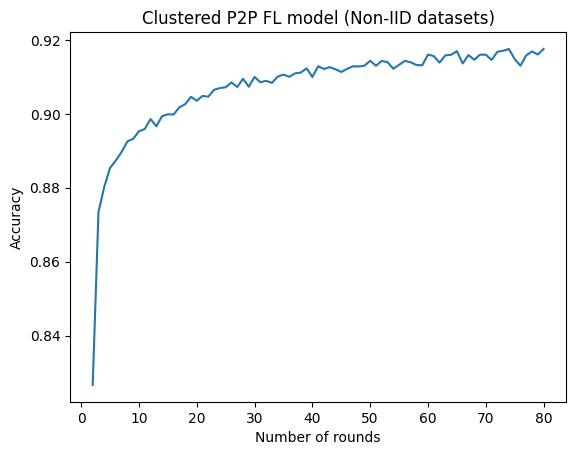

In [667]:
fig = plt.figure()


plt.plot(c_values, non_IID_clustered_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

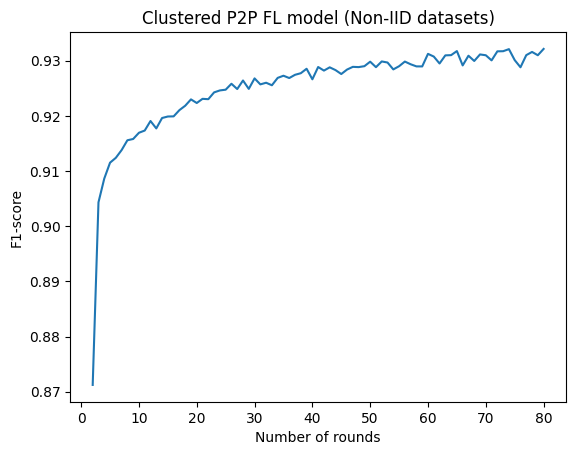

In [668]:
fig = plt.figure()


plt.plot(c_values, non_IID_clustered_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

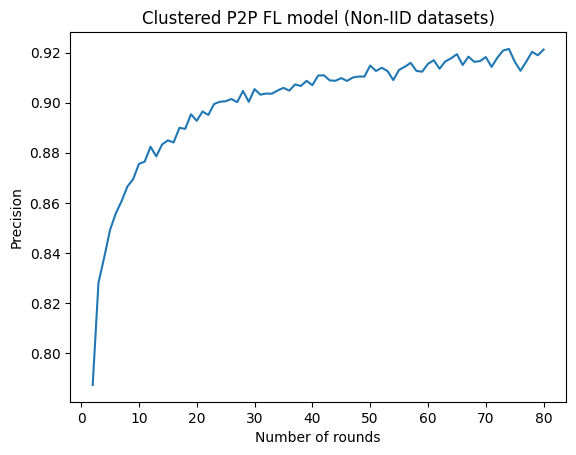

In [669]:
fig = plt.figure()


plt.plot(c_values, non_IID_clustered_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

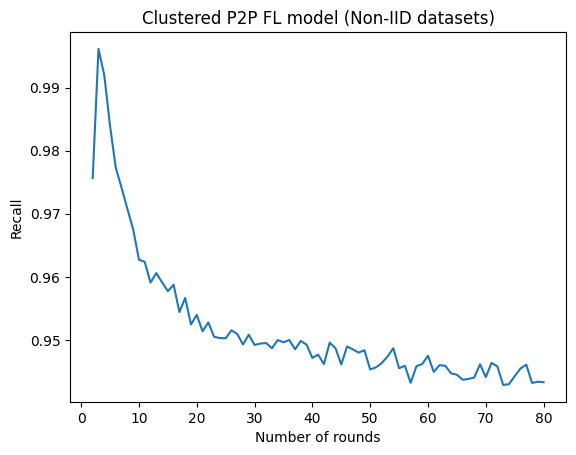

In [670]:
fig = plt.figure()


plt.plot(c_values, non_IID_clustered_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

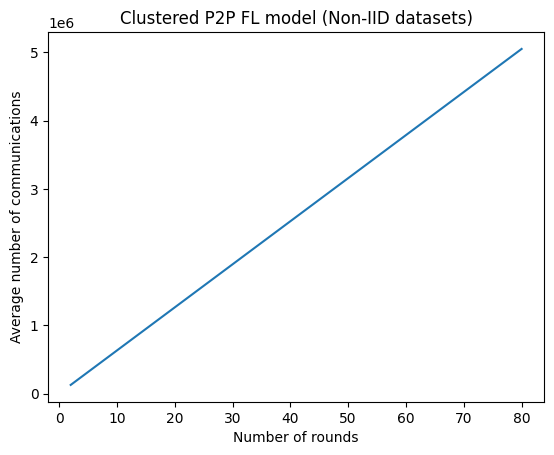

In [671]:
fig = plt.figure()

plt.plot(c_values, non_IID_clustered_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

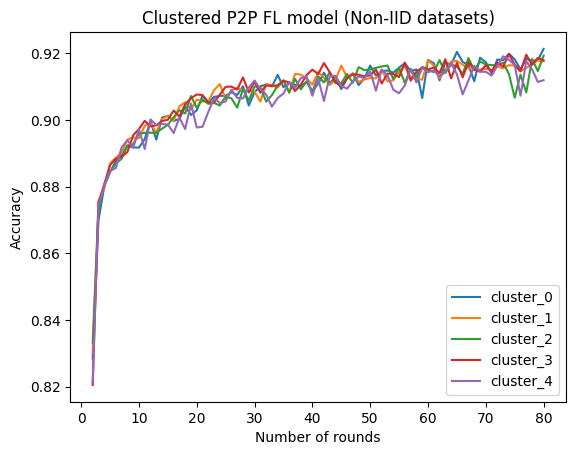

In [672]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, non_IID_clustered_separate_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

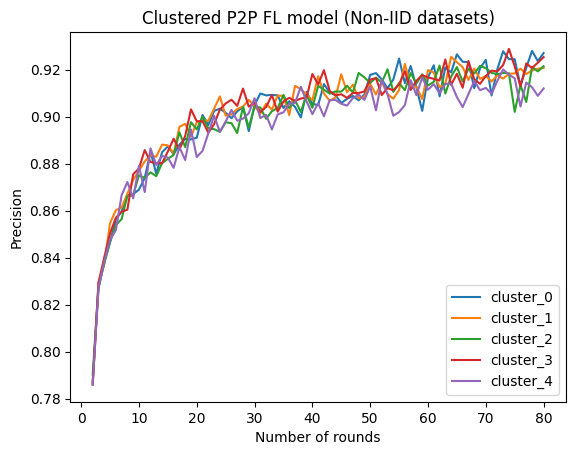

In [673]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, non_IID_clustered_separate_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

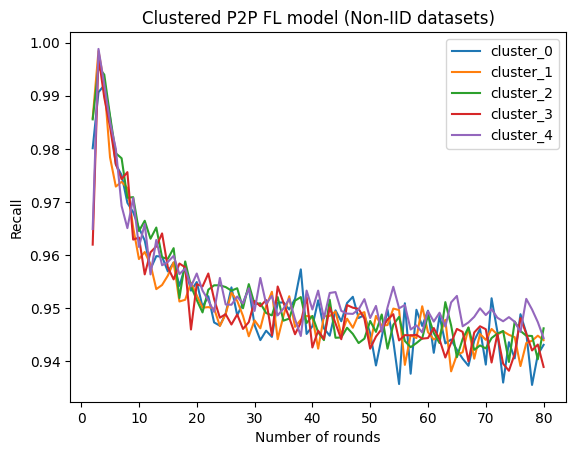

In [674]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, non_IID_clustered_separate_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

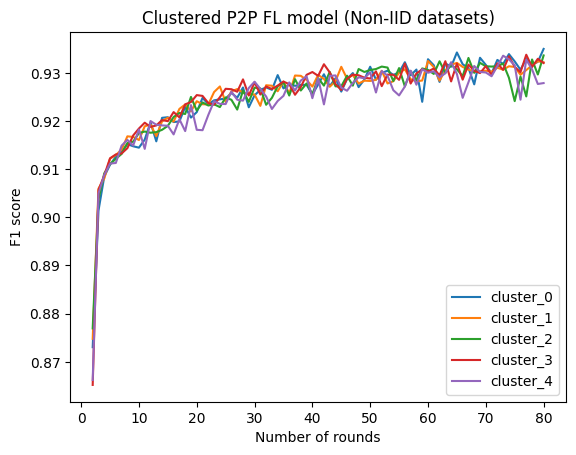

In [675]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(c_values, non_IID_clustered_separate_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("Clustered P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_clustered_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Hierarchical

In [676]:
acc_file = open("non_IID/non_IID_Hierarchical_14102022_rounds.pkl", "rb")
non_IID_hierarchical_result1 = pickle.load(acc_file)
acc_file.close()

In [677]:
bcc_file = open("non_IID/non_IID_Hierarchical_01112022_rounds.pkl", "rb")
non_IID_hierarchical_result2 = pickle.load(bcc_file)
bcc_file.close()

In [678]:
ccc_file = open("non_IID/non_IID_Hierarchical_01112022_rounds.pkl", "rb")
non_IID_hierarchical_result3 = pickle.load(ccc_file)
ccc_file.close()

In [679]:
h_values = np.array(non_IID_hierarchical_result1['Number of rounds']).tolist()

In [680]:
############################### Accuracy #################################

In [681]:
# non_IID_hierarchical_result1_accuracy = non_IID_hierarchical_result1['Accuracy'].to_numpy()
# non_IID_hierarchical_result2_accuracy = non_IID_hierarchical_result2['Accuracy'].to_numpy()
# non_IID_hierarchical_result3_accuracy = non_IID_hierarchical_result3['Accuracy'].to_numpy()

In [682]:


non_IID_hierarchical_result1_accuracy = {}
non_IID_hierarchical_result1_AVG_accuracy = []

for cluster in cluster_list:
    non_IID_hierarchical_result1_accuracy[cluster] = list()
    for index in range(len(non_IID_hierarchical_result1)):
        non_IID_hierarchical_result1_accuracy[cluster].append(non_IID_hierarchical_result1['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += non_IID_hierarchical_result1_accuracy[cluster_name][row]
    non_IID_hierarchical_result1_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)   


In [683]:
non_IID_hierarchical_result2_accuracy = {}
non_IID_hierarchical_result2_AVG_accuracy = []

for cluster in cluster_list:
    non_IID_hierarchical_result2_accuracy[cluster] = list()
    for index in range(len(non_IID_hierarchical_result2)):
        non_IID_hierarchical_result2_accuracy[cluster].append(non_IID_hierarchical_result2['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += non_IID_hierarchical_result2_accuracy[cluster_name][row]
    non_IID_hierarchical_result2_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [684]:
non_IID_hierarchical_result3_accuracy = {}
non_IID_hierarchical_result3_AVG_accuracy = []

for cluster in cluster_list:
    non_IID_hierarchical_result3_accuracy[cluster] = list()
    for index in range(len(non_IID_hierarchical_result3)):
        non_IID_hierarchical_result3_accuracy[cluster].append(non_IID_hierarchical_result3['Accuracy'][index][cluster])        

        
for row in range(len(h_values)):
    sum_accuracy = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_accuracy += non_IID_hierarchical_result3_accuracy[cluster_name][row]
    non_IID_hierarchical_result3_AVG_accuracy.append(sum_accuracy/NUM_CLUSTERS)


In [685]:
non_IID_hierarchical_separate_accuracy = {}
for cluster in cluster_list:
    non_IID_hierarchical_separate_accuracy[cluster] = np.zeros(len(h_values))
    non_IID_hierarchical_separate_accuracy[cluster] = np.asarray(non_IID_hierarchical_result1_accuracy[cluster]) + np.asarray(non_IID_hierarchical_result2_accuracy[cluster]) + np.asarray(non_IID_hierarchical_result3_accuracy[cluster])
    non_IID_hierarchical_separate_accuracy[cluster] = non_IID_hierarchical_separate_accuracy[cluster]/NUM_FILES

In [686]:
non_IID_hierarchical_result1_AVG_accuracy = np.asarray(non_IID_hierarchical_result1_AVG_accuracy)
non_IID_hierarchical_result2_AVG_accuracy = np.asarray(non_IID_hierarchical_result2_AVG_accuracy)
non_IID_hierarchical_result3_AVG_accuracy = np.asarray(non_IID_hierarchical_result3_AVG_accuracy)


non_IID_hierarchical_accuracy = non_IID_hierarchical_result1_AVG_accuracy + non_IID_hierarchical_result2_AVG_accuracy + non_IID_hierarchical_result3_AVG_accuracy
non_IID_hierarchical_accuracy = non_IID_hierarchical_accuracy/NUM_FILES

In [687]:
############################### F1-score #################################

In [688]:
# non_IID_hierarchical_result1_f1_score = non_IID_hierarchical_result1['F1_score'].to_numpy()
# non_IID_hierarchical_result2_f1_score = non_IID_hierarchical_result2['F1_score'].to_numpy()
# non_IID_hierarchical_result3_f1_score = non_IID_hierarchical_result3['F1_score'].to_numpy()

In [689]:

non_IID_hierarchical_result1_f1_score = {}
non_IID_hierarchical_result1_AVG_f1_score = []

for cluster in cluster_list:
    non_IID_hierarchical_result1_f1_score[cluster] = list()
    for index in range(len(non_IID_hierarchical_result1)):
        non_IID_hierarchical_result1_f1_score[cluster].append(non_IID_hierarchical_result1['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += non_IID_hierarchical_result1_f1_score[cluster_name][row]
    non_IID_hierarchical_result1_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)   


In [690]:
non_IID_hierarchical_result2_f1_score = {}
non_IID_hierarchical_result2_AVG_f1_score = []

for cluster in cluster_list:
    non_IID_hierarchical_result2_f1_score[cluster] = list()
    for index in range(len(non_IID_hierarchical_result2)):
        non_IID_hierarchical_result2_f1_score[cluster].append(non_IID_hierarchical_result2['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += non_IID_hierarchical_result2_f1_score[cluster_name][row]
    non_IID_hierarchical_result2_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [691]:
non_IID_hierarchical_result3_f1_score = {}
non_IID_hierarchical_result3_AVG_f1_score = []

for cluster in cluster_list:
    non_IID_hierarchical_result3_f1_score[cluster] = list()
    for index in range(len(non_IID_hierarchical_result3)):
        non_IID_hierarchical_result3_f1_score[cluster].append(non_IID_hierarchical_result3['F1_score'][index][cluster])        

        
for row in range(len(h_values)):
    sum_f1_score = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_f1_score += non_IID_hierarchical_result3_f1_score[cluster_name][row]
    non_IID_hierarchical_result3_AVG_f1_score.append(sum_f1_score/NUM_CLUSTERS)


In [692]:
non_IID_hierarchical_separate_f1_score = {}
for cluster in cluster_list:
    non_IID_hierarchical_separate_f1_score[cluster] = np.zeros(len(h_values))
    non_IID_hierarchical_separate_f1_score[cluster] = np.asarray(non_IID_hierarchical_result1_f1_score[cluster]) + np.asarray(non_IID_hierarchical_result2_f1_score[cluster]) + np.asarray(non_IID_hierarchical_result3_f1_score[cluster])
    non_IID_hierarchical_separate_f1_score[cluster] = non_IID_hierarchical_separate_f1_score[cluster]/NUM_FILES

In [693]:
non_IID_hierarchical_result1_AVG_f1_score = np.asarray(non_IID_hierarchical_result1_AVG_f1_score)
non_IID_hierarchical_result2_AVG_f1_score = np.asarray(non_IID_hierarchical_result2_AVG_f1_score)
non_IID_hierarchical_result3_AVG_f1_score = np.asarray(non_IID_hierarchical_result3_AVG_f1_score)


non_IID_hierarchical_f1_score = non_IID_hierarchical_result1_AVG_f1_score + non_IID_hierarchical_result2_AVG_f1_score + non_IID_hierarchical_result3_AVG_f1_score
non_IID_hierarchical_f1_score = non_IID_hierarchical_f1_score/NUM_FILES

In [694]:
############################### Precision #################################

In [695]:
# non_IID_hierarchical_result1_precision = non_IID_hierarchical_result1['Precision'].to_numpy()
# non_IID_hierarchical_result2_precision = non_IID_hierarchical_result2['Precision'].to_numpy()
# non_IID_hierarchical_result3_precision = non_IID_hierarchical_result3['Precision'].to_numpy()

In [696]:

non_IID_hierarchical_result1_precision = {}
non_IID_hierarchical_result1_AVG_precision = []

for cluster in cluster_list:
    non_IID_hierarchical_result1_precision[cluster] = list()
    for index in range(len(non_IID_hierarchical_result1)):
        non_IID_hierarchical_result1_precision[cluster].append(non_IID_hierarchical_result1['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += non_IID_hierarchical_result1_precision[cluster_name][row]
    non_IID_hierarchical_result1_AVG_precision.append(sum_precision/NUM_CLUSTERS)   


In [697]:
non_IID_hierarchical_result2_precision = {}
non_IID_hierarchical_result2_AVG_precision = []

for cluster in cluster_list:
    non_IID_hierarchical_result2_precision[cluster] = list()
    for index in range(len(non_IID_hierarchical_result2)):
        non_IID_hierarchical_result2_precision[cluster].append(non_IID_hierarchical_result2['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += non_IID_hierarchical_result2_precision[cluster_name][row]
    non_IID_hierarchical_result2_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [698]:
non_IID_hierarchical_result3_precision = {}
non_IID_hierarchical_result3_AVG_precision = []

for cluster in cluster_list:
    non_IID_hierarchical_result3_precision[cluster] = list()
    for index in range(len(non_IID_hierarchical_result3)):
        non_IID_hierarchical_result3_precision[cluster].append(non_IID_hierarchical_result3['Precision'][index][cluster])        

        
for row in range(len(h_values)):
    sum_precision = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_precision += non_IID_hierarchical_result3_precision[cluster_name][row]
    non_IID_hierarchical_result3_AVG_precision.append(sum_precision/NUM_CLUSTERS)


In [699]:
non_IID_hierarchical_separate_precision = {}
for cluster in cluster_list:
    non_IID_hierarchical_separate_precision[cluster] = np.zeros(len(h_values))
    non_IID_hierarchical_separate_precision[cluster] = np.asarray(non_IID_hierarchical_result1_precision[cluster]) + np.asarray(non_IID_hierarchical_result2_precision[cluster]) + np.asarray(non_IID_hierarchical_result3_precision[cluster])
    non_IID_hierarchical_separate_precision[cluster] = non_IID_hierarchical_separate_precision[cluster]/NUM_FILES

In [700]:
non_IID_hierarchical_result1_AVG_precision = np.asarray(non_IID_hierarchical_result1_AVG_precision)
non_IID_hierarchical_result2_AVG_precision = np.asarray(non_IID_hierarchical_result2_AVG_precision)
non_IID_hierarchical_result3_AVG_precision = np.asarray(non_IID_hierarchical_result3_AVG_precision)


non_IID_hierarchical_precision = non_IID_hierarchical_result1_AVG_precision + non_IID_hierarchical_result2_AVG_precision + non_IID_hierarchical_result3_AVG_precision
non_IID_hierarchical_precision = non_IID_hierarchical_precision/NUM_FILES

In [701]:
############################### Recall #################################

In [702]:
# non_IID_hierarchical_result1_recall = non_IID_hierarchical_result1['Recall'].to_numpy()
# non_IID_hierarchical_result2_recall = non_IID_hierarchical_result2['Recall'].to_numpy()
# non_IID_hierarchical_result3_recall = non_IID_hierarchical_result3['Recall'].to_numpy()

In [703]:

non_IID_hierarchical_result1_recall = {}
non_IID_hierarchical_result1_AVG_recall = []

for cluster in cluster_list:
    non_IID_hierarchical_result1_recall[cluster] = list()
    for index in range(len(non_IID_hierarchical_result1)):
        non_IID_hierarchical_result1_recall[cluster].append(non_IID_hierarchical_result1['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += non_IID_hierarchical_result1_recall[cluster_name][row]
    non_IID_hierarchical_result1_AVG_recall.append(sum_recall/NUM_CLUSTERS)   


In [704]:
non_IID_hierarchical_result2_recall = {}
non_IID_hierarchical_result2_AVG_recall = []

for cluster in cluster_list:
    non_IID_hierarchical_result2_recall[cluster] = list()
    for index in range(len(non_IID_hierarchical_result2)):
        non_IID_hierarchical_result2_recall[cluster].append(non_IID_hierarchical_result2['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += non_IID_hierarchical_result2_recall[cluster_name][row]
    non_IID_hierarchical_result2_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [705]:
non_IID_hierarchical_result3_recall = {}
non_IID_hierarchical_result3_AVG_recall = []

for cluster in cluster_list:
    non_IID_hierarchical_result3_recall[cluster] = list()
    for index in range(len(non_IID_hierarchical_result3)):
        non_IID_hierarchical_result3_recall[cluster].append(non_IID_hierarchical_result3['Recall'][index][cluster])        

        
for row in range(len(h_values)):
    sum_recall = 0
    for index in range(NUM_CLUSTERS):
        cluster_name = "cluster_" + str(index)
        sum_recall += non_IID_hierarchical_result3_recall[cluster_name][row]
    non_IID_hierarchical_result3_AVG_recall.append(sum_recall/NUM_CLUSTERS)


In [706]:
non_IID_hierarchical_separate_recall = {}
for cluster in cluster_list:
    non_IID_hierarchical_separate_recall[cluster] = np.zeros(len(h_values))
    non_IID_hierarchical_separate_recall[cluster] = np.asarray(non_IID_hierarchical_result1_recall[cluster]) + np.asarray(non_IID_hierarchical_result2_recall[cluster]) + np.asarray(non_IID_hierarchical_result3_recall[cluster])
    non_IID_hierarchical_separate_recall[cluster] = non_IID_hierarchical_separate_recall[cluster]/NUM_FILES

In [707]:
non_IID_hierarchical_result1_AVG_recall = np.asarray(non_IID_hierarchical_result1_AVG_recall)
non_IID_hierarchical_result2_AVG_recall = np.asarray(non_IID_hierarchical_result2_AVG_recall)
non_IID_hierarchical_result3_AVG_recall = np.asarray(non_IID_hierarchical_result3_AVG_recall)


non_IID_hierarchical_recall = non_IID_hierarchical_result1_AVG_recall + non_IID_hierarchical_result2_AVG_recall + non_IID_hierarchical_result3_AVG_recall
non_IID_hierarchical_recall = non_IID_hierarchical_recall/NUM_FILES

In [708]:
############################### Communication #################################

In [709]:
non_IID_hierarchical_comm = {}

non_IID_hierarchical_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_hierarchical_comm[model_name] = list()
    for row in range(len(non_IID_hierarchical_result1)):
        non_IID_hierarchical_comm[model_name].append(non_IID_hierarchical_result1['Number of communications'][row][model_name])

        
for row in range(len(h_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += non_IID_hierarchical_comm[model_name][row]
    non_IID_hierarchical_avg_communications.append(sum_communications/NUM_CLIENTS)  

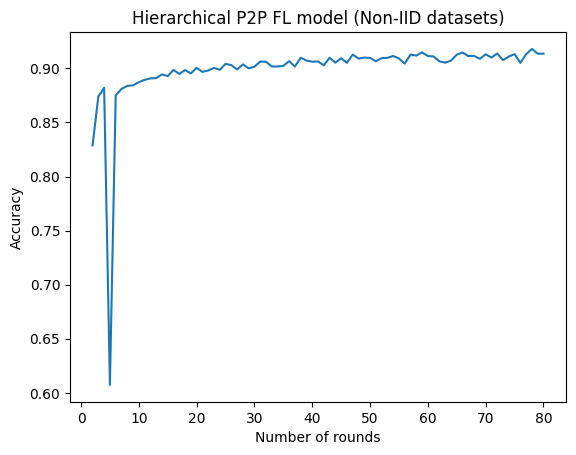

In [710]:
fig = plt.figure()


plt.plot(h_values, non_IID_hierarchical_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

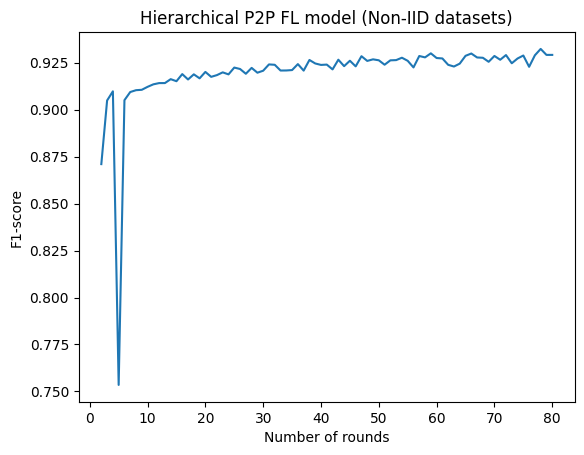

In [711]:
fig = plt.figure()


plt.plot(h_values, non_IID_hierarchical_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

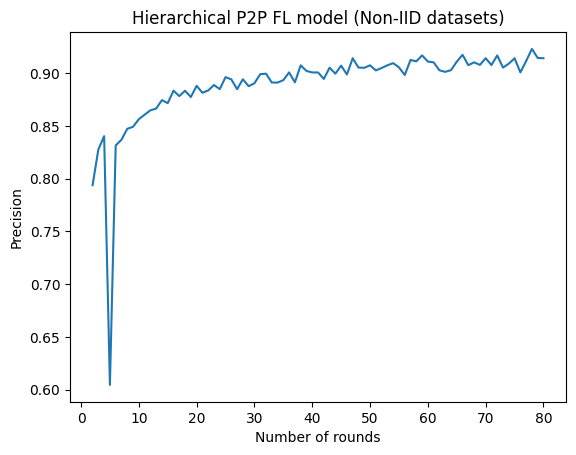

In [712]:
fig = plt.figure()


plt.plot(h_values, non_IID_hierarchical_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

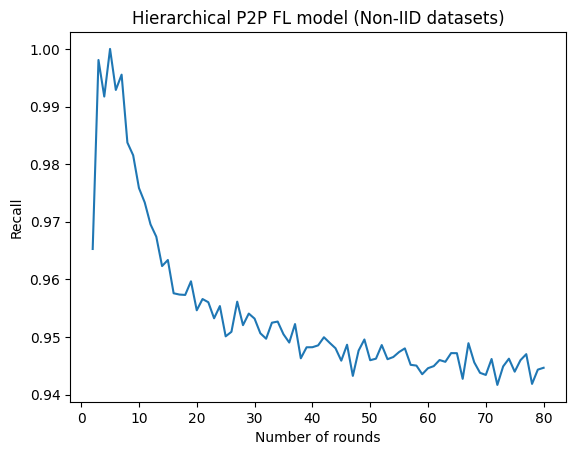

In [713]:
fig = plt.figure()


plt.plot(h_values, non_IID_hierarchical_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

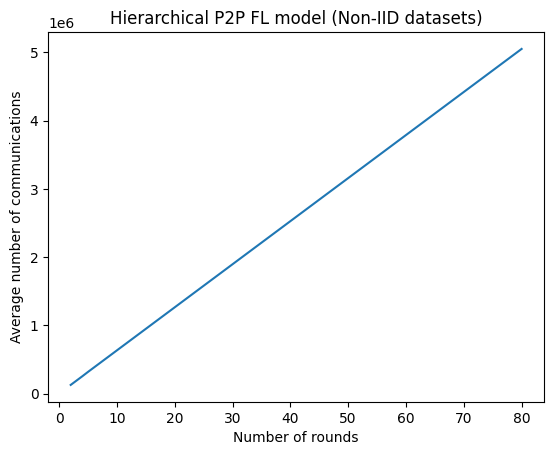

In [714]:
fig = plt.figure()

plt.plot(h_values, non_IID_hierarchical_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

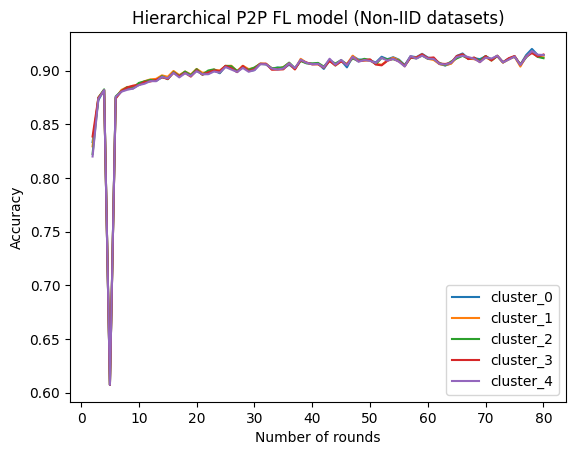

In [715]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, non_IID_hierarchical_separate_accuracy[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

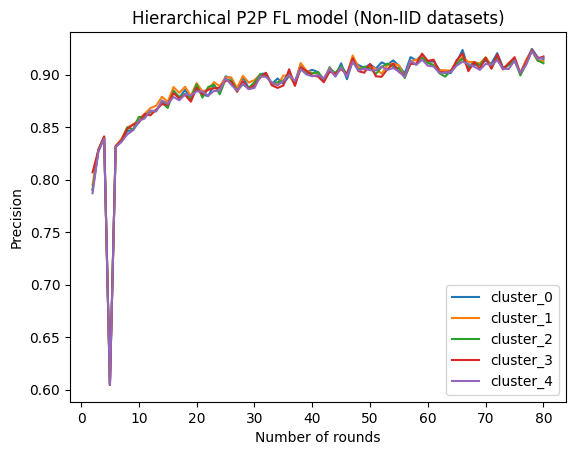

In [716]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, non_IID_hierarchical_separate_precision[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

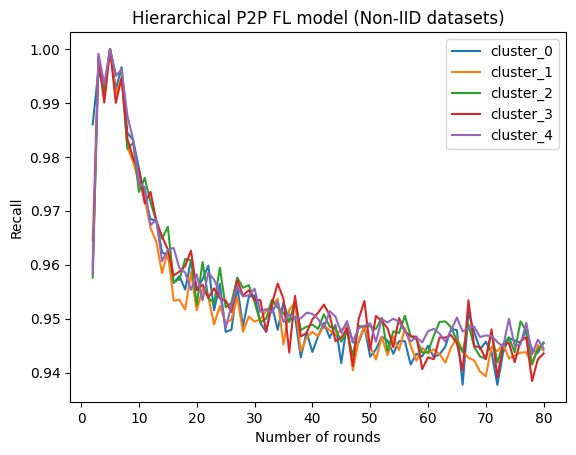

In [717]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, non_IID_hierarchical_separate_recall[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

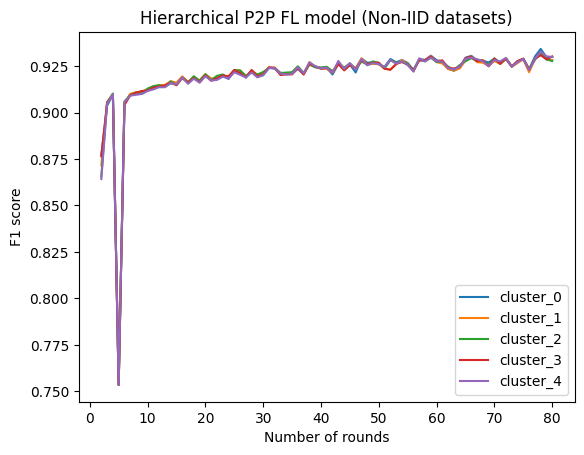

In [718]:
fig = plt.figure()

for index in range(NUM_CLUSTERS):
    cluster_name = cluster_list[index]
    plt.plot(h_values, non_IID_hierarchical_separate_f1_score[cluster_name], label=cluster_name)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
plt.title("Hierarchical P2P FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_hierarchical_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# General

In [841]:
acc_file = open("non_IID/non_IID_General_14102022_rounds.pkl", "rb")
non_IID_general_result1 = pickle.load(acc_file)
acc_file.close()

In [842]:
bcc_file = open("non_IID/non_IID_General_01112022_rounds.pkl", "rb")
non_IID_general_result2 = pickle.load(bcc_file)
bcc_file.close()

In [843]:
ccc_file = open("non_IID/non_IID_General_01112022_rounds.pkl", "rb")
non_IID_general_result3 = pickle.load(ccc_file)
ccc_file.close()

In [844]:
g_values = np.array(non_IID_general_result1['Number of rounds']).tolist()

In [845]:
############################### Accuracy #################################

In [846]:
# non_IID_general_result1_accuracy = non_IID_general_result1['Accuracy'].to_numpy()
# non_IID_general_result2_accuracy = non_IID_general_result2['Accuracy'].to_numpy()
# non_IID_general_result3_accuracy = non_IID_general_result3['Accuracy'].to_numpy()

In [847]:
non_IID_general_result1_accuracy = {}
non_IID_general_result1_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result1_accuracy[model_name] = list()
    for index in range(len(non_IID_general_result1)):
        non_IID_general_result1_accuracy[model_name].append(non_IID_general_result1['Accuracy'][index][model_name])        

        
for row in range(len(c_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += non_IID_general_result1_accuracy[model_name][row]
    non_IID_general_result1_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [848]:
non_IID_general_result2_accuracy = {}
non_IID_general_result2_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result2_accuracy[model_name] = list()
    for index in range(len(non_IID_general_result2)):
        non_IID_general_result2_accuracy[model_name].append(non_IID_general_result2['Accuracy'][index][model_name])        

        
for row in range(len(g_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += non_IID_general_result2_accuracy[model_name][row]
    non_IID_general_result2_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [849]:
non_IID_general_result3_accuracy = {}
non_IID_general_result3_AVG_accuracy = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result3_accuracy[model_name] = list()
    for index in range(len(non_IID_general_result3)):
        non_IID_general_result3_accuracy[model_name].append(non_IID_general_result3['Accuracy'][index][model_name])        

        
for row in range(len(g_values)):
    sum_accuracy = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_accuracy += non_IID_general_result3_accuracy[model_name][row]
    non_IID_general_result3_AVG_accuracy.append(sum_accuracy/NUM_CLIENTS)   


In [850]:
non_IID_general_result1_AVG_accuracy = np.asarray(non_IID_general_result1_AVG_accuracy)
non_IID_general_result2_AVG_accuracy = np.asarray(non_IID_general_result2_AVG_accuracy)
non_IID_general_result3_AVG_accuracy = np.asarray(non_IID_general_result3_AVG_accuracy)


non_IID_general_accuracy = non_IID_general_result1_AVG_accuracy + non_IID_general_result2_AVG_accuracy + non_IID_general_result3_AVG_accuracy
non_IID_general_accuracy = non_IID_general_accuracy/NUM_FILES

In [851]:
############################### F1-score #################################

In [852]:
# non_IID_general_result1_f1_score = non_IID_general_result1['F1_score'].to_numpy()
# non_IID_general_result2_f1_score = non_IID_general_result2['F1_score'].to_numpy()
# non_IID_general_result3_f1_score = non_IID_general_result3['F1_score'].to_numpy()

In [853]:
non_IID_general_result1_f1_score = {}
non_IID_general_result1_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result1_f1_score[model_name] = list()
    for index in range(len(non_IID_general_result1)):
        non_IID_general_result1_f1_score[model_name].append(non_IID_general_result1['F1_score'][index][model_name])        

        
for row in range(len(c_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += non_IID_general_result1_f1_score[model_name][row]
    non_IID_general_result1_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [854]:
non_IID_general_result2_f1_score = {}
non_IID_general_result2_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result2_f1_score[model_name] = list()
    for index in range(len(non_IID_general_result2)):
        non_IID_general_result2_f1_score[model_name].append(non_IID_general_result2['F1_score'][index][model_name])        

        
for row in range(len(g_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += non_IID_general_result2_f1_score[model_name][row]
    non_IID_general_result2_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [855]:
non_IID_general_result3_f1_score = {}
non_IID_general_result3_AVG_f1_score = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result3_f1_score[model_name] = list()
    for index in range(len(non_IID_general_result3)):
        non_IID_general_result3_f1_score[model_name].append(non_IID_general_result3['F1_score'][index][model_name])        

        
for row in range(len(g_values)):
    sum_f1_score = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_f1_score += non_IID_general_result3_f1_score[model_name][row]
    non_IID_general_result3_AVG_f1_score.append(sum_f1_score/NUM_CLIENTS)   


In [856]:
non_IID_general_result1_AVG_f1_score = np.asarray(non_IID_general_result1_AVG_f1_score)
non_IID_general_result2_AVG_f1_score = np.asarray(non_IID_general_result2_AVG_f1_score)
non_IID_general_result3_AVG_f1_score = np.asarray(non_IID_general_result3_AVG_f1_score)


non_IID_general_f1_score = non_IID_general_result1_AVG_f1_score + non_IID_general_result2_AVG_f1_score + non_IID_general_result3_AVG_f1_score
non_IID_general_f1_score = non_IID_general_f1_score/NUM_FILES

In [857]:
############################### Precision #################################

In [858]:
# non_IID_general_result1_precision = non_IID_general_result1['Precision'].to_numpy()
# non_IID_general_result2_precision = non_IID_general_result2['Precision'].to_numpy()
# non_IID_general_result3_precision = non_IID_general_result3['Precision'].to_numpy()

In [859]:
non_IID_general_result1_precision = {}
non_IID_general_result1_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result1_precision[model_name] = list()
    for index in range(len(non_IID_general_result1)):
        non_IID_general_result1_precision[model_name].append(non_IID_general_result1['Precision'][index][model_name])        

        
for row in range(len(c_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += non_IID_general_result1_precision[model_name][row]
    non_IID_general_result1_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [860]:
non_IID_general_result2_precision = {}
non_IID_general_result2_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result2_precision[model_name] = list()
    for index in range(len(non_IID_general_result2)):
        non_IID_general_result2_precision[model_name].append(non_IID_general_result2['Precision'][index][model_name])        

        
for row in range(len(g_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += non_IID_general_result2_precision[model_name][row]
    non_IID_general_result2_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [861]:
non_IID_general_result3_precision = {}
non_IID_general_result3_AVG_precision = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result3_precision[model_name] = list()
    for index in range(len(non_IID_general_result3)):
        non_IID_general_result3_precision[model_name].append(non_IID_general_result3['Precision'][index][model_name])        

        
for row in range(len(g_values)):
    sum_precision = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_precision += non_IID_general_result3_precision[model_name][row]
    non_IID_general_result3_AVG_precision.append(sum_precision/NUM_CLIENTS)   


In [862]:
non_IID_general_result1_AVG_precision = np.asarray(non_IID_general_result1_AVG_precision)
non_IID_general_result2_AVG_precision = np.asarray(non_IID_general_result2_AVG_precision)
non_IID_general_result3_AVG_precision = np.asarray(non_IID_general_result3_AVG_precision)


non_IID_general_precision = non_IID_general_result1_AVG_precision + non_IID_general_result2_AVG_precision + non_IID_general_result3_AVG_precision
non_IID_general_precision = non_IID_general_precision/NUM_FILES

In [863]:
############################### Recall #################################

In [864]:
# non_IID_general_result1_recall = non_IID_general_result1['Recall'].to_numpy()
# non_IID_general_result2_recall = non_IID_general_result2['Recall'].to_numpy()
# non_IID_general_result3_recall = non_IID_general_result3['Recall'].to_numpy()

In [865]:
non_IID_general_result1_recall = {}
non_IID_general_result1_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result1_recall[model_name] = list()
    for index in range(len(non_IID_general_result1)):
        non_IID_general_result1_recall[model_name].append(non_IID_general_result1['Recall'][index][model_name])        

        
for row in range(len(c_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += non_IID_general_result1_recall[model_name][row]
    non_IID_general_result1_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [866]:
non_IID_general_result2_recall = {}
non_IID_general_result2_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result2_recall[model_name] = list()
    for index in range(len(non_IID_general_result2)):
        non_IID_general_result2_recall[model_name].append(non_IID_general_result2['Recall'][index][model_name])        

        
for row in range(len(g_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += non_IID_general_result2_recall[model_name][row]
    non_IID_general_result2_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [867]:
non_IID_general_result3_recall = {}
non_IID_general_result3_AVG_recall = []

for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_result3_recall[model_name] = list()
    for index in range(len(non_IID_general_result3)):
        non_IID_general_result3_recall[model_name].append(non_IID_general_result3['Recall'][index][model_name])        

        
for row in range(len(g_values)):
    sum_recall = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_recall += non_IID_general_result3_recall[model_name][row]
    non_IID_general_result3_AVG_recall.append(sum_recall/NUM_CLIENTS)   


In [868]:
non_IID_general_result1_AVG_recall = np.asarray(non_IID_general_result1_AVG_recall)
non_IID_general_result2_AVG_recall = np.asarray(non_IID_general_result2_AVG_recall)
non_IID_general_result3_AVG_recall = np.asarray(non_IID_general_result3_AVG_recall)


non_IID_general_recall = non_IID_general_result1_AVG_recall + non_IID_general_result2_AVG_recall + non_IID_general_result3_AVG_recall
non_IID_general_recall = non_IID_general_recall/NUM_FILES

In [869]:
############################### Communication #################################

In [870]:
non_IID_general_comm = {}

non_IID_general_avg_communications = []


for index in range(len(model_list)):
    model_name = "model_" + str(index)
    non_IID_general_comm[model_name] = list()
    for row in range(len(non_IID_general_result1)):
        non_IID_general_comm[model_name].append(non_IID_general_result1['Number of communications'][row][model_name])

        
for row in range(len(g_values)):
    sum_communications = 0
    for index in range(len(model_list)):
        model_name = "model_" + str(index)
        sum_communications += non_IID_general_comm[model_name][row]
    non_IID_general_avg_communications.append(sum_communications/NUM_CLIENTS)  

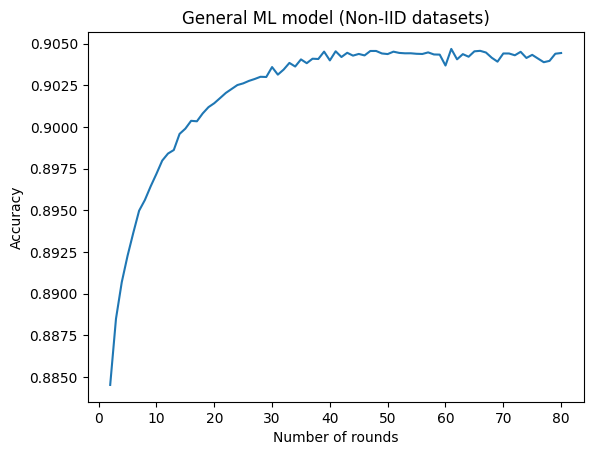

In [871]:
fig = plt.figure()


plt.plot(g_values, non_IID_general_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("General ML model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

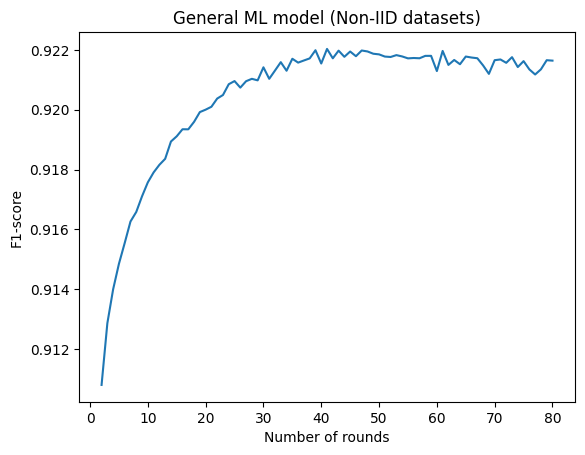

In [872]:
fig = plt.figure()


plt.plot(g_values, non_IID_general_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("General ML model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

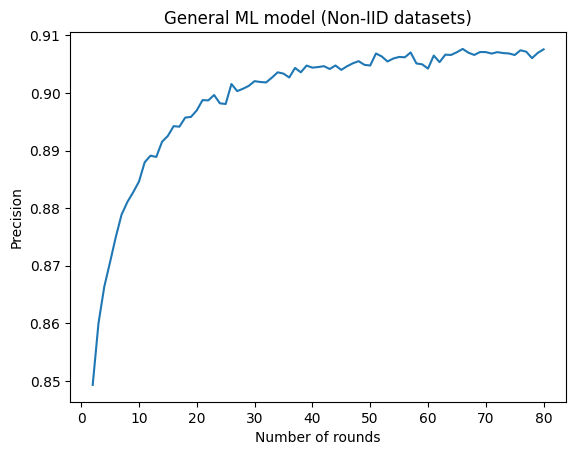

In [873]:
fig = plt.figure()


plt.plot(g_values, non_IID_general_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("General ML model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

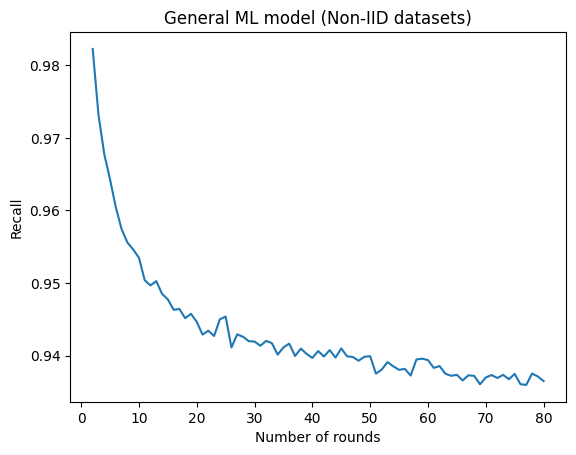

In [874]:
fig = plt.figure()


plt.plot(g_values, non_IID_general_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("General ML model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

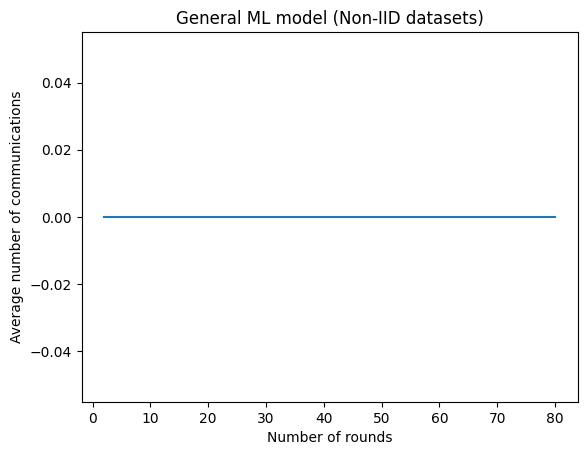

In [875]:
fig = plt.figure()

plt.plot(g_values, non_IID_general_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("General ML model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_general_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Centralized

In [754]:
acc_file = open("non_IID/non_IID_Centralized_14102022_rounds.pkl", "rb")
non_IID_centralized_result1 = pickle.load(acc_file)
acc_file.close()

In [755]:
bcc_file = open("non_IID/non_IID_Centralized_01112022_rounds.pkl", "rb")
non_IID_centralized_result2 = pickle.load(bcc_file)
bcc_file.close()

In [756]:
ccc_file = open("non_IID/non_IID_Centralized_01112022_rounds.pkl", "rb")
non_IID_centralized_result3 = pickle.load(ccc_file)
ccc_file.close()

In [757]:
m_values = np.array(non_IID_centralized_result1['Number of rounds']).tolist()

In [758]:
non_IID_centralized_result1_accuracy = non_IID_centralized_result1['Accuracy'].to_numpy()
non_IID_centralized_result2_accuracy = non_IID_centralized_result2['Accuracy'].to_numpy()
non_IID_centralized_result3_accuracy = non_IID_centralized_result3['Accuracy'].to_numpy()

In [759]:
non_IID_centralized_result1_f1_score = non_IID_centralized_result1['F1_score'].to_numpy()
non_IID_centralized_result2_f1_score = non_IID_centralized_result2['F1_score'].to_numpy()
non_IID_centralized_result3_f1_score = non_IID_centralized_result3['F1_score'].to_numpy()

In [760]:
non_IID_centralized_result1_precision = non_IID_centralized_result1['Precision'].to_numpy()
non_IID_centralized_result2_precision = non_IID_centralized_result2['Precision'].to_numpy()
non_IID_centralized_result3_precision = non_IID_centralized_result3['Precision'].to_numpy()

In [761]:
non_IID_centralized_result1_recall = non_IID_centralized_result1['Recall'].to_numpy()
non_IID_centralized_result2_recall = non_IID_centralized_result2['Recall'].to_numpy()
non_IID_centralized_result3_recall = non_IID_centralized_result3['Recall'].to_numpy()

In [762]:
non_IID_centralized_accuracy = non_IID_centralized_result1_accuracy + non_IID_centralized_result2_accuracy + non_IID_centralized_result3_accuracy
non_IID_centralized_accuracy = non_IID_centralized_accuracy/NUM_FILES

In [763]:
non_IID_centralized_f1_score = non_IID_centralized_result1_f1_score + non_IID_centralized_result2_f1_score + non_IID_centralized_result3_f1_score
non_IID_centralized_f1_score = non_IID_centralized_f1_score/NUM_FILES

In [764]:
non_IID_centralized_precision = non_IID_centralized_result1_precision + non_IID_centralized_result2_precision + non_IID_centralized_result3_precision
non_IID_centralized_precision = non_IID_centralized_precision/NUM_FILES

In [765]:
non_IID_centralized_recall = non_IID_centralized_result1_recall + non_IID_centralized_result2_recall + non_IID_centralized_result3_recall
non_IID_centralized_recall = non_IID_centralized_recall/NUM_FILES

In [766]:
non_IID_centralized_comm = {}

non_IID_centralized_avg_communications = []


for index in range(len(centralized_model_list)):
    model_name = centralized_model_list[index]
    non_IID_centralized_comm[model_name] = list()
    for row in range(len(non_IID_centralized_result1)):
        non_IID_centralized_comm[model_name].append(non_IID_centralized_result1['Number of communications'][row][model_name])

        
for row in range(len(m_values)):
    sum_communications = 0
    for index in range(len(centralized_model_list)):
        model_name = centralized_model_list[index]
        sum_communications += non_IID_centralized_comm[model_name][row]
    non_IID_centralized_avg_communications.append(sum_communications/NUM_CLIENTS)  

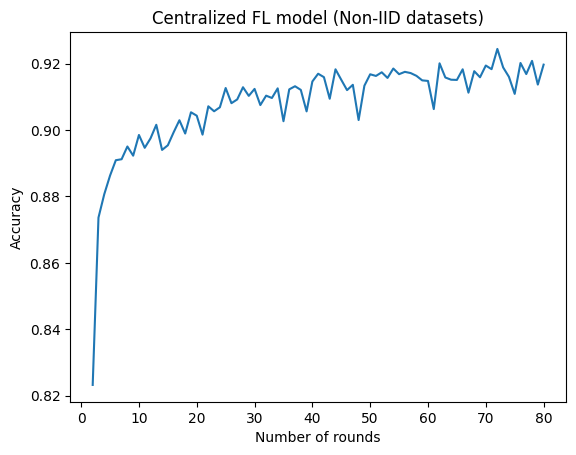

In [767]:
fig = plt.figure()


plt.plot(m_values, non_IID_centralized_accuracy)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_centralized_accuracy_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

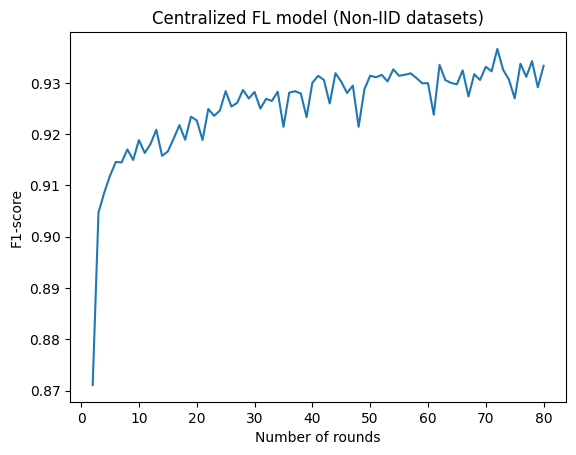

In [768]:
fig = plt.figure()


plt.plot(m_values, non_IID_centralized_f1_score)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1-score")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_centralized_f1_score_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

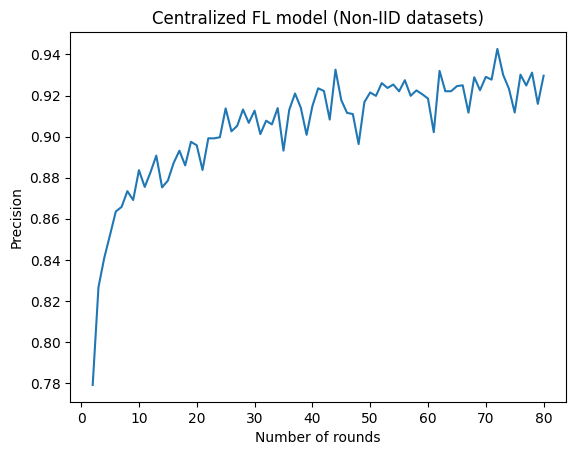

In [769]:
fig = plt.figure()


plt.plot(m_values, non_IID_centralized_precision)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Precision")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_centralized_precision_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

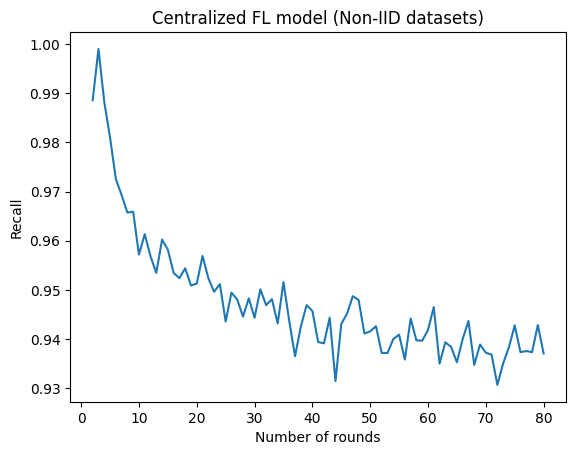

In [770]:
fig = plt.figure()


plt.plot(m_values, non_IID_centralized_recall)


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Recall")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='best')
  
# To load the display window
plt.show()

# # saving the figure
# fig_name = "non_IID/plots/non_IID_centralized_recall_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

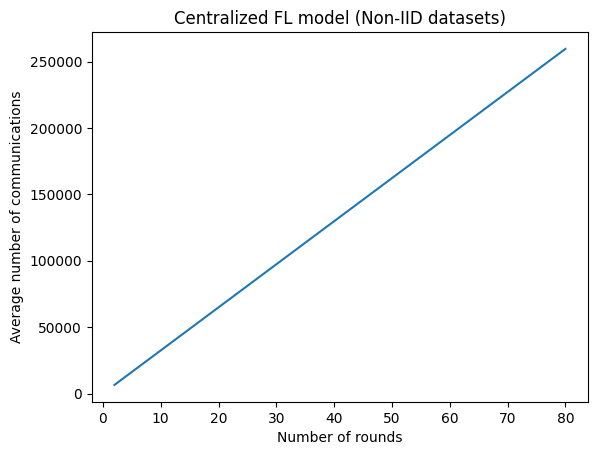

In [771]:
fig = plt.figure()

plt.plot(m_values, non_IID_centralized_avg_communications)



# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Average number of communications")
plt.title("Centralized FL model (Non-IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=10)

  
# To load the display window
plt.show()


# # saving the figure
# fig_name = "non_IID/plots/non_IID_centralized_avg_communication_cost_vs_total_rounds_" + str(current_date) + ".png"

# fig.patch.set_facecolor('xkcd:white')
# fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Combine plots

# Random

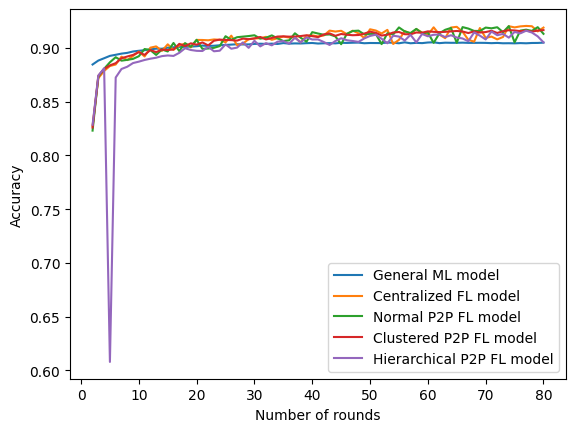

In [878]:
fig = plt.figure()



plt.plot(t_values, random_general_accuracy, label="General ML model")
plt.plot(t_values, random_centralized_accuracy, label="Centralized FL model")
plt.plot(t_values, random_target_accuracy, label="Normal P2P FL model")
plt.plot(t_values, random_clustered_accuracy, label="Clustered P2P FL model")
plt.plot(t_values, random_hierarchical_accuracy, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_all_accuracy_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

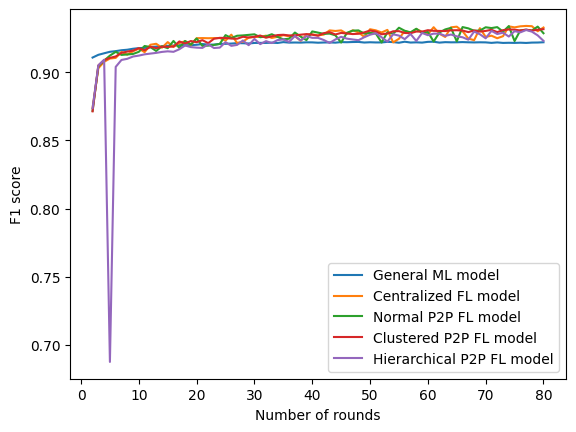

In [879]:
fig = plt.figure()



plt.plot(t_values, random_general_f1_score, label="General ML model")
plt.plot(t_values, random_centralized_f1_score, label="Centralized FL model")
plt.plot(t_values, random_target_f1_score, label="Normal P2P FL model")
plt.plot(t_values, random_clustered_f1_score, label="Clustered P2P FL model")
plt.plot(t_values, random_hierarchical_f1_score, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
# plt.title("F1 score of different models (random datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "random/plots/random_all_f1_score_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# IID

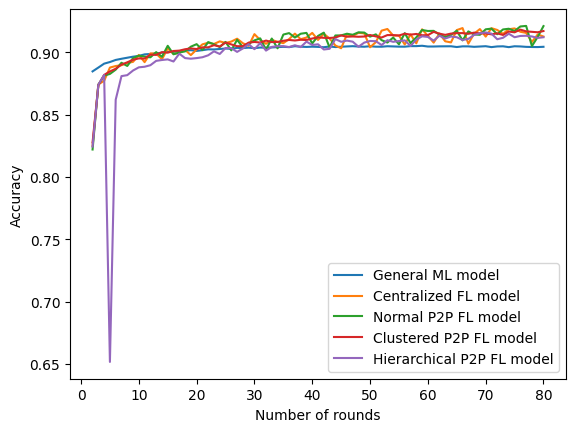

In [881]:
fig = plt.figure()



plt.plot(t_values, IID_general_accuracy, label="General ML model")
plt.plot(t_values, IID_centralized_accuracy, label="Centralized FL model")
plt.plot(t_values, IID_target_accuracy, label="Normal P2P FL model")
plt.plot(t_values, IID_clustered_accuracy, label="Clustered P2P FL model")
plt.plot(t_values, IID_hierarchical_accuracy, label="Hierarchical P2P FL model")
# plt.plot(t_values, IID_homomorphic_accuracy, label="Homomorphic P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_all_accuracy_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

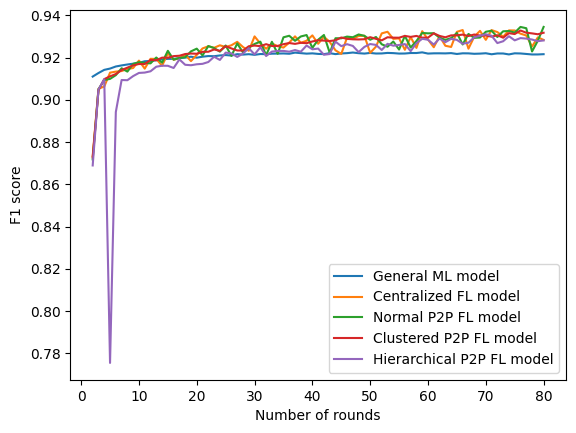

In [882]:
fig = plt.figure()



plt.plot(t_values, IID_general_f1_score, label="General ML model")
plt.plot(t_values, IID_centralized_f1_score, label="Centralized FL model")
plt.plot(t_values, IID_target_f1_score, label="Normal P2P FL model")
plt.plot(t_values, IID_clustered_f1_score, label="Clustered P2P FL model")
plt.plot(t_values, IID_hierarchical_f1_score, label="Hierarchical P2P FL model")
# plt.plot(t_values, IID_homomorphic_f1_score, label="Homomorphic P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
# plt.title("F1 score of different models (IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "IID/plots/IID_all_f1_score_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

# Non-IID

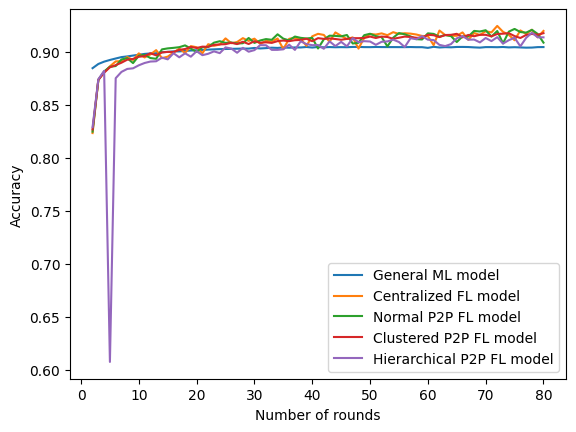

In [883]:
fig = plt.figure()



plt.plot(t_values, non_IID_general_accuracy, label="General ML model")
plt.plot(t_values, non_IID_centralized_accuracy, label="Centralized FL model")
plt.plot(t_values, non_IID_target_accuracy, label="Normal P2P FL model")
plt.plot(t_values, non_IID_clustered_accuracy, label="Clustered P2P FL model")
plt.plot(t_values, non_IID_hierarchical_accuracy, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (non_IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_all_accuracy_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

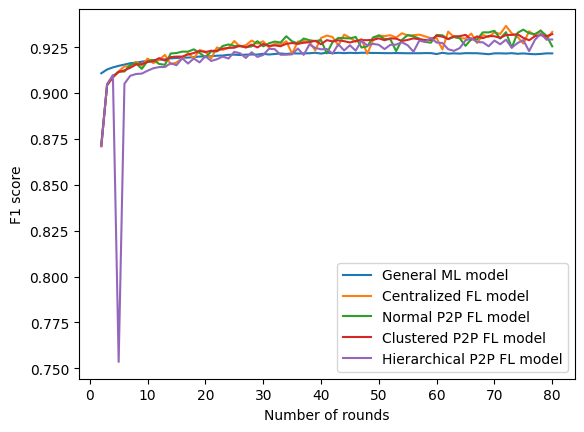

In [884]:
fig = plt.figure()



plt.plot(t_values, non_IID_general_f1_score, label="General ML model")
plt.plot(t_values, non_IID_centralized_f1_score, label="Centralized FL model")
plt.plot(t_values, non_IID_target_f1_score, label="Normal P2P FL model")
plt.plot(t_values, non_IID_clustered_f1_score, label="Clustered P2P FL model")
plt.plot(t_values, non_IID_hierarchical_f1_score, label="Hierarchical P2P FL model")


# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("F1 score")
# plt.title("F1 score of different models (non_IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')
  
# To load the display window
plt.show()


# saving the figure
fig_name = "non_IID/plots/non_IID_all_f1_score_vs_total_rounds_" + str(current_date) + ".png"

fig.patch.set_facecolor('xkcd:white')
fig.savefig(fig_name,dpi = 200, bbox_inches="tight")

In [ ]:
fig = plt.figure()


plt.plot(t_values, random_target_accuracy, label="Normal P2P FL model (Random dataset)")
plt.plot(t_values, IID_target_accuracy, label="Normal P2P FL model (IID dataset)")
plt.plot(t_values, non_IID_target_accuracy, label="Normal P2P FL model (Non-IID dataset)")

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Number of rounds")
plt.ylabel("Accuracy")
# plt.title("Accuracy of different models (non_IID datasets)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend(loc='best')


# To load the display window
plt.show()
